In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
 # Re-import necessary modules after code execution state reset
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [4]:
# Load the Excel file again after reset
file_path = r"d:\Batra\Nov25\sales\inbound_data_sales.xlsx"
df = pd.read_excel(file_path)# Load the Excel file again after reset


In [3]:
excel_file_path = r"D:\Batra\june 2025\sales\inbound_data_result.xlsx"
sheet_name = "Inbound_data"  # Replace with the actual sheet name

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

In [5]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Row Labels,Sum of Did the agent greet the customer in a f...,Sum of Was the customer's appointment schedule...,"Sum of Did the agent confirm the date, time, a...",Sum of Did the agent accurately explain pre pa...,Sum of Did the agent asked to carry your prev...,Sum of Did the agent explained the consultatio...,Sum of Did the agent asked for whatsapp number...,Sum of Was Call Summarization done with proper...,Count of Agent Name,Count of Agent Name,NaN,NaN
2,AARTIKA,3380,7000,5355,1560,180,30,40,2180,414,414,41400.0,19725.0
3,ABDULSAL,2280,3660,3030,950,225,230,20,1370,235,235,23500.0,11765.0
4,ADILA,10780,16720,14220,4640,6165,390,1210,8340,1138,1138,113800.0,62465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,ASHWINIGA,113,11300,7198,0.636991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,JACOBA,372,37200,23585,0.634005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,KESARS,1,100,60,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import re

import matplotlib.pyplot as plt

# Load the Excel file
excel_file_path = r"d:\Batra\Nov25\sales\inbound_data_sales.xlsx"
sheet_name = "inbound"  # Replace with the actual sheet name

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

In [7]:
df

,File name,Call type,Agent Name,TL,Recording date,recording length,Issue,Combined Comment,Combined Comment hindi,Did the agent greet the customer in a friendly and professional manner?,Was the customer's appointment scheduled accurately and promptly ?,"Did the agent confirm the date, time, and location of the appointment?",Did the agent accurately explain pre payment benefits over the call?(Link will expire in 2 hours),Did the agent asked to carry your previous medical records and reports?,Did the agent explained the consultation charges are separate from treatment cost?,Did the agent asked for whatsapp number on the call?,Was Call Summarization done with proper closing?
0,251125102700I03122,Inbound,ADILA,AZHAR,25-Nov-2025,00:00:46,NaN,good morning thank you for calling doctor batr...,गुड मॉर्निंग थैंक यू फॉर कॉलिंग डॉक्टर बत्रह स...,10,0,0,0,0,0,0,10
1,251111180729I03125,Inbound,Naif,ADNAN,11-Nov-2025,00:00:46,NaN,jahI hello thank you for calling nEkEliE phAra...,जही हलो थैंक्यू फॉर कॉलिंग नेकेलिए फॉरम टो आ म...,10,20,15,0,0,0,0,0
2,251130111854I0327,Inbound,SushmaC,AAMIR,30-Nov-2025,00:00:46,Appointment,hI thank you for calling doctor bEhatrAl sumE ...,ही थैंक्यू फॉर कॉलिंग डॉक्टर बेहतराल सुमे बदी ...,10,0,0,0,0,0,0,0
3,251125181856I03103,Inbound,jeetandra,SAIRA,25-Nov-2025,00:00:46,Others,briniMg jIsI jItEMdr thank you for calling doc...,ब्रिनिंग जीसी जीतेंद्र थैंक्यू फॉर कॉलिंग डॉक्...,10,0,0,0,0,0,0,0
4,251121175733I03112,Inbound,Shekar,AZHAR,21-Nov-2025,00:00:46,New Patient,thank you for calling doctor basrA samay pasE ...,थैंक्यू फॉर कॉलिंग डॉक्टर बसरा समय पसे ी कोशिश...,10,0,15,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20768,251130192304I03115,Inbound,BHAVYAA,AZHAR,30-Nov-2025,00:13:31,New Patient,thank you for calling dr. batra's humyA pati k...,थैंक यू फॉर कॉलिंग डॉक्टर बत्रास हुमया पति के ...,0,20,15,0,15,10,0,10
20769,251125115243I03110,Inbound,DEEPAKGU,ADNAN,25-Nov-2025,00:13:54,Others,NaN,थैंक्यू फॉर कॉलिंग डॉक्टर बतराज हूंग पर देख ले...,10,20,15,10,0,10,0,10
20770,251122095317I0363,Inbound,ANISHPR,AAMIR,22-Nov-2025,00:14:24,Appointment,good morning maiMnE is bAt kar Ta ApkO batA rA...,गुड मॉर्निंग मैंने इस बात कर ट आपको बता रा था ...,10,20,15,0,0,0,0,10
20771,251112162414I03116,Inbound,BHAVESHK,AAMIR,12-Nov-2025,00:14:55,Hair,yas sar very good afternoon may nEm is phAvIsh...,यस सर वेरी गुड आफ्टरनून मय नेम इज फावीश फ्रॉम ...,10,20,15,10,0,0,0,0


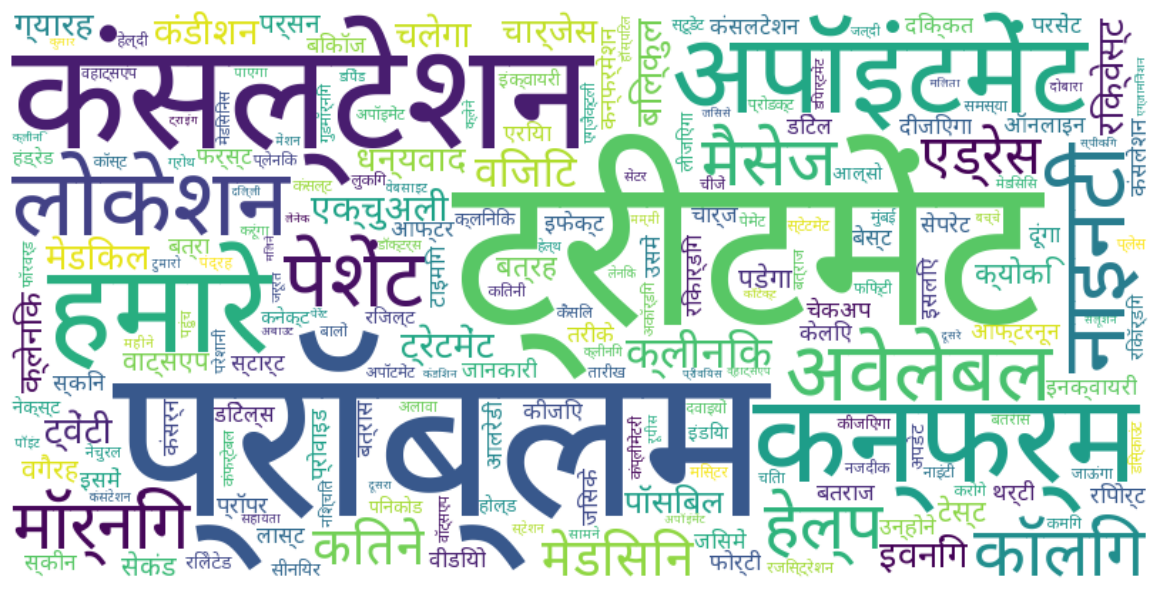

In [10]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import re

import matplotlib.pyplot as plt

# Load the Excel file
excel_file_path = r"d:\Batra\Nov25\sales\outbound calls.xlsx"
sheet_name = "data"  # Replace with the actual sheet name

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
# Combine all text in the 'Combined Comment hindi' column
text_data = df['Combined Comment hindi'].dropna().astype(str).str.cat(sep=' ')

# Keep only Devanagari characters and spaces
text_data = re.sub(r'[^\u0900-\u097F\s]', '', text_data)

# Tokenize the text
words = text_data.split()

# Define custom Hindi stopwords
custom_stopwords = set([
   'है', 'तो', 'सर', 'आ', 'में', 'से', 'के', 'कर', 'जी', 'हा', 'ओके', 'आप', 'मैं', 'ना', 'मेम', 'का', 'वो', 'बात', 'हो', 'ठीक', 'था', 'कॉल', 'टू', 'एक', 'ये', 'जो', 'को', 'भी', 'पे', 'यू', 'की', 'लिए', 'द', 'रहा', 'वन', 'और', 'हैं', 'अभी', 'या', 'स', 'मे', 'कि', 'रहे', 'म', 'सो', 'कोई', 'आई', 'ह', 'हाँ', 'हूं', 'हू', 'क', 'कुछ', 'हम', 'अगर', 'नो', 'बता', 'पर', 'फोर', 'रही', 'ही', 'दो', 'एट', 'इज', 'इस', 'यस', 'बट', 'फॉर', 'ा', 'एंड', 'गुड', 'ी', 'सा', 'दे', 'े', 'बार', 'डबल', 'आज', 'गया', 'कल', 'थे', 'फिर', 'ो', 'नाम', 'ने', 'न', 'कैन', 'बाद', 'योर', 'थी', 'हुआ', 'नी', 'तक', 'समय', 'बोल', 'इन', 'चेक', 'आर', 'मी', 'र', 'विथ', 'दी', 'ले', 'विल', 'ज', 'सी', 'बजे', 'दिन', 'मच', 'हूँ', 'करा', 'पास', 'ए', 'मा', 'य', 'जा', 'रा', 'नेम', 'नॉट', 'प', 'माम', 'ऐसा', 'बैक', 'एम', 'फोन', 'पा', 'बी', 'दिस', 'तीन', 'ता', 'आया', 'बुक', 'एस', 'बत', 'हैव', 'देख', 'इट', 'कभी', 'जब', 'कम', 'आन', 'करे', 'चल', 'आफ', 'कौन', 'वही', 'व', 'पी', 'वी', 'हे', 'दैट', 'हआ', 'नही', 'हाउ', 'डे', 'लो', 'ब', 'मिल', 'रे', 'हलो', 'त', 'सेम', 'एनी', 'टु', 'गा', 'पता', 'सही', 'आम', 'दट', 'कब', 'चार', 'सम', 'जे', 'मंथ', 'साथ', 'ट', 'बने', 'आल', 'देर', 'इशू', 'उस', 'साल', 'यो', 'ठी', 'दस', 'यी', 'सब', 'कहा', 'लोग', 'लगा', 'आय', 'कया', 'आना', 'इफ', 'ओपन', 'ऑफ', 'फर', 'हु', 'ते', 'री', 'नीं', 'काम', 'अब', 'समझ', 'लग', 'हर', 'बा', 'टो', 'एन', 'मेल', 'कह', 'यु', 'शो', 'बस', 'टी', 'वे', 'मं', 'किए', 'हाव', 'अप', 'केस', 'मन', 'डेट', 'ली', 'बर', 'सात', 'शुभ', 'हुई', 'मिस', 'पो', 'करो', 'मदद', 'मेर', 'ऐसे', 'नम', 'गई', 'गए', 'तब', 'यर', 'मेन', 'आगे', 'वा', 'ै', 'ओ', 'वर', 'पूछ', 'दर', 'आता', 'शाम', 'ल', 'जान', 'किस', 'जस', 'एं', 'चा', 'ला', 'नोट', 'केन', 'वेन', 'डू', 'नगर', 'जिस', 'चीज', 'यही', 'ड', 'अ', 'बीच', 'माय', 'बो', 'इ', 'टाम', 'रेट', 'आउट', 'आए', 'देट', 'फो', 'लेट', 'गर', 'मम', 'वाट', 'गेट', 'आइ', 'वेट', 'करी', 'यहा', 'सके', 'तरफ', 'टीम', 'टेल', 'वजह', 'सरी', 'इसी', 'चे', 'डी', 'रह', 'मो', 'जाए', 'चाह', 'आने', 'टेक', 'थिस', 'उसी', 'दू', 'हां', 'वहा', 'देन', 'दा', 'दिए', 'औ', 'ऑन', 'तर', 'एज', 'ईयर', 'तुम', 'कन', 'मत', 'फ', 'युर', 'मै', 'मय', 'लि', 'गो', 'मि', 'मर', 'दि', 'आठ', 'लेक', 'आजी', 'भेज', 'अलग', 'यूर', 'बन', 'थ', 'उसे', 'सन', 'पाए', 'ऊपर', 'तभी', 'हैज', 'सौ', 'सक', 'विच', 'हाम', 'बंद', 'ओक', 'नाउ', 'ती', 'दिख', 'मिन', 'कुल', 'टॉक', 'मां', 'मैम', 'अदर', 'रो', 'हुए', 'गे', 'पेस', 'करू', 'बना', 'मीं', 'टेन', 'यूज', 'छे', 'आवर', 'फेस', 'डेज', 'हव', 'ू', 'सेक', 'इसे', 'आपक', 'घर', 'सुन', 'गिव', 'रखा', 'जर', 'ग', 'गी', 'मान', 'ेट', 'ओन', 'नौ', 'सार', 'एड', 'राज', 'हल', 'हेर', 'चले', 'वि', 'आके', 'रोड', 'बाल', 'टे', 'अरे', 'हेड', 'ई', 'हम्', 'मैय', 'सेट', 'डाल', 'दन', 'पन', 'सल', 'ि', 'फॉल', 'चला', 'एइट', 'बे', 'िस', 'तु', 'रख', 'बल', 'छह', 'वास', 'आस', 'कु', 'मेट', 'ेस', 'उधर', 'जू', 'ऑफर', 'हमे', 'मने', 'इवन', 'उन', 'च', 'ं', 'कै', 'काल', 'फाइ', 'होप', 'क्', 'कप', 'कोल', 'सभी', 'वाज', 'नीड', 'एबल', 'एईट', 'पीज', 'दवा', 'थर', 'लिख', 'ेक', 'पू', 'बीन', 'लाक', 'आते', 'वस', 'आा', 'टेम', 'ची', 'रि', 'कार', 'सि', 'डॉक', 'रेज', 'अर', 'वेल', 'पॉल', 'नें', 'इधर', 'पिक', 'टीन', 'जगह', 'मोर', 'एच', 'ाम', 'कही', 'आजा', 'पाच', 'देम', 'लगे', 'कोड', 'टा', 'मनी', 'डिस', 'दबा', 'वाइ', 'परी', 'वल', 'ोर', 'हेल', 'आट', 'कं', 'सेन', 'खुद', 'वरी', 'सु', 'मेक', 'पल', 'वट', 'चलो', 'क्ा', 'पड', 'सरे', 'शेर', 'राम', 'पार', 'मेस', 'पडा', 'टर', 'मार', 'सिर', 'पं', 'दूं', 'मला', 'शी', 'पेट', 'यार', 'आब', 'कई', 'हाई', 'बिन', 'पने', 'वॉट', 'पेन', 'सच', 'जन', 'श', 'बिल', 'जि', 'सिक', 'बाइ', 'मना', 'खा', 'आती', 'समे', 'आरी', 'तरह', 'फी', 'डो', 'दम', 'बाई', 'हं', 'सका', 'बाय', 'फि', 'वेर', 'पुर', 'बज', 'गॉट', 'सें', 'ीक', 'सं', 'वंट', 'पुट', 'छोड', 'आपी', 'ह्', 'कॉ', 'तू', 'आइए', 'आड', 'सेर', 'डा', 'शोर', 'चो', 'बास', 'परे', 'हए', 'हाय', 'कट', 'ेज', 'बीस', 'हज', 'येस', 'हार', 'पेक', 'होम', 'वीक', 'भाई', 'सेल', 'साइ', 'एल', 'कोर', 'ओवर', 'सू', 'हाल', 'कलर', 'नाइ', 'एटी', 'मेड', 'अम', 'मल', 'गलत', 'हाज', 'मजे', 'टेस', 'किन', 'मझे', 'ोके', 'ऐसी', 'जै', 'आइट', 'राइ', 'पती', 'सेस', 'मंत', 'डि', 'हैर', 'पस', 'वुड', 'वजे', 'आपो', 'भे', 'बच', 'बरा', 'शू', 'पीस', 'परा', 'अभ', 'केल', 'माइ', 'देस', 'ार', 'ाइ', 'हीं', 'थैं', 'सीन', 'कोन', 'मस', 'कली', 'टम', 'मई', 'आगा', 'आपे', 'हजी', 'कां', 'दूर', 'मदे', 'वाल', 'बेस', 'डॉट', 'मदर', 'शा', 'कस', 'कोछ', 'याद', 'मु', 'सकी', 'यै', 'जिए', 'मगर', 'अजी', 'साम', 'सरा', 'बजा', 'पको', 'देक', 'पें', 'छा', 'बडा', 'जरा', 'सै', 'एफ', 'जाओ', 'पडे', 'जल', 'नजर', 'िक', 'पूर', 'कने', 'फन', 'ेन', 'जेस', 'डर', 'ोन', 'होल', 'कॉन', 'मिं', 'लान', 'रात', 'पेज', 'लाइ', 'वेस', 'पिन', 'कू', 'वज', 'शुड', 'ेम', 'आधे', 'नेट', 'बद', 'चर', 'मिट', 'ीज', 'शु', 'इं', 'आरा', 'नं', 'आपा', 'पाइ', 'पोर', 'लू', 'जून', 'सिं', 'रेस', 'ें', 'फा', 'मतब', 'आव', 'बचे', 'बै', 'हाइ', 'कला', 'वोट', 'हमम', 'पट', 'फे', 'पली', 'कॉम', 'आपन', 'नोन', 'िन', 'टॉप', 'बेट', 'झे', 'शर', 'ु', 'मट', 'सोच', 'पेश', 'नको', 'नर', 'पका', '्या', 'पले', 'ाज', 'ैसे', 'हन', 'चली', 'जिन', 'डेस', 'दया', 'दोन', 'बजी', 'लगी', 'पीक', 'केम', 'दून', 'फीस', 'पाल', 'आजे', 'बाक', 'दाट', 'आं', 'पि', 'हमी', 'दिल', 'सिन', 'डॉ', 'कय', 'बजट', 'हला', 'पना', 'टें', 'नान', 'पक', 'बढ', 'इक', 'कान', 'एयर', 'अन', 'परस', 'पु', 'सेव', 'िंग', 'रू', 'क्य', 'कना', 'सॉर', 'हता', 'भ', 'मरा', 'थरी', 'हाथ', 'सोर', 'आउ', 'किा', 'नि', 'लोन', 'कले', 'सस', 'वं', 'रखे', 'वेज', 'बि', 'ऐट', 'फम', 'रास', 'वाय', 'रस', 'बं', 'आईम', 'शे', 'आनी', 'साप', 'उठा', 'फंड', 'अपन', 'असर', 'थो', 'तीम', 'फील', 'यम', 'टाइ', 'औो', 'मॉल', 'ाप', 'सको', 'जैस', 'लेन', 'वॉस', 'एसे', 'सेड', 'हले', 'पैक', 'कॉर', 'मलब', 'नेक', 'पाई', 'नया', 'सेज', 'पीन', 'आभी', 'फुल', 'बाज', 'फेज', 'सप', 'पंड', 'लॉट', 'देज', 'बक', 'जार', 'गुर', 'नून', 'पात', 'तम', 'ेड', 'बडे', 'आरे', 'आंड', 'वाई', 'सिस', 'आधा', 'टन', 'पुछ', 'फॉम', 'बले', 'आक', 'फोल', 'बडी', 'नू', 'दास', 'गु', 'आडी', 'एर', 'हगा', 'जया', 'बुत', 'हना', 'डन', 'जस्', 'गीव', 'लाज', 'कंस', 'ाइट', 'आग', 'औल', 'ान', 'सट', 'ीस', 'अच', 'पनी', 'आगी', 'दक', 'हमा', 'होग', 'आसा', 'फॉ', 'ओका', 'पंच', 'शॉप', 'सरच', 'जीस', 'सनी', 'मरे', 'सकत', 'पॉर', 'इश', 'आरड', 'बु', 'हॅव', 'मही', 'इम', 'मड', 'िट', 'कैस', 'विस', 'रहि', 'ओगे', 'बते', 'माल', 'ां', 'विज', 'ओकी', 'हरी', 'पति', 'दीन', 'नंब', 'भर', 'सता', 'नीट', 'जॉब', 'वार', 'टीक', 'दिक', 'कीन', 'सरम', 'वनस', 'साट', 'हैम', 'हाफ', 'एसी', 'कुड', 'सटी', 'चेज', 'लाल', 'लर', 'मनथ', 'कलि', 'सीक', 'हनी', 'बरे', 'नां', 'हेम', 'लास', 'मता', 'बनी', 'होा', 'जम', 'अनी', 'सना', 'गल', 'निक', 'फल', 'ाजी', 'रिस', 'पेड', 'इंग', 'वह', 'नबर', 'करन', 'लिक', 'मुझ', 'लॉक', 'मज', 'रहै', 'विन', 'मरी', 'ंड', 'मतल', 'टोन', 'लॉस', 'सोन', 'पेम', 'कोस', 'हप', 'वोी', 'अल', 'बतर', 'नीम', 'पके', 'बिक', 'साफ', 'कमी', 'ियर', 'बला', 'हुा', 'पॉ', 'मते', 'ेर', 'ीन', 'समा', 'फेर', 'यह', 'केर', 'ओे', 'बचा', 'कनी', 'आदी', 'िं', 'जहा', 'िया', 'जेन', 'सॉल', 'रन', 'विक', 'प्र', 'सने', 'मजी', 'केट', 'नौउ', 'मआई', 'हआँ', 'वोस', 'यास', 'डेढ', 'आसे', 'पत', 'पेर', 'फं', 'चछा', 'हरो', 'हाप', 'फिल', 'अग', 'आपर', 'एंट', 'सरो', 'चाल', 'साब', 'आो', 'मीन', 'मको', 'टेट', 'कीस', 'चेन', 'साड', 'देव', 'पां', 'डल', 'नॉन', 'नाट', 'तना', 'मंट', 'ास', 'बेक', 'फरस', 'आफर', 'लब', 'मीट', 'ोक', 'आै', 'कता', 'आशा', 'आद', 'एकी', 'मैच', 'नका', 'रिए', 'सीज', 'कैश', 'अमी', 'राट', 'सत', 'टुक', 'हहा', 'तरी', 'ससे', 'पून', 'छ', 'आकी', 'मोड', 'अरी', 'कमन', 'एगा', 'बैं', 'आये', 'बॉल', 'मद', 'आदर', 'सां', 'आजो', 'उ', 'कास', 'डम', 'ठेक', 'िए', 'िथ', 'बड', 'मंच', 'ॉल', 'शन', 'राल', 'मंस', 'एप', 'कें', 'वनी', 'जसट', 'सले', 'जए', 'सीम', 'लेस', 'संग', 'आला', 'सली', 'नन', 'पकी', 'सकू', 'चीन', 'जय', 'काय', 'ैसा', 'रेड', 'यए', 'जीक', 'नट', 'पै', 'कीम', 'विट', 'ाना', 'आी', 'फीड', 'आका', 'हने', 'नए', 'कोट', 'ंजी', 'तीस', 'आत', 'गरा', 'पोन', 'लां', 'एका', 'हया', 'हब', 'हरा', 'ानी', 'बाग', 'ाल', 'मले', 'अगे', 'पाप', 'फरम', 'जोर', 'हली', 'किय', 'ेगा', 'मेच', 'चें', 'जोन', 'कोी', 'माई', 'चेर', 'सान', 'नॉ', 'समी', 'नेस', 'वोई', 'जीन', 'फिक', 'आपस', 'मोल', 'वआ', 'कलो', 'टरन', 'टून', 'डिड', 'डेर', 'सह', 'स्ट', 'परो', 'हई', 'पसे', 'लॉ', 'इटस', 'मडम', 'भि', 'वु', 'केक', 'रीच', 'हैड', 'होत', 'ोगा', 'लक', 'मास', 'थां', 'केा', 'होन', 'वने', 'दीए', 'नै', 'अने', 'पैर', 'कंड', 'ेशन', 'आको', 'पडी', 'रूट', 'मात', 'ाके', 'गड', 'हाड', 'पते', 'अपी', 'करि', 'मेज', 'असा', 'रीज', 'रम', 'सजस', 'कुद', 'तरा', 'रोल', 'दोस', 'पिं', 'गोड', 'दल', 'तलब', 'वेथ', 'रता', 'फार', 'बती', 'इसर', 'एवर', 'सरन', 'वोर', 'सला', 'आच', 'वम', 'पेल', 'तन', 'फरक', 'एडी', 'हरे', 'कक', 'बैट', 'टल', 'रखी', 'सॉ', 'पाट', 'आयु', 'डान', 'याम', 'दिा', 'वॉ', 'िज', 'काइ', 'बां', 'ुछ', 'वान', 'ाने', 'वरड', 'पैन', 'पम', 'ोगे', 'लस', 'डाम', 'बॉस', 'हस', 'लें', 'दरा', 'काट', 'रहो', 'ेल', 'वॉल', 'खुश', 'हजा', 'जभी', 'रोज', 'दही', 'जेट', 'प्ी', 'पोस', 'हही', 'अज', 'दार', 'तल', 'ढाई', 'फून', 'वाच', 'सउथ', 'पोल', 'कीज', 'बाट', 'वॉच', 'खार', 'डब', 'नाल', 'बली', 'हास', 'तार', 'नीन', 'एनड', 'अट', 'शीज', 'उने', 'वां', 'साय', 'आइस', 'ंदर', 'चौ', 'नव', 'हेव', 'लंच', 'बाप', 'एके', 'आटो', 'आवज', 'सिफ', 'दब', 'चीक', 'सज', 'नइन', 'ओर', 'मतर', 'माफ', 'हवा', 'अभे', 'दीस', 'समर', 'एकस', 'रके', 'दें', 'िसी', 'रुक', 'कयो', 'टक', 'बटा', 'नस', 'नेन', 'एजी', 'मैन', 'सते', 'दीक', 'मोन', 'कसे', 'रिज', 'टोल', 'ोड', 'कमा', 'बोत', 'बरी', 'ोल', 'तिन', 'बान', 'जरी', 'करत', 'बेज', 'सरस', 'वोड', 'हजर', 'सास', 'रिक', 'आे', 'टिक', 'ठे', 'धर', 'ाट', 'शुर', 'मइ', 'जाम', 'यून', 'कैप', 'अवे', 'आगर', 'आसर', 'थि', 'कवर', 'ीके', 'नोर', 'वोल', 'अपर', 'मसे', 'वोन', 'टिल', 'हमर', 'मआ', 'इसा', 'सटे', 'हभी', 'सव', 'कंट', 'देश', 'ैं', 'वड', 'ओसे', 'चेस', 'ॉप', 'मझ', 'शॉट', 'पान', 'लीज', 'चिक', 'कए', 'पाय', 'सलो', 'थोड', 'हॉल', 'बोर', 'आइज', 'थटी', 'आयल', 'सॉम', 'अजे', 'दु', 'मया', 'आदि', 'हेट', 'मिक', 'टां', 'आँ', 'ाइन', 'पीम', 'समन', 'परक', 'फौन', 'पीट', 'जीर', 'फस', 'बदल', 'छो', 'मैई', 'रेक', 'वइ', 'थै', 'पला', 'सोल', 'वै', 'दान', 'डेड', 'आइड', 'आसी', 'जीो', 'वनट', 'ाई', 'तेज', 'बजह', 'हेज', 'जरो', 'होर', 'जगा', 'रखो', 'डबन', 'आश', 'येक', 'आईड', 'सवी', 'कौल', 'नवर', 'हनो', 'दीज', 'उमर', 'अफ', 'पाक', 'लाम', 'रें', 'पैस', 'नैं', 'यआ', 'चिए', 'यन', 'जना', 'नके', 'देत', 'सती', 'कैं', 'बया', 'बगा', 'दीप', 'जीए', 'पिस', 'आवा', 'आआ', 'पॉं', 'फीज', 'तोम', 'थिं', 'संड', 'फरी', 'राय', 'जसे', 'वली', 'बीज', 'आदा', 'पुल', 'गाम', 'केश', 'हैन', 'केज', 'समज', 'राह', 'चन', 'रोट', 'फाई', 'पटी', 'सुर', 'जु', 'वें', 'सीट', 'रने', 'बैठ', 'टॉ', 'नहे', 'येर', 'महा', 'होआ', 'नइ', 'शिप', 'हाट', 'आओ', 'नाव', 'यि', 'िल', 'टि', 'सजी', 'लम', 'आाम', 'देल', 'ऐस', 'चॉक', 'इजी', 'लाट', 'टएम', 'ंबर', 'टरम', 'एसा', 'धन', 'किर', 'तुन', 'डिट', 'रक', 'गैप', 'दैक', 'दै', 'साी', 'करक', 'बॉ', 'इसू', 'सवा', 'चेट', 'बझे', 'मलो', 'मंड', 'निस', 'साज', 'मंद', 'ओको', 'जाऊ', 'इशो', 'जेल', 'यूस', 'आएम', 'बॉक', 'लॉग', 'बैड', 'वरक', 'पोड', 'रिट', 'सून', 'देा', 'कये', 'हैक', 'डेल', 'सआ', 'अला', 'डु', 'मक', 'कमे', 'जनक', 'फू', 'मेी', 'इथ', 'अचा', 'जोस', 'यश', 'बसे', 'आडे', 'ककी', 'घाट', 'टोर', 'चि', 'मनो', 'रिव', 'ेयर', 'चक', 'पोट', 'हमय', 'आरट', 'अमे', 'तप', 'ाता', 'सिल', 'ेनी', 'मू', 'सीस', 'हुम', 'हमो', 'वले', 'साद', 'डक', 'फुर', 'मोस', 'नेर', 'कीए', 'मएम', 'कॉस', 'बेल', 'एएम', 'आहै', 'सिट', 'ह्म', 'ओनी', 'हट', 'ोकी', 'नीस', 'डेक', 'यल', 'वना', 'वक', 'कत', 'येम', 'अं', 'अभि', 'नआ', 'पया', 'ॉ', 'ुड', 'ाला', 'सलि', 'ोस', 'भूल', 'फेल', 'रट', 'तका', 'ईएम', 'अका', 'कड', 'पुक', 'फोट', 'ऑप', 'आडर', 'गेस', 'ेश', 'अव', 'ून', 'ंद', 'अपं', 'कित', 'पॉस', 'टेज', 'किम', 'चुक', 'फोड', 'मजा', 'मैक', 'वजी', 'रड', 'सवन', 'नार', 'नास', 'काप', 'वत', 'गॉड', 'ठ', 'होई', 'रूम', 'करस', 'शुक', 'ारा', 'किट', 'अवर', 'हमु', 'फिट', 'चौक', 'डाइ', 'थाम', 'ीट', 'आइन', 'शम', 'कुन', 'औन', 'आहा', 'गार', 'ॉक', 'एवन', 'रते', 'नहा', 'ोट', 'आले', 'चोर', 'पाज', 'सेप', 'इनी', 'बोथ', 'चु', 'खास', 'केि', 'एलो', 'काई', 'तेर', 'बम', 'डोन', 'अस', 'टिं', 'वला', 'अंद', 'कौ', 'वाद', 'मोट', 'सरफ', 'पाम', 'बोक', 'नमस', 'मतो', 'टूट', 'बुल', 'जीज', 'माज', 'फाव', 'लता', 'गिर', 'हिम', 'कीप', 'पॉइ', 'कुई', 'डेम', 'फां', 'हंड', 'ऐ', 'अमर', 'हि', 'िम', 'कमल', 'मसर', 'सड', 'यफ', 'ऑपर', 'अगा', 'कते', 'सआप', 'ंट', 'सरव', 'वात', 'ेंट', 'ीं', 'गट', 'करट', 'रूप', 'सहा', 'बिट', 'दना', 'हान', 'दिथ', 'डस', 'होड', 'हआप', 'तनी', 'सेफ', 'बतो', 'सरड', 'मए', 'रां', 'थं', 'ममे', 'सोम', 'पिट', 'ीजी', 'लेज', 'टस', 'आकर', 'आयए', 'होी', 'लिस', 'थू', 'उट', 'वगर', 'पह', 'अंड', 'उनी', 'गला', 'लन', 'ईमे', 'आतो', 'बें', 'रज', 'कीक', 'आईल', 'रेल', 'जं', 'मब', 'यएस', 'गन', 'ाक', 'गाय', 'टूर', 'सेी', 'नोड', 'हड', 'पुन', 'जेक', 'आलो', 'हें', 'हैा', 'वेक', 'लोक', 'खुछ', 'थक', 'सिप', 'ारी', 'लए', 'ठक', 'अी', 'पॉन', 'नीक', 'किं', 'निं', 'डेन', 'शि', 'ॉफ', 'हैस', 'परम', 'तरे', 'ऐसर', 'टान', 'गि', 'नकी', 'आशी', 'ाइस', 'राव', 'आफी', 'ओम', 'बरो', '्री', 'पद', 'थैक', 'फाम', 'रोक', 'डेख', 'नसे', 'हेस', 'नई', 'आयू', 'ात', 'करम', 'करण', 'एग', 'चेल', 'सया', 'सथ', 'टुड', 'किक', 'यनी', 'टीट', 'नेड', 'बची', 'कजी', 'तोन', 'छर', 'थीक', 'ेसे', 'पहल', 'कडे', 'जमा', 'नाप', 'नह', 'दिर', 'गले', 'वरस', 'लिं', 'ओो', 'ोग', 'तआप', 'बेन', 'तमे', 'यान', 'पिल', 'लॉन', 'ीी', 'लव', 'अजर', 'लाख', 'गरे', 'करड', 'कुर', 'सिम', 'बिस', 'बीक', 'चात', 'मुे', 'हजो', 'सवि', 'सपी', 'मेे', 'वसे', 'काी', 'पंट', 'अजा', 'कहै', 'मगा', 'फॉन', 'अना', 'पमे', 'पोछ', 'वई', 'बई', 'शूट', 'हेप', 'वजट', 'कॉप', 'साच', 'नमर', 'आपट', 'यसस', 'एव', 'ेंड', 'माप', 'शॉर', 'शेक', 'माच', 'किल', 'आटर', 'थीं', 'ओरल', 'खडा', 'दली', 'एलर', 'परड', 'वाप', 'गोर', 'बिग', 'ॉर', 'अछा', 'मॉर', 'नआट', 'खो', 'सुक', 'सरक', 'दाम', 'बह', 'आटी', 'खरा', 'ुझे', 'कदी', 'लं', 'एमड', 'एई', 'गरी', 'डाट', 'वॉज', 'गेन', 'माक', 'फाय', 'मका', 'जीम', 'रेन', 'लिन', 'शॉ', 'सील', 'सफर', 'साउ', 'वय', 'मिर', 'ाइए', 'जूस', 'चीस', 'मेा', 'दूस', 'जाल', 'पोक', 'एक्', 'लेख', 'छी', 'ताइ', 'बहु', 'कॉई', 'ेता', 'ोका', 'खडे', 'नय', 'बदे', 'वच', 'खुल', 'जजी', 'अके', 'शिफ', 'पच', 'शॉक', 'ेबल', 'ाफी', 'ाए', 'डों', 'ुआ', 'माट', 'कोश', 'आरस', 'कीा', 'फीर', 'बोट', 'गोल', 'करं', 'पलो', 'काज', 'दफ', 'डोट', 'गाल', 'डॉफ', 'रगा', 'जेम', 'आवो', 'सगर', 'जनी', 'एे', 'हिए', 'फिस', 'उसा', 'नमे', 'कसा', 'ाकी', 'आयर', 'मकी', 'दोर', 'मआय', 'गली', 'कैल', 'शब', 'कॉं', 'एसर', 'डॉप', 'सरआ', 'केड', 'अता', 'डिल', 'मइन', 'दरी', 'मनट', 'टं', 'ेना', 'आचा', 'कटा', 'वरट', 'गय', 'जरू', 'रवि', 'जीत', 'दने', 'डोल', 'सद', 'जल्', 'नब', 'चेप', 'सेच', 'नबल', 'मभी', 'अक', 'बेर', 'चिन', 'इसो', 'रना', 'एडर', 'सीं', 'मके', 'हीज', 'आहे', 'बोस', 'सॉट', 'चां', 'लुक', 'आमी', 'बटे', 'गैस', 'पदा', 'फूर', 'फोम', 'शिव', 'कॉफ', 'आफट', 'कमर', 'कछ', 'तकी', 'टिन', 'क्ो', 'मली', 'सरट', 'पसं', 'हतो', 'सइ', 'रया', 'लोट', 'तस', 'इशी', 'फु', 'ेका', 'यज', 'फिड', 'एसए', 'सफ', 'गुल', 'नाक', 'पइ', 'एश', 'वीच', 'अलर', 'ओजी', 'ोने', 'नु', 'ससर', 'दता', 'टरी', 'गेम', 'पीड', 'डें', 'टील', 'दात', 'वेद', 'फास', 'बदा', 'जां', 'सेश', 'हाी', 'पाद', 'औोर', 'एरी', 'तेक', 'नोम', 'बगल', 'कॉट', 'उछ', 'औरा', 'अपा', 'जग', 'रिल', 'सनो', 'दटस', 'बोन', 'ओपे', 'सदी', 'चाए', 'मोम', 'निट', 'कदम', 'मिज', 'ंक', 'जने', 'एमए', 'आजर', 'बसा', 'मयं', 'लट', 'कहे', 'लैक', 'बाम', 'याज', 'बय', 'आमे', 'करल', 'मजर', 'बू', 'अपे', 'आनर', 'आइम', 'बैस', 'थन', 'ममी', 'ओप', 'ाते', 'यई', 'नक', 'गोट', 'हैल', 'ीम', 'वेड', 'फेक', 'यूल', 'लीस', 'हकी', 'कों', 'ाी', 'वथ', 'कपी', 'एमई', 'यआर', 'लोर', 'आईट', 'ऐइट', 'देी', 'ैंक', 'आरो', 'ऑ', 'इना', 'िसे', 'जली', 'कगा', 'फ्र', 'जास', 'पई', 'वइन', 'ेने', 'रेश', 'मंग', 'एआई', 'उसर', 'पसा', 'यसर', 'चू', 'कून', 'नों', 'रीक', 'आयस', 'मीस', 'जॉन', 'अले', 'ओमे', 'पीच', 'यदि', 'हजे', 'थेन', 'बोड', 'आडा', 'यदी', 'हक', 'पआ', 'च्ा', 'इए', 'अचछ', 'रखि', 'जाज', 'थ्ी', 'कसी', 'लाव', 'थाइ', 'साव', 'प्ल', 'पहे', 'पीए', 'ति', 'हमं', 'अद', 'आंट', 'कंप', 'बढा', 'वॉश', 'जॉ', 'ोना', 'अरा', 'तोर', 'टेड', 'इजन', 'कडा', 'निय', 'रं', 'फान', 'टैक', 'उके', 'चाय', 'पगा', 'वभी', 'खान', 'अबी', 'सरज', 'नेल', 'वरे', 'डट', 'तेस', 'नली', 'पवन', 'चाइ', 'टीस', 'शाद', 'पिर', 'एंद', 'हउ', 'डिन', 'एी', 'ूज', 'डां', 'ग्र', 'ाय', 'पोई', 'काड', 'येी', 'गस', 'कके', 'उो', 'ीरो', 'बिज', 'सहे', 'नाी', 'चाज', 'मैप', 'कज', 'नजी', 'शोन', 'ओपर', 'हैप', 'पसन', 'मैड', 'विश', 'पुड', 'सबा', 'रूल', 'पॉप', 'दाल', 'दिज', 'िश', 'आदे', 'परन', 'येज', 'चं', 'स्च', 'वुल', 'रीस', 'एली', 'जात', 'ोता', 'होस', 'जेर', 'जला', 'डया', 'शार', 'औरे', 'टवन', 'आथा', 'फाल', 'कीट', 'अनु', 'पज', 'आलर', 'टिम', 'एसन', 'डबर', 'ंस', 'सॉप', 'लूं', 'सएक', 'इंद', 'पॉम', 'परट', 'इजर', 'ाफ', 'इटू', 'जसी', 'गाए', 'थरा', 'अजय', 'एको', 'बटर', 'असे', 'लकी', 'मग', 'लेग', 'छूट', 'दीख', 'पटा', 'मेश', 'भा', 'भई', 'आह', 'बजो', 'इने', 'वाम', 'ासे', 'कौं', 'ंग', 'चह', 'औरल', 'ादा', 'थान', 'टूल', 'इसक', 'वंड', 'लीए', 'सपर', 'डाई', 'गाव', 'तने', 'टूस', 'फिन', 'जही', 'हगे', 'एंस', 'हत', 'वद', 'वकी', 'चिप', 'शेट', 'थाउ', 'अली', 'पूल', 'फूल', 'लेम', 'वसन', 'अगी', 'जट', 'सटर', 'ेके', 'वइस', 'भो', 'कयू', 'लिा', 'ससी', 'ईम', 'मदी', 'मेप', 'चेम', 'कुट', 'ओसी', 'जाइ', 'याप', 'ोफ', 'दुन', 'कभ', 'डिक', 'सपे', 'जाक', 'मरम', 'आली', 'ाइम', 'लया', 'गिफ', 'सवर', 'लड', 'हती', 'इंड', 'कुश', 'टेर', 'फट', 'देए', 'खरी', 'ाती', 'मडा', 'आपआ', 'गाट', 'लॉज', 'जज', 'मिश', 'जसा', 'ऐईट', 'सए', 'नाथ', 'ेनि', 'टीं', 'ोप', 'हंज', 'नोस', 'डार', 'िशन', 'शाय', 'शोक', 'ोी', 'ंगे', 'बका', 'चान', 'सॉफ', 'कलम', 'चछे', 'गै', 'मिथ', 'डयू', 'शौ', 'जक', 'ाद', 'लप', 'मिए', 'बाच', 'ऋषि', 'तोो', 'ेकी', 'कोम', 'जवा', 'ंडर', 'वंस', 'आटा', 'रिय', 'हते', 'सॉन', 'ोनी', 'आसन', 'रेम', 'जाद', 'थडा', 'आलस', 'लिय', 'मनम', 'डं', 'मडर', 'रॉक', 'पही', 'तोई', 'नभी', 'ंडे', 'बिच', 'ंगा', 'पटे', 'बाी', 'कलस', 'मुक', 'वेम', 'लगर', 'मंश', 'चेत', 'हिल', 'साह', 'ापी', 'नल', 'आसो', 'इव', 'ऑफस', 'बसर', 'वॉर', 'िफ', 'दिय', 'येट', 'संस', 'ट्र', 'आइल', 'शेड', 'कबल', 'ेसी', 'ठएक', 'जीी', 'काए', 'ठीै', 'रती', 'चरा', 'आइव', 'अबर', 'गही', 'गेव', 'सगा', 'जमी', 'तेन', 'ेरी', 'नॉर', 'ोसे', 'सरर', 'जिट', 'समि', 'वॉक', 'लोज', 'शोड', 'आडम', 'हय', 'घंट', 'मेई', 'डाक', 'चाे', 'नाज', 'हाक', 'जॉक', 'बलो', 'ोगी', 'बकी', 'आभ', 'पकड', 'लख', 'गौर', 'कैम', 'सउद', 'ैक', 'वीट', 'ाच', 'वोज', 'उसक', 'तरो', 'बीं', 'पजे', 'नाई', 'रिफ', 'गां', 'कवा', 'इशा', 'पहा', 'ुल', 'रहू', 'मुं', 'कुस', 'चम', 'रल', 'नगा', 'रसे', 'हवे', 'गइए', 'बतस', 'सएट', 'ाड', 'तोड', 'दनी', 'िर', 'गम', 'रिन', 'नयू', 'कॉज', 'डीट', 'जोड', 'रीट', 'नंद', 'आजस', 'सीर', 'पैच', 'आएस', 'दहे', 'रफ', 'हँ', 'आयम', 'औरी', 'पवर', 'वाी', 'फूड', 'लेर', 'बदर', 'आजू', 'सदा', 'गान', 'हाा', 'उझे', 'डून', 'ोम', 'आईए', 'रइ', 'दबल', 'पढ', 'वुआ', 'वाड', 'वनो', 'दमा', 'ोई', 'एथ', 'कुं', 'रोन', 'क्ल', 'अवी', 'हरि', 'पजी', 'पभी', 'नहै', 'जाा', 'इके', 'सुब', 'चास', 'अबल', 'एडा', 'लिप', 'लीव', 'दाज', 'उका', 'काफ', 'जीट', 'बटी', 'अा', 'बटन', 'ऑफि', 'फों', 'ीकी', 'कैच', 'यया', 'दिट', 'मती', 'ंसर', 'कूल', 'ूस', 'होए', 'तआ', 'धा', 'मीम', 'बित', 'सआर', 'कसर', 'जले', 'रश', 'डूल', 'लने', 'कमि', 'उदर', 'रकी', 'मरो', 'ेवन', 'सुम', 'ेख', 'हआई', 'टुर', 'डॉल', 'गुन', 'इदर', 'दोा', 'याय', 'कअप', 'बहा', 'बग', 'दफर', 'तोस', 'भया', 'फिफ', 'क्स', 'कच', 'ोडा', 'मझी', 'शेज', 'जता', 'ाइव', 'परं', 'सची', 'तला', 'वंद', 'नवी', 'फंस', 'ओकर', 'रप', 'मैइ', 'मसी', 'चप', 'बेच', 'यरस', 'नकर', 'दिं', 'टुम', 'वसा', 'ओजे', 'सडी', 'सजा', 'रनी', 'ओसर', 'सुल', 'टॉल', 'इच', 'लेा', 'अमा', 'बसी', 'सजे', 'आवस', 'ठके', 'सय', 'डिफ', 'उजा', 'सवे', 'करव', 'शुब', 'जील', 'ेा', 'यव', 'गॉन', 'चाि', 'करह', 'आही', 'दरे', 'ाइज', 'दज', 'एमी', 'होट', 'बतल', 'ेंज', 'यिल', 'एइन', 'ाव', 'आपम', 'रु', 'ीवन', 'इल', 'संद', 'सवल', 'ईर', 'दूम', 'आफन', 'हों', 'उसो', 'बॉत', 'शक', 'बीट', 'ईच', 'फुड', 'हसा', 'हग', 'कीं', 'आवे', 'लीड', 'इंस', 'निए', 'एमआ', 'बैग', 'जैक', 'कोइ', 'टॉफ', 'लही', 'तमा', 'टीज', 'अे', 'तमी', 'मलम', 'जबी', 'जें', 'ओडी', 'सरि', 'दॉ', 'फीट', 'बरस', 'चीत', 'निम', 'कआ', 'कका', 'परि', 'समस', 'वडी', 'निन', 'ोज', 'टास', 'चछ', 'पडक', 'दगा', 'इमे', 'वाक', 'यभी', 'किप', 'बटो', 'थेर', 'मगे', 'िला', 'मप', 'नीर', 'फइ', 'पील', 'ुर', 'सीख', 'मैट', 'नमम', 'एवी', 'दौर', 'सबर', 'सिए', 'मेत', 'वके', 'खाई', 'लार', 'नहं', 'चना', 'डील', 'कती', 'दव', 'जीव', 'ओली', 'एडम', 'कतम', 'फोई', 'चहि', 'धान', 'डीज', 'दरो', 'पए', 'बिथ', 'अमन', 'सबल', 'देे', 'उनो', 'इर', 'सइन', 'ईरो', 'पैट', 'कइस', 'इशु', 'ंडी', 'ाया', 'युल', 'ाली', 'मॉन', 'इंट', 'दसे', 'ीकै', 'भिए', 'चिं', 'वैस', 'बही', 'बदी', 'पोच', 'बदस', 'ताज', 'खतम', 'तिर', 'रली', 'फेम', 'रडी', 'हह', 'रका', 'बैन', 'हटा', 'रिच', '्यू', 'पहर', 'सनय', 'वोो', 'कऔर', 'सोड', 'मइस', 'थस', 'शोभ', 'दॉक', 'बब', 'कटी', 'मैस', 'इला', 'टप', 'गरो', 'हका', 'इत', 'नग', 'बगर', 'समत', 'थंक', 'फोस', 'औरो', 'अची', 'मडी', 'वरा', 'चुल', 'रिप', 'टैम', 'यट', 'एंज', 'ैसी', 'बोा', 'रेख', 'एलस', 'नवन', 'नमा', 'हिस', 'इड', 'चून', 'अचे', 'ंसे', 'नसी', 'मीज', 'लोस', 'हफ', 'जीा', 'तही', 'एशन', 'ुस', 'खडी', 'सूट', 'लीक', 'पाा', 'थाक', 'लवन', 'आस्', 'मटे', 'एने', 'चिस', 'ेकि', 'बरह', 'ममम', 'खर', 'बतन', 'मह', 'ेरा', 'गुट', 'हूम', 'ोडी', 'लेए', 'जड', 'हैो', 'लका', 'ोको', 'उको', 'साक', 'नदर', 'ेकन', 'किछ', 'बुट', 'तेल', 'समल', 'उना', 'नप', 'ोे', 'भीज', 'एकट', 'आजि', 'हवन', 'एगी', 'टॉट', 'हाग', 'मएं', 'हइ', 'एटर', 'चका', 'हिज', 'जव', 'लके', 'वोक', 'योन', 'फिप', 'ननी', 'डीड', 'बूल', 'लाए', 'तिक', 'पिछ', 'मडे', 'पची', 'कंक', 'हके', 'आरल', 'नमज', 'सएं', 'फदर', 'ताल', 'ंज', 'केी', 'रसी', 'शेल', 'रान', 'यसे', 'अमल', 'कमस', 'तोी', 'टार', 'चही', 'डूट', 'ांड', 'थम', 'तहा', 'मजो', 'इशन', 'पाव', 'ॉन', 'कथा', 'गाइ', 'टाक', 'जरे', 'ल्प', 'संज', 'जगे', 'किे', 'सेत', 'साठ', 'हहो', 'रुप', 'कोच', 'हमस', 'काउ', 'िच', 'ेसा', 'ताक', 'नफ', 'थाज', 'पदर', 'मनस', 'ससा', 'थाई', 'ंी', 'अहा', 'ेसर', 'हगर', 'ईय', 'मेय', 'सीए', 'ेवर', 'हवी', 'दं', '्लो', 'कबा', 'असी', 'गॉर', 'आरर', 'बाए', 'पलि', 'पचा', 'एकन', 'कनि', 'टूड', 'होज', 'फुन', 'अरो', 'दरद', 'मदा', 'टिस', 'माद', 'टुल', 'वू', 'पसी', 'जिक', 'गॉल', 'रइट', 'थेक', 'भरा', 'मुन', 'पचे', 'उड', 'आयव', 'लेल', 'ककि', 'बटआ', 'सऔर', 'हआय', 'ुन', 'येन', 'शाह', 'ीसी', 'अतो', 'लिट', 'एसट', 'हगी', 'पप', 'हयो', 'सएम', 'मदम', 'डंट', 'काक', 'शून', 'फेड', 'लेत', 'झूठ', 'लीं', 'औरड', 'टॉम', 'रोग', 'डज', 'जफर', 'कपा', 'सकि', 'आउन', 'कीत', 'अशो', 'सपन', 'सीड', 'बैत', 'सरं', 'सलर', 'मंे', 'चित', 'कडी', 'रै', 'हॉम', 'लेड', 'चस', 'दत', 'र्स', 'रिख', 'हमन', 'पाी', 'अलो', 'भीस', 'ताम', 'शां', 'ाउ', 'रूस', 'गाड', 'तया', 'नीज', 'जनर', 'िका', 'नेज', 'मिच', 'चाी', 'बके', 'यली', 'िकस', 'कटक', 'इसन', 'गं', 'चए', 'उडर', 'लीन', 'पंद', 'सग', 'ाजा', 'यरी', 'आवल', 'थिक', 'हमज', 'पिथ', 'सतर', 'रेर', 'उता', 'बेड', 'झो', 'झी', 'टएन', 'खाए', 'नोक', 'रिश', 'लेव', 'खाओ', 'राक', 'थट', 'बहो', 'सशन', 'करर', 'इनग', 'सडे', 'आरम', 'दरस', 'औा', 'कलक', 'ेटी', 'कवन', 'ओस', 'भीक', 'रटी', 'दाग', 'ओल', 'जकी', 'करए', 'हुी', 'यं', 'पहन', 'साे', 'ेरे', 'दूध', 'ांट', 'जलद', 'रॉय', 'नाय', 'हैै', 'यूम', 'ीर', 'आजए', 'वहो', 'फीक', 'चॉप', 'कश', 'वश', 'वनर', 'वॉड', 'उंट', 'थरड', 'दीा', 'शान', 'गलर', 'ेजी', 'पछ', 'जैन', 'काे', 'ीका', 'डेव', 'कोए', 'पसर', 'जबल', 'मेो', 'आठी', 'ट्ू', 'मीड', 'मों', 'दसा', 'ंकी', 'चब', 'वीज', 'तके', 'सेब', 'गेर', 'शुन', 'रको', 'टोक', 'रतन', 'सकर', 'लोड', 'डिज', 'औप', 'यां', 'ीजे', 'क्ी', 'रग', 'हैट', 'नना', 'अत', 'ओकि', 'रजी', 'कंच', 'ोला', 'ीसे', 'ोटर', 'चलि', 'खोल', 'वलो', 'कआल', 'ओटी', 'टबल', 'रेग', 'ुक', 'नएक', 'युड', 'नने', 'भीं', 'थेम', 'लएक', 'तली', 'ोते', 'पंस', 'शॉफ', 'जाग', 'फेट', 'गू', 'निर', 'ाे', 'ाइड', 'गमी', 'सहि', 'राए', 'बाव', 'रत', 'उदे', 'ोली', 'उं', 'ंदे', 'जुन', 'लना', 'सैक', 'आपि', 'मधु', 'ाडी', 'पैं', 'ाइक', 'फॉं', 'यसी', 'ओकन', 'रपे', 'चता', 'ाका', 'हेन', 'लॉप', 'टैस', 'गिन', 'ापे', 'सचे', 'सूर', 'काश', 'थरे', 'आउड', 'बाह', 'चाम', 'बरड', 'ाले', 'मनि', 'डवन', 'कआप', 'आफि', 'नॉम', 'सोस', 'तिल', 'आशे', 'नसर', 'बतक', 'मीक', 'टली', 'हये', 'गॉ', 'आमा', 'लून', 'तता', 'मंज', 'नमन', 'अही', 'वर्', 'ीने', 'वित', 'नंर', 'ोती', 'हात', 'सरल', 'टैं', 'समं', 'आबा', 'दला', 'शल', 'सऊद', 'मित', 'मुल', 'दोज', 'टुन', 'ाजे', 'मटा', 'आपं', 'एजस', 'शुल', 'हडा', 'रोस', 'गरम', 'मश', 'आएक', 'गोन', 'िग', 'मंी', 'सकल', 'ाइं', 'किी', 'कपल', 'कपन', 'ागा', 'होे', 'चुन', 'मतद', 'वॉइ', 'यमय', 'तोक', 'मएन', 'टाल', 'दोो', 'लाई', 'स्ी', 'पोज', 'फोइ', 'कात', 'िा', 'होक', 'नमी', 'माड', 'पटल', 'जित', 'रूड', 'दोम', 'आउस', 'जीे', 'सोट', 'हबर', 'ठीं', 'ठै', 'तलो', 'राश', 'कहई', 'लते', 'साई', 'बरट', 'पोा', 'पएक', 'ईडी', 'एले', 'नज', 'नदी', 'करफ', 'बिं', 'एचे', 'चंद', 'टाप', 'ेसन', 'भाइ', 'जप', 'दाक', 'लवा', 'हंग', 'उम', 'भही', 'डोस', 'वंश', 'ऑल', 'डॉर', 'आईस', 'बभी', 'लखन', 'लाग', 'कसम', 'मआप', 'रोम', 'चीट', 'पाओ', 'वया', 'जूज', 'डॉन', 'कनो', 'ंतर', 'बजस', 'आवी', 'कीे', 'धार', 'थून', 'रिं', 'अमि', 'सुछ', 'थीम', 'वगा', 'फें', 'काच', 'िटी', 'पंे', 'ययर', 'आधर', 'कसन', 'लाप', 'रसा', 'पाड', 'ंटी', 'भिन', 'दआ', 'इकी', 'तुल', 'तबी', 'यरो', 'बुस', 'आजम', 'सइस', 'सौर', 'आजय', 'ठिक', 'युज', 'उडा', 'ेंस', 'टाई', 'बरक', 'कद', 'निश', 'रर', 'ममा', 'लै', 'अवल', 'दुख', 'डुड', 'मनन', 'आसक', 'तीज', 'डाउ', 'लॉफ', 'अजो', 'पब', 'हंक', 'जॉप', 'िप', 'ऑटो', 'एजन', 'पॉट', 'नीच', 'दएट', 'आएा', 'पंज', 'राई', 'सबी', 'बजर', 'फरड', 'क्े', 'पीर', 'डला', 'रहए', 'सदर', 'आडि', 'बेम', 'ोमे', 'टरे', 'नपर', 'आहो', 'नडा', 'आगई', 'इसल', 'कटर', 'दाइ', 'बेत', 'खली', 'हीम', 'आकि', 'दके', 'वंच', 'कएक', 'रए', 'कीी', 'हबो', 'मसा', 'लॉड', 'सई', 'जलन', 'अगल', 'इसि', 'थॉट', 'केप', 'वजा', 'फेन', 'फक', 'मनत', 'एटन', 'एटम', 'दों', 'जदी', 'तत', 'लत', 'पदी', 'तोब', 'कंज', 'इसम', 'बाड', 'मएस', 'रंग', 'आवन', 'फरट', 'लरा', 'छोट', 'आएग', 'अई', 'नरी', 'जका', 'एनर', 'जोी', 'सशि', 'ेलो', 'हॉप', 'विद', 'बजन', 'ऊपन', 'रभी', 'ेच', 'ारे', 'बॉट', 'ाँ', 'फड', 'वग', 'वप', 'खां', 'जिफ', 'थोन', 'जआ', 'गोस', 'हआज', 'बुर', 'डिं', 'जोल', 'बॉर', 'लडी', 'ीमे', 'चूज', 'रजि', 'नॉल', 'मूव', 'तफ', 'दिश', 'कोा', 'विर', 'एब', 'जइस', 'तगा', 'गुछ', 'जाी', 'यला', 'ऑफल', 'कोज', 'वाश', 'कंद', 'जह', 'रजे', 'जगर', 'फीन', 'गह', 'दसर', 'गंज', 'दोट', 'ठीज', 'सटा', 'रूर', 'ॉट', 'छू', 'कयस', 'एख', 'ओनू', 'थ्र', 'कइन', 'सवस', 'लाय', 'डैक', 'नात', 'शूड', 'इी', 'थीस', 'ोत', 'दहा', 'सॉक', 'कमट', 'बइ', 'संट', 'हसे', 'तुछ', 'बनो', 'पटन', 'नड', 'हदो', 'कुम', 'मटर', 'हयर', 'ोसी', 'हरड', 'कयै', 'चॉ', 'टडे', 'ईजी', 'यहे', 'नवा', 'लज', 'डोज', 'वेश', 'हसर', 'आगए', 'बको', 'एंक', 'औरर', 'ठा', 'बुछ', 'दुक', 'लल', 'पंी', 'सये', 'थेस', 'हैे', 'सपो', 'टॉन', 'सजर', 'एटू', 'ख', 'ोजा', 'शोल', 'दिच', 'बुड', 'लु', 'आईज', 'डप', 'ोले', 'िशू', 'वोत', 'यहै', 'एपी', 'एमे', 'वीस', 'मलर', 'दसी', 'जनो', 'कपे', 'ीएम', 'क्ू', 'काै', 'थना', 'माी', 'नील', 'कबर', 'गाज', 'दह', 'भाग', 'क्र', 'हवो', 'िसन', 'दोक', 'सशी', 'बरत', 'पाठ', 'टरा', 'एची', 'टोड', 'अकर', 'अपल', 'थीन', 'मुस', 'इले', 'चौर', 'नाश', 'मजब', 'सऑफ', 'दोड', 'ठैक', 'धने', 'चाक', 'संब', 'ेगी', 'पोी', 'आरज', 'ओपी', 'एद', 'एकम', 'थाा', 'लेे', 'तुर', 'ेशू', 'िना', 'परफ', 'फउन', 'एबी', 'नएम', 'असो', 'टेश', 'दां', 'िय', 'थें', 'दिफ', 'झ', 'मुज', 'ईवन', 'राफ', 'ूँ', 'जुड', 'पॉक', 'एशू', 'जिल', 'लसे', 'अडे', 'पों', 'टच', 'नाग', 'जुल', 'वदी', 'जिा', 'घट', 'झड', 'ऑपस', 'खाल', 'लेफ', 'बआप', 'किज', 'अपो', 'वेच', 'अंज', 'कएन', 'शहर', 'ीजि', 'एडि', 'ओने', 'कजे', 'ईट', 'िने', 'शं', 'स्', 'पकर', 'थरट', 'हाए', 'सश', 'ूं', 'लात', 'नीश', 'थिर', 'अवन', 'अमज', 'च्छ', 'मदन', 'नेव', 'गुक', 'उटा', 'वों', 'ारट', 'िसर', 'दस्', 'गरह', 'वोम', 'नरे', 'आरए', 'दूल', 'उतर', 'बप', 'र्ड', 'थाी', 'उदा', 'मिम', 'डोक', 'परह', 'हलर', 'बेख', 'ोा', 'पटर', 'सरू', 'तास', 'गुप', 'पतक', 'वइड', 'नआन', 'गना', 'एटस', 'पैत', 'पजा', 'कोक', 'जनम', 'मुछ', 'अबट', 'बुद', 'ओहे', 'ेव', 'टएक', 'जयन', 'नीा', 'लैं', 'पदे', 'रेी', 'टयू', 'आलू', 'तात', 'आभे', 'बैम', 'लगत', 'यक', 'मदब', 'करआ', 'देफ', 'गों', 'सेा', 'हबा', 'ासी', 'पेी', 'ीटी', 'िकी', 'अदी', 'कनस', 'आंस', 'येल', 'टॉर', 'तून', 'परल', 'सयू', 'हेक', 'कॉड', 'चया', 'शोट', 'हाद', 'अजस', 'आआई', 'गाप', 'टूम', 'चोक', 'गिट', 'हैउ', 'चॉर', 'थार', 'घंड', 'नेश', 'वॉम', 'ॉकर', 'ज्', 'विड', 'ोपन', 'ऐशा', 'देग', 'इनस', 'मुह', 'चीं', 'सिज', 'रपी', 'ेी', 'कफ', 'आछा', 'यूं', 'थड', 'पवा', 'दश', 'वटर', 'त्र', 'शयू', 'हिर', 'ैस', 'हीर', 'ेडी', 'ोरी', 'धाम', 'मिे', 'ंदा', 'चिल', 'सोई', 'डरा', 'रवी', 'हाह', 'शाल', 'पय', 'लिव', 'डली', 'सदे', 'औट', 'ओभी', 'ओकै', 'दवे', 'दड', 'पनो', 'मसल', 'तै', 'एेक', 'डरन', 'जिं', 'फीच', 'दका', 'टेप', 'इप', 'पिज', 'नती', 'ईमई', 'अदि', 'आपश', 'सटू', 'मये', 'लंग', 'इको', 'हैए', 'नरा', 'ठीे', 'बंच', 'कृ', 'पेच', 'ठकै', 'ीए', 'भै', 'अनि', 'ोलड', 'कुज', 'कहए', 'तवो', 'कदा', 'खंड', 'नाच', 'एसो', 'काह', 'गैर', 'डरस', 'नथी', 'बलि', 'ोकि', 'पौन', 'लजी', 'तोे', 'हुल', 'इनक', 'एजे', 'फोक', 'आएए', 'बकर', 'दकी', 'पंक', 'पिम', 'शुप', 'वटी', 'शोम', 'दख', 'पशन', 'यच', 'पगर', 'अगो', 'टनी', 'पश', 'इटी', 'अरर', 'याँ', 'सएस', 'टब', 'लूट', 'डबी', 'पाउ', 'आयो', 'उठ', 'भीच', 'डास', 'दूट', 'बंड', 'सलम', 'सिब', 'रसन', 'पमी', 'एगर', 'सपा', 'कनम', 'ेला', 'फाट', 'पिग', 'अबो', 'काद', 'सुद', 'कपड', 'कटे', 'कोे', 'गोइ', 'लिज', 'हंस', 'ओनर', 'नयर', 'तबा', 'सहै', 'सॉं', 'आफस', 'कपर', 'ीएस', 'नएट', 'उज', 'सैं', 'रखू', 'सकस', 'मआम', 'बॉय', 'थडे', 'अनद', 'टाट', 'इतन', 'राी', 'जमे', 'हून', 'ओगा', 'ांस', 'ुम', 'एंी', 'गिम', 'ुसे', 'वजै', 'कूं', 'फरो', 'ऑपन', 'कीय', 'जूल', 'टट', 'तान', 'सहए', 'रफर', 'तं', 'हलग', 'पोइ', 'दमी', 'फंट', 'आगो', 'बगे', 'अकी', 'कबी', 'लनी', 'कवि', 'हंद', 'नइं', 'मलक', 'वडे', 'वॉय', 'बाउ', 'झा', 'ंदी', 'एंग', 'डबा', 'एसम', 'ुज', 'चत', 'लंस', 'रहत', 'करख', 'आमर', 'ेते', 'एटा', 'डोर', 'नता', 'अलव', 'पटक', 'इका', 'अनो', 'चगा', 'दइस', 'थब', 'ागी', 'आसम', 'केत', 'एकल', 'आबर', 'आउं', 'ेप', 'भिक', 'दॉट', 'कलआ', 'किश', 'न्य', 'शमा', 'ोडे', 'ओरे', 'अगस', 'लॉच', 'थजी', 'बनद', 'हलम', 'एसू', 'उजे', 'बदो', 'ैन', 'नएन', 'गुज', 'सिव', 'ाग', 'हगो', 'योस', 'काव', 'ाा', 'ओमी', 'परॉ', 'वडा', 'नच', 'टवल', 'नश', 'एमस', 'खात', 'एदर', 'ैम', 'कगर', 'दोग', 'यंग', 'बैई', 'मोक', 'शिक', 'शॉल', 'बहन', 'ोटी', 'रपा', 'लिश', 'रॉ', 'आवि', 'बोद', 'ीना', 'रइस', 'रिे', 'जलो', 'कहो', 'केए', 'धनी', 'ेग', 'संे', 'मरट', 'पाे', 'रूक', 'ासा', 'ुा', 'नॉड', 'भीए', 'इग', 'रीन', 'मिी', 'करग', 'सहय', 'इजो', 'अछ', 'डीस', 'हको', 'दुआ', 'जवन', 'चोट', 'जोम', 'लेी', 'मशी', 'एभी', 'संय', 'नसा', 'ऐसो', 'ाश', 'लॉल', 'अकम', 'फरा', 'आटे', 'उमे', 'असल', 'यजी', 'तोप', 'आंज', 'यरज', 'बुज', 'ापस', 'आशन', 'यूट', 'सतो', 'कुा', 'ओशे', 'रेच', 'हह्', 'जबर', 'दते', 'दइन', 'ईज', 'घूम', 'समो', 'जीं', 'ैडम', 'यें', 'पढा', 'मून', 'अच्', 'पडो', 'शरी', 'आपद', 'रजा', 'थोा', 'संत', 'ऑफी', 'टैन', 'बंज', 'आरह', 'कयर', 'पॉच', 'पमन', 'एनि', 'यप', 'अनर', 'पसल', 'यूफ', 'ों', 'जसर', 'दजी', 'यिथ', 'कतक', 'हुत', 'वरल', 'नोउ', 'टमे', 'रडर', 'िटे', 'दीी', 'पइस', 'चॉल', 'बरफ', 'सडा', 'दय', 'पलर', 'हद', 'उे', 'रशू', 'दद', 'उदय', 'सूच', 'बदन', 'एयम', 'शेन', 'आतर', 'एएस', 'नोल', 'रगे', 'पैम', 'रसर', 'िसम', 'पाऊ', 'एजम', 'थिथ', 'कनक', 'थरस', 'बोे', 'हुै', 'उनक', 'फऔर', 'दसन', 'आफक', 'मॉम', 'वोआ', 'कइ', 'शाप', 'ओगर', '्रो', 'ैट', 'दुर', 'सजन', 'पलक', 'टमी', 'इे', 'चलू', 'बहर', 'ोटा', 'हैय', 'ुडे', 'वए', 'ंके', 'इटु', 'टिप', 'षेक', 'ेसट', 'फेश', 'बलक', 'एचु', 'इनद', 'आनो', 'भरे', 'आरि', 'शेख', 'ाउट', 'करद', 'रवा', 'तसी', 'पूड', 'दिम', 'ोपर', 'हरस', 'िली', 'एपर', 'दोल', 'नाए', 'जके', 'इती', 'बोई', 'जदा', 'चहए', 'डीक', 'लेप', 'परू', 'हैी', 'एटल', 'एना', 'डेश', 'फयू', 'धरे', 'खी', 'अवज', 'उल', 'चके', 'उते', 'आसि', 'औफ', 'दीर', 'ाभी', 'ित', 'तरस', 'कतो', 'कमं', 'कको', 'संक', 'मुच', 'हाे', 'जूर', 'गढ', 'वसर', 'जाय', 'जाट', 'थइस', 'चाट', 'गास', 'दप', 'ुजी', 'मंक', 'मीर', 'ूम', 'डॉम', 'गहा', 'रइए', 'शप', 'गता', 'जइए', 'होो', 'अफर', 'अपॉ', 'थाए', 'सॉी', 'तगर', 'सुप', 'आाज', 'ोभी', 'समच', 'हैत', 'डफ', 'मचा', 'जाो', 'ाब', 'एनए', 'पीछ', 'आएड', 'हहे', 'पाग', 'चोल', 'ेटे', 'कोय', 'औार', 'डीम', 'हाश', 'दैस', 'अडी', 'यआप', 'हआउ', 'एरा', 'शूज', 'माग', 'हएं', 'अशा', 'आकन', 'सेथ', 'कशा', 'लीट', 'डोड', 'वरन', 'बगन', 'माँ', 'औस', 'रआ', 'वोे', 'जोश', 'सिथ', 'चुप', 'एजू', 'रकर', 'सबट', '्ली', 'दीं', 'एही', 'ताी', 'मेब', 'डेप', 'ेली', 'हुर', 'आयै', 'सभ', 'महम', 'चाप', 'मथ', 'अदा', 'पपा', 'ॉपर', 'जिम', 'ओग', 'कवी', 'नबा', 'देो', 'हुन', 'बसन', 'ससन', 'हॉ', 'इतर', 'पीं', 'लगन', 'आयी', 'जश', 'हइए', 'जरन', 'मडल', 'आखे', 'आइक', 'ढंग', 'गने', 'निल', 'जिश', 'गइ', 'तनो', 'यइ', 'गेल', 'हआम', 'दुम', 'घल', 'दबर', 'पइन', 'उकी', 'दए', 'धनय', 'डंग', 'भवन', 'मटी', 'अरि', 'उडे', 'वेव', 'वहे', 'आइफ', 'पीश', 'थास', 'मेइ', 'हैआ', 'हएड', 'ोडर', 'अवा', 'काब', 'ताए', 'लमी', 'ओी', 'सकन', 'ऐड', 'ओगी', 'टुआ', 'पतो', 'सोी', 'टंग', 'रिी', 'अधर', 'ताप', 'ीड', 'कवल', 'ीता', 'कव', 'सआइ', 'ोसा', 'पसम', 'उगर', 'थिन', 'सोफ', 'हपी', 'सर्', 'अटल', 'एनल', 'रोर', 'ेले', 'इपर', 'रेे', 'रिू', 'ीच', 'हबल', 'तसे', 'आशू', 'भले', 'नमक', 'पलम', 'फ्ी', 'गडी', 'इंज', 'बेद', 'सदस', 'ूके', 'दाए', 'लकि', 'जते', 'टआम', 'थली', 'सीी', 'एजर', 'सपं', 'ओट', 'वीर', 'एचए', 'नेी', 'पनम', 'वॉन', 'हनु', 'ाइल', 'सीव', 'बसं', 'गगन', 'कीै', 'गाई', 'आपए', 'मिा', 'इद', 'मलत', 'क्ि', 'अमं', 'मैर', 'याश', 'हहै', 'नोज', 'पहै', 'टोट', 'फैं', 'सउ', 'असम', 'वनि', 'अते', 'डिे', 'नजे', 'फैर', 'डटर', 'एटआ', 'सरब', 'डरी', 'बथ', 'लूज', 'पंग', 'थया', 'पआप', 'आरठ', 'खाउ', 'ेटर', 'खता', 'ाटी', 'ोगर', 'ालो', 'ोजी', 'मकर', 'बए', 'ादी', 'करज', 'फूट', 'कुी', 'चने', 'ोंट', 'िजे', 'नंग', 'तीक', 'सआई', 'एडे', 'ऑफन', 'तों', 'वआई', 'पआज', 'हंी', 'ूसी', 'ौ', 'कदे', 'मेथ', 'वुट', 'ओकू', 'बगत', 'स्र', 'जरि', 'यशो', 'यमई', 'िे', 'कदर', 'लला', 'लैप', 'लों', 'प्', 'िख', 'बोए', 'डगा', 'इजू', 'ेती', 'नॉफ', 'ीसर', 'रिर', 'घं', 'शेव', 'मएक', 'ंटा', 'रटन', 'सबन', 'फेव', 'देड', 'सीे', 'गईए', 'टइन', 'वलस', 'ाइफ', 'बढी', 'फाी', 'दिे', 'कीि', 'दले', 'एला', 'मोे', 'गिस', 'सचि', 'अदे', 'दोष', 'सुड', 'बाब', 'कुप', 'केच', 'सरह', 'एमल', 'रॉल', 'ेे', 'वटन', 'डिए', 'मरब', 'बीम', 'जयू', 'यऔर', 'चाो', 'एलए', 'टूक', 'गीए', 'संी', 'औरस', 'आनद', 'ंसी', 'चूस', 'वोइ', 'पग', 'दाद', 'फच', 'सबस', 'तमय', 'सेद', 'मइं', 'शील', 'फॉफ', 'ईयम', 'थोर', 'महे', 'दथ', 'अलक', 'हाब', 'साए', 'सूद', 'आऊं', 'घरी', 'युन', 'ओफ', 'दैम', 'सआल', 'एेट', 'वरो', 'टफ', 'आआप', 'सइज', 'ोटे', 'तच', 'एकर', 'अपड', 'एटे', 'ईरम', 'सुभ', 'बकु', 'इते', 'कॉश', 'फरन', 'मनु', 'आडक', 'आईव', 'चकी', 'याइ', 'बील', 'गुस', 'बसो', 'दती', 'राउ', 'वरज', 'िसट', 'इफू', 'शेफ', 'नीए', 'भार', 'तवा', 'िजी', 'चहा', 'ीको', 'मतम', 'नॉथ', 'दिप', 'इमन', 'चछी', 'फसे', 'डरम', 'थैन', 'जाब', 'चग', 'कुे', 'दुछ', 'बैच', 'फंग', 'हसी', 'आसट', 'अभर', 'बैल', 'वोच', 'भरत', 'सरए', 'सेे', 'बॉइ', 'ेशा', 'तोल', 'उपा', 'चाा', 'अबा', 'थेट', 'याई', 'रंड', 'ैलो', 'लॉं', 'अतर', 'डाड', 'एसल', 'ठाई', 'गेफ', 'डेफ', 'सैट', 'वटे', 'थिए', 'आशो', 'जरर', 'दमे', 'अंग', 'वता', 'मचे', 'दखा', 'बूस', 'डाय', 'अटा', 'अलॉ', 'इसट', 'सुख', 'गरू', 'कैक', 'उषि', 'जूट', 'नौर', 'दूा', 'हवल', 'भीड', 'सऑ', 'इची', 'ुजे', 'जद', 'चरी', 'सएप', 'बोी', 'कौम', 'फइव', 'रई', 'बाे', 'मुड', 'अठा', 'ुट', 'गलो', 'आजआ', 'थरू', 'सों', 'रथा', 'सोज', 'लरे', 'गब', 'यसो', 'आटू', 'ाकि', 'कैर', 'ोमी', 'गेड', 'लकन', 'ॉम', 'लगो', 'िले', 'वीथ', 'आएं', 'अरु', 'दोी', 'ठहै', 'गूव', 'यवन', 'ोरे', 'हमि', 'जंस', 'रिा', 'मोी', 'ीसा', 'खबर', 'पंन', 'जयो', 'जत', 'मुट', 'उपन', 'एलड', 'बुन', 'परख', 'इता', 'नॉक', 'आु', 'लॉर', 'एा', 'सुा', 'झर', 'आगि', 'नऔर', 'र्ट', 'बटक', 'आू', 'ुशी', 'ाची', 'लभी', 'दको', 'आपल', 'एवं', 'तभ', 'बंग', 'वआप', 'आलग', 'रमे', 'चसे', 'डै', 'कुआ', 'मची', 'रमा', 'ोजे', 'मोज', 'जनस', 'औरआ', 'एवम', 'ापा', 'धम', 'योज', 'शरम', 'कनर', 'फिश', 'कस्', 'ओकम', 'नमब', 'मेव', '्ा', 'हच', 'लीम', 'प्े', 'आशु', 'टाफ', '्', 'ठकी', 'परज', 'अो', 'िनी', 'हएक', 'फॉइ', 'समै', 'तट', 'ओसो', 'सित', 'एनो', 'जबा', 'याल', 'हआर', 'चलर', 'एपल', 'कीो', 'मसो', 'दनो', 'गव', 'नआर', 'खं', 'इनफ', 'पटि', 'जाप', 'दित', 'रसू', 'आदो', 'यये', 'बव', 'वसू', 'वैल', 'मफ', 'सोा', 'ओचे', 'सहर', 'रशन', 'पतन', 'कुक', 'फली', 'बॉड', 'खना', 'चते', 'हलब', 'ममय', 'तोा', 'बाा', 'मयर', 'हाच', 'रब', 'तह', 'मबर', 'सरश', 'चसा', 'पोम', 'मरत', 'कील', 'टेव', 'एकि', 'थडी', 'सडक', 'ओशन', 'गिए', 'पॉड', 'उसन', 'हीस', 'करप', 'रटर', 'वआय', 'इवर', 'डऑन', 'िकन', 'ाउन', 'फर्', 'वती', 'गें', 'आरं', 'आंद', 'फ्', 'वदे', 'यिस', 'घोष', 'यद', 'ोटो', 'जरह', 'न्ू', 'उर', 'चौज', 'येव', 'कलन', 'नटी', 'वोछ', 'ौन', 'मॉड', 'फलो', 'चहे', 'काा', 'कबे', 'वंथ', 'तुी', 'होद', 'सुआ', 'शौर', 'नवे', 'रला', 'तसा', 'अगन', 'पोश', 'सुट', 'इछ', 'हॉर', 'डलर', 'गाउ', 'लती', 'वइं', 'बति', 'डरे', 'पंश', 'हुे', 'मदु', 'नौव', 'एफर', 'फॉस', 'उद', 'लक्', 'शकत', 'तती', 'टीए', 'ताब', 'टिट', 'फीम', 'ओवे', 'कीर', 'वनथ', 'टएं', 'ंटे', 'स्े', 'बैर', 'वसी', 'जूम', 'जोब', 'आलम', 'टोस', 'ओले', 'अजब', 'केे', 'रमी', 'वजस', 'ांज', 'चेह', 'सि्', 'नमो', 'ील', 'चिज', 'फटा', 'एमा', 'भीन', 'मजद', 'जिप', 'बेा', 'गगा', 'कूछ', 'यरे', 'ोनट', 'आजन', 'ीती', 'कौर', 'ओव', 'कॉी', 'पिए', 'वरम', 'चरे', 'बकल', 'हाो', 'उत', 'वीन', 'ऐछा', 'कटन', 'रशि', 'गीम', 'नाड', 'बिर', 'लहे', 'हओ', 'ोनर', 'ेको', 'गंद', 'नोप', 'एलप', 'भेट', 'आदस', 'मुर', 'म्', 'बदि', 'सपस', 'हैई', 'रवन', 'वंज', 'छै', 'िजन', 'नीे', 'लेि', 'ेइस', 'टरू', 'थही', 'ेसि', 'बोज', 'ोलो', 'जिव', 'राग', 'जॉय', 'गत', 'रफी', 'दीे', 'हीन', 'छटी', 'जसस', 'ध', 'डेी', 'टंड', 'मोत', 'कसल', 'पेव', 'होब', 'मिड', 'किफ', 'अशी', 'हदे', 'लोम', 'ऑक', 'उसि', 'सबत', 'खे', 'वजन', 'ीजा', 'ेत', 'ूगा', 'ेक्', 'मपी', 'टने', 'परच', 'औये', 'लाउ', 'छेर', 'कउछ', 'कहन', 'ीे', 'औरन', 'सकं', 'ागे', 'रडक', 'एाम', 'ोश', 'सचा', 'ओंट', 'गात', 'दलत', 'जंद', 'पोे', 'इजस', 'जेज', 'कैट', 'आलड', 'हदी', 'दटी', 'आइं', 'आची', 'मरक', 'वये', 'एटो', 'लजे', 'ोए', 'समम', 'नएं', 'रगर', 'रीड', 'ंब', 'आथ', 'ोबर', 'मगब', 'एती', 'ेभी', 'इटर', 'दजे', 'वइट', 'गाी', 'अशे', 'िचर', 'गती', 'सटो', 'जाह', 'सिग', 'ओही', 'दीो', 'इलि', 'मरस', 'एपन', 'जडो', 'याव', 'मशन', 'वइज', 'इफी', 'पॉज', 'अपक', 'हिन', 'बजल', 'विप', 'एेस', 'प्स', 'आमो', 'जाे', 'ंसा', 'पुज', 'बमे', 'हरम', 'थाव', 'हवर', 'इगर', 'इटे', 'पेे', 'दमन', 'मोब', 'ताै', 'शीव', 'खरे', 'नवल', 'मटो', 'फनी', 'वलर', 'शॉन', 'तॉ', 'एसस', 'एमम', 'टलो', 'मसन', 'शिर', 'नइए', 'इजे', 'दीव', 'पसो', 'जफ', 'सुी', 'घरे', 'तौर', 'पाै', 'चौब', 'ट्ी', 'चैक', 'एरर', 'थैम', 'पिच', 'रकि', 'अमो', 'सइट', 'किव', 'निज', 'दाउ', 'मीत', 'यीज', 'यसा', 'रॉफ', 'घरा', '्ले', 'िसा', 'प्ा', 'अवि', 'यमी', 'पटो', 'सआफ', 'मदस', 'ाटा', 'दकट', 'लआइ', 'गूम', 'जेश', 'अड', 'कलप', 'ीमी', 'नोग', 'एएन', 'चपन', 'तीं', 'धना', 'आरआ', 'डीए', 'ंर', 'परश', 'अटर', 'बआ', 'उजय', 'वझे', 'आभि', 'शिन', 'सुत', 'इशर', 'हैद', 'रले', 'ओये', 'सेो', 'ए्स', 'इनड', 'जेए', 'ूर', 'बैप', 'हीए', 'दबी', 'आयड', 'दाव', 'पनन', 'तें', 'मगी', 'सकट', 'चेव', 'पॉई', 'लिफ', 'तजी', 'सोआ', 'ओटे', 'ताउ', 'आईक', 'ोवर', 'न्', 'गुद', 'टिथ', 'डजन', 'थाल', 'टुट', 'लिम', 'िके', 'हिय', 'पमा', 'गयर', 'तरक', 'पबल', 'कोत', 'टूफ', 'हएम', 'गाा', 'रव', 'आसस', 'नआइ', 'आचे', 'रफं', 'िकर', 'ईन', 'सुस', 'रून', 'सएन', 'खाी', 'हपे', 'खत', 'ईस', 'कंे', 'जिर', 'आपप', 'चॉट', 'ोजन', 'कंी', 'आंग', 'कइए', 'बठा', 'नाफ', 'वमे', 'एनट', '्रा', 'डता', 'वोा', 'राू', 'दौड', 'वाए', 'िकल', 'िी', 'चील', 'रिम', 'नवो', 'हदर', 'गसी', 'आशम', 'जडी', 'मेद', 'कंश', 'डूड', 'नरम', 'टडी', 'हुं', 'ोो', 'ेफर', 'समट', 'आगय', 'काो', 'ईटी', 'पिय', 'आफो', 'लाफ', 'मजट', 'डिग', 'िटर', 'युव', 'रों', 'रहइ', 'सरइ', 'जूठ', 'डैम', 'शेश', 'दॉफ', 'मरड', 'ममं', 'इू', 'गनी', 'हूग', 'बबल', 'लोो', 'रीए', 'हयस', 'चूट', 'आमन', 'वयर', 'फटर', 'फई', 'टाय', 'शोद', 'भवी', 'इनो', 'डवल', 'नीद', 'थेड', 'देह', 'जेी', 'परद', 'दिग', 'िटन', 'कएं', 'ईयस', 'उमी', 'ोनो', 'वआर', 'राप', 'हडी', 'नआल', 'हीक', 'उगा', 'शूस', 'आपड', 'सपल', 'पीे', 'इनआ', 'कदो', 'दसस', 'सदम', 'फरॉ', '्यो', 'एतम', 'हंा', 'बंक', 'फोच', 'रशी', 'विं', 'सटि', 'हंट', 'सबह', 'वनड', 'वोह', 'सटम', 'इटम', 'पीथ', 'बजत', 'शात', 'चीए', 'तलग', 'छीक', 'लह', 'कृप', 'बसस', 'टआ', 'अडर', 'कनट', 'ाओ', 'जुम', 'िव', 'आईी', 'धं', 'अती', 'रेफ', 'आटम', 'तिं', 'डआल', 'बडो', 'नोब', 'एथी', 'नूम', 'ठाक', 'कहर', 'ओडे', 'डूज', 'पुत', 'आलप', 'बरि', 'फमे', 'भिस', 'तसर', 'ाशी', 'ंत', 'दएक', '्रे', 'एेर', 'एलई', 'हडम', 'ओश', 'टकी', 'कंफ', 'क्ट', 'खाज', 'माे', 'ीनी', 'इकल', 'चेफ', 'यना', 'बनि', 'लगए', 'घटी', 'यूड', 'डेग', 'बलए', 'फटी', 'अकल', 'लोल', 'लाश', 'परत', 'अहम', 'आफे', 'फिं', 'लाड', 'शीट', 'िता', 'कबत', 'रएक', 'वदर', 'यइस', 'सॉड', 'गैक', 'ंकू', 'टरो', 'डआफ', 'ोरल', 'असं', 'ोरा', 'ोकर', 'ंशी', 'सनम', 'ओफे', 'बंे', 'सक्', 'मैत', 'शव', 'तैक', 'थाै', 'लदी', 'मलद', 'गवा', 'तील', 'बैख', 'लको', 'आरन', 'ठीी', 'रजन', 'चॉब', 'ईयज', 'आयफ', 'आ्ड', 'एत', 'ओहो', 'कफर', 'लैन', 'भीम', 'जरफ', 'सूझ', 'हिं', 'चंग', 'परव', 'हएज', 'गुं', 'द्र', 'सलग', 'अये', 'पूज', 'पंत', 'करच', 'ांच', 'इसस', 'पछी', 'गेत', 'पलस', 'कशी', 'मेि', 'गलस', 'वजो', 'मरि', 'सओ', 'एजो', 'चाग', 'डरक', 'सरप', 'परर', 'पडम', 'सेह', 'नमय', 'ाडे', 'ड्र', 'गज', 'सनि', 'पिश', 'डोम', 'ोही', 'नआप', 'शॉम', 'जरत', 'फाद', 'फिम', 'आएन', 'ावर', 'नाह', 'लली', 'खोज', 'चाच', 'शनी', 'नरू', 'ोमा', 'वनद', 'ओफर', 'पफ', 'आरक', 'शेष', 'अहे', 'दसट', 'चलए', 'निा', 'महन', 'आएट', 'कूम', 'ठीए', 'गिप', 'मएट', 'कबन', 'डकट', 'डफर', 'नेा', 'धरी', 'याट', 'थीए', 'आपज', 'चौद', 'मोई', 'दवन', 'वुछ', 'लिे', 'कछा', 'बॉप', 'चेए', 'आफद', 'आमस', 'दएन', 'बूछ', 'लइ', 'जॉफ', 'देय', 'रइज', 'दूग', 'कहि', 'जेव', 'औके', 'सोछ', 'आमज', 'ीचे', 'ॉपट', 'आपइ', 'एकद', 'किै', 'पॉफ', 'नआफ', 'दच', 'टाज', 'रैक', 'डसन', 'जआप', 'पित', 'जवर', 'जेड', 'जाउ', 'सवज', 'चनी', 'इकन', 'हलू', 'कटो', 'डने', 'दफा', 'बटल', 'गोष', 'नहए', 'ीै', 'रवर', 'वजि', 'ठंड', 'आपत', 'चाद', 'सजो', 'छूड', 'फुट', 'अंत', 'महै', 'डग', 'ेकं', 'उची', 'जऔर', 'शोश', 'मआल', 'मोह', 'घटा', 'डॉग', 'औवर', 'लफ', 'दिै', 'तकस', 'ंका', 'गवन', 'रवे', 'सॉइ', 'टीप', 'आदट', 'रिग', 'रेा', 'टइम', 'मशर', 'एरे', 'एजा', 'सूल', 'परै', 'नद', 'सुे', 'पआच', 'ेफ', 'आयज', 'डआन', 'सिी', 'लपा', 'इंच', 'पथी', 'तरम', 'हथा', 'तकर', 'हंश', 'उसस', 'एंन', 'बंत', 'थर्', 'चूर', 'कलत', 'ऐा', 'काग', 'बाश', 'बीए', 'आटल', 'मयम', 'मतु', 'सेय', 'ससल', 'सिच', 'जाच', 'एडल', 'औरम', 'एशी', 'उठे', 'हटी', 'शभ', 'ोरड', 'नबज', 'फाक', 'यय', 'एदम', 'बरम', 'नंड', 'रिड', 'िक्', 'सलत', 'रिथ', 'सीय', 'टभी', 'दकर', 'सीा', 'कोप', 'टरस', 'लडा', 'ासर', 'मलप', 'ईया', 'ओहा', 'ंजे', 'सहू', 'मुम', 'िंक', 'बुआ', 'टों', 'ांक', 'मूड', 'हमत', 'डात', 'ाह', 'महो', 'पहु', 'मोग', 'बगी', 'दरन', 'आशि', 'ींक', 'डव', 'शौक', 'इशय', 'पसि', 'वोप', 'नेे', 'तूर', 'तज', 'सीप', 'ेकट', 'सवो', 'चरो', 'बलत', 'पइं', 'आजु', 'डिप', 'कोब', 'खने', 'आकू', 'वतर', 'जोट', 'फआई', 'पीप', 'ओकस', 'ऐता', 'ैने', 'ोलर', 'ट्स', 'तलक', 'रगी', 'जनु', 'कहम', 'लहा', 'बुथ', 'उजर', 'ुफर', 'गोा', 'ेजा', 'िगा', 'कंग', 'गलक', 'एवल', 'फरे', 'कफी', 'बवा', 'ईड', 'सगे', 'धनश', 'डॉब', 'अश', 'आजब', 'चीम', 'वोग', 'इटो', 'एरम', 'शट', 'जलि', 'सआम', 'तग', 'कनन', 'कऔल', 'सछ', 'डाग', 'बजि', 'आनं', 'पछा', 'वजर', 'ससि', 'जमो', 'रयर', 'फॉट', 'थकी', 'पबा', 'वलड', 'सिख', 'पलब', 'दवी', 'बनट', 'मयू', 'लॉम', 'आनन', 'थमा', 'सफल', 'पहं', 'भव', 'शीन', 'चै', 'सेख', 'तुक', 'यात', 'टाव', 'आध', 'एमज', 'ोशन', 'आपु', 'ाहा', 'हूी', 'कचा', 'पकम', 'ुने', 'तओ', 'कूर', 'टीव', 'कचे', 'अपस', 'डेब', 'ऑपं', 'मसं', 'डंड', 'पनस', 'थिज', 'लोप', 'पसू', 'महर', 'िशा', 'दलो', 'डय', 'आनट', 'एनई', 'कमत', 'भरी', 'रेू', 'पऔर', 'नोइ', 'चिम', 'वीड', 'आइश', 'दग', 'सोइ', 'डकर', 'वेी', 'रच', 'ुमर', 'एसआ', 'जिय', 'सलक', 'यवर', 'ीथी', 'लवी', 'मगम', 'माश', 'जोक', 'सुए', 'आाँ', 'दंज', 'कयम', 'चच', 'नगम', 'िबल', 'मयु', 'दसत', 'मदो', 'परप', 'ंडा', 'शिल', 'आंच', 'तटी', 'हुय', 'आशर', 'ेही', 'सोब', 'निे', 'ॉइस', 'शूर', 'दमो', 'टोम', 'दरह', 'यती', 'सबे', 'सलॉ', 'उसम', 'बझ', 'दाख', 'चमा', 'ओमर', 'एरि', 'होश', 'डूम', 'आर्', 'तेम', 'प्ट', 'तोछ', 'चकर', 'नंत', 'बसक', 'मबा', 'लपन', 'टंस', 'लडे', 'केय', 'शया', 'टिर', 'दुा', 'पथा', 'जाव', 'ीप', 'हलन', 'रेत', 'लगह', 'एनस', 'रआइ', 'सटल', 'षी', 'एनू', 'ताा', 'उषा', 'वएस', 'यपी', 'ीजन', 'तये', 'ऊं', 'वरश', 'इा', 'इमी', 'इशम', 'कची', 'पनि', 'रेव', 'वेब', 'याी', 'टेच', 'शरट', 'नोफ', 'ओटन', 'देच', 'ेसं', 'पव', 'नबे', 'ंगल', 'हमए', 'भेस', 'अरब', 'नमल', 'फिज', 'कीव', 'मडो', 'थए', 'योल', 'गहै', 'कॉच', 'नरस', 'थला', 'मुत', 'क्म', 'डडे', 'तेश', 'दिी', 'नआई', 'पतर', 'टिग', 'सबद', 'पदो', 'शेत', 'डटा', 'अंश', 'ीव', 'वाव', 'ंता', 'वक्', 'ससट', 'फला', 'ुकी', 'फसा', 'खाइ', 'संा', 'धरा', 'डिख', 'शशि', 'जूं', 'कवत', 'कॉक', 'चडा', 'फ्ल', 'हाठ', 'कग', 'आजक', 'उबर', 'जीय', 'वाफ', 'लटा', 'करब', 'दजि', 'केग', 'डबज', 'एजल', 'कोआ', 'नेग', 'ोमर', 'ब्ल', 'आचल', 'आकल', 'मस्', 'ाएग', 'रमन', 'डवर', 'गडे', 'हलि', 'नाे', 'ीहै', 'तबे', 'एलि', 'जंग', 'लइक', 'कन्', 'डैप', 'दखे', 'चॉन', 'बंथ', 'रकस', 'नेफ', 'नइट', 'डेथ', 'ोव', 'कसो', 'सतम', 'जडा', 'डएक', 'चडी', 'तजा', 'शमय', 'नआय', 'शीर', 'जेत', 'अंी', 'रकन', 'नएस', 'लसी', 'ेथे', 'उी', 'टुस', 'लटी', 'हनय', 'दगर', 'गरड', 'मीी', 'शुस', 'शेम', 'सोत', 'ंगी', 'शुट', 'ेटू', 'तपी', 'गिल', 'ीकर', 'हूा', 'डनट', 'समद', 'डसे', 'तआज', 'दीम', 'सैप', 'एगम', 'एफम', 'थीज', 'जॉल', '्छा', 'आआज', 'सयर', 'डिश', 'तोआ', 'आवड', 'ूनी', 'पलप', 'ठीस', 'जिग', 'दीत', 'तजह', 'पुं', 'दिो', 'पिड', 'स्ा', 'ेशी', 'फैब', 'शीक', 'ओपं', 'हपो', 'ग्', 'मसब', 'मील', 'इटज', 'हयी', 'वोए', 'सटक', 'जसो', 'मआइ', 'ओज', 'जलत', 'बवन', 'टिव', '्स', 'ेकस', 'शेद', 'संच', 'लूस', 'अकं', 'जती', 'पजन', 'बजए', 'भिल', 'नेच', 'सूस', 'पीय', 'लगग', 'नीय', 'चाू', 'सभि', 'तरण', 'बलब', 'िंज', 'कयह', 'जोो', 'वहई', 'टोज', 'गेज', 'मैे', 'वरि', 'अपि', 'ऊप', 'ताह', 'िसं', 'शरू', 'बॉई', 'वनन', 'कजर', 'ूरा', 'अबि', 'अलत', 'यिर', 'बोझ', 'हल्', 'लंद', 'ने्', 'आइग', 'गीट', 'होच', 'दोू', 'तडा', 'चेच', 'पेा', 'पशा', 'बेह', 'ैया', 'दोआ', 'ुपर', 'वमन', 'ॉस', 'जरम', 'नथ', 'औई', 'हलप', 'ीत', 'फसट', 'टइज', 'कभि', 'शेस', 'रीख', 'शरद', 'चछर', 'हूर', 'रोप', 'वटस', 'लाा', 'फैल', 'लखा', 'सरण', 'नहई', 'शूल', 'बढे', 'ुमन', 'लरी', 'आदन', 'लीा', 'युआ', 'रडा', 'भग', 'यआज', 'चोन', 'मुद', 'रॉम', 'यशू', 'चेड', 'खाय', 'हैब', 'चदा', 'हंच', 'सैड', 'दोब', 'लीप', 'फ्ट', 'अछी', 'दाू', 'लगि', 'आदू', 'मेह', 'आमड', 'नगल', 'टआप', 'टुथ', 'संल', 'ाठ', 'गलि', 'पिा', 'डिी', 'जटी', 'चिफ', 'नलर', 'फरद', 'ानि', 'ीवर', 'एंल', 'कजा', 'कडम', 'रार', 'रसट', 'तिम', 'लोब', 'हवं', 'एचस', 'पीत', 'वब', 'तोज', 'अनय', 'हरु', 'डही', 'जमल', 'सति', 'पॉब', 'लआ', 'सोक', 'जाै', 'भगत', 'शिश', 'छोर', 'इनर', 'पडन', 'हनम', 'कवे', 'कडर', 'यएम', 'शह', 'बेश', 'गैफ', 'ेटम', 'अवस', 'टुप', 'ंटर', 'ामी', 'रदी', 'ंप', 'अथा', 'पंम', 'गप', 'वते', 'हलत', 'योट', 'अलट', 'टबर', 'जयश', 'हयै', 'कतर', 'आआय', 'रवल', 'जीफ', 'तोए', 'नोी', 'राै', 'उलर', 'वटा', 'सथा', 'सफं', 'दसो', 'मयो', 'भोई', 'दरफ', 'डका', 'उक', 'पूा', 'यऐ', 'रबल', 'कपं', 'हपा', 'ॉके', 'तय', 'दगे', 'ंसल', 'वमी', 'ीा', 'उजै', 'कनल', 'धला', 'हआं', 'आरु', 'एगे', 'दपर', 'शनि', 'दपा', 'इही', 'सबो', 'दखो', 'समक', 'दवल', 'डमी', 'ंदो', 'इटन', 'आएी', 'सआय', 'हसन', 'ेटि', 'तले', 'ॉरी', 'दुस', 'बोो', 'ोया', 'कॉइ', 'ेटस', 'जये', 'रखन', 'आचु', 'जएस', 'औज', 'वजत', 'तोग', 'दवर', 'छही', 'कलट', 'दाफ', 'गरत', 'बंी', 'हनि', 'आहज', 'भेख', 'िंस', 'उडी', 'दजन', 'ओयल', 'हजत', 'वआज', 'तवी', 'सोप', 'कूस', 'इली', 'कशम', 'उटे', 'पनट', 'बबा', 'डलो', 'आडो', 'शोज', 'हाै', 'सेए', 'आरद', 'ाये', 'हटे', 'वडर', 'िती', 'दाश', 'भाव', 'जैट', 'ासन', 'पकु', 'अंब', 'अरम', 'वगे', 'आबे', 'नटू', 'अयी', 'नमं', 'चेि', 'कीश', 'नले', 'हलस', 'ओलड', 'फ्म', 'बश', 'टवर', 'टैश', 'जपर', 'आदत', 'चौड', 'ईे', 'ततो', 'ैना', 'इचा', 'बीर', 'वरण', 'आलद', 'टका', 'वहु', 'सनस', 'डवा', 'कशि', 'एलथ', 'कॅन', 'टआल', 'दूख', 'फओर', 'ेवी', 'अजि', 'रहग', 'जयस', 'नडर', 'तबत', 'जुट', 'बजै', 'कलए', 'डआप', 'रदे', 'बचर', 'कआज', 'जगन', 'एडन', 'मोफ', 'सैस', 'यूए', 'अवो', 'ाो', 'पकल', 'ेंक', 'ाचा', 'तॉप', 'जको', 'एरो', 'आगस', 'एनम', 'नजो', 'वछ', 'ीमा', 'ठाइ', 'भीत', 'ओमो', 'ंदन', 'डके', 'बैी', 'महं', 'कनड', 'बैय', 'तौ', 'पाफ', 'िमल', 'सरख', 'दकि', 'हाभ', 'फइस', 'मजू', 'पढी', 'भवा', 'बलन', 'हसं', 'गरफ', 'मवा', 'डरल', 'एपे', 'आरप', 'इसज', 'एलल', 'इशि', 'पहो', 'सटन', 'ष', 'टऑफ', 'जीब', 'जीप', 'शना', 'कमो', 'अबन', 'पूट', 'ओरा', 'कतन', 'खेल', 'पजर', 'सरत', 'पुस', 'दऔर', 'हपन', 'ाशन', 'चय', 'चट', 'अपट', 'लश', 'ठो', 'यले', 'ओरर', 'सछा', 'अजू', 'सिा', 'शका', 'कौई', 'लई', 'जाू', 'योफ', 'मरच', 'ूडी', 'तुब', 'अछे', 'कगे', 'घटे', 'सेै', 'लद', 'सहन', 'आमए', 'वसं', 'ोहा', 'जूड', 'जसन', 'ोहो', 'ोदे', 'माा', 'इडर', 'सयी', 'पतम', 'मंा', 'जिो', 'ररी', 'लंड', 'जॉर', 'सलू', 'सएल', 'बूं', 'शुआ', 'चंस', 'जडे', 'शाट', 'ओबी', 'हेद', 'ेंग', 'घटक', 'ाजो', 'आार', 'डूं', 'अको', 'मसि', 'एइम', 'दटा', 'गएस', 'शही', 'नजा', 'डरो', 'जोा', 'फाड', 'उटो', 'टइं', 'ेजू', 'ीजए', 'वॉप', 'पस्', 'दभी', 'मोव', 'डिव', 'तपा', 'वदा', 'टइस', 'छोल', 'आउफ', 'वनम', 'जोग', 'आफं', 'तोच', 'तूम', 'ेथी', 'पुे', 'पूण', 'ेलि', 'गरल', 'एबर', 'अया', 'दाय', 'उतो', 'जगड', 'होइ', 'ेखा', 'एंथ', 'लडक', 'भू', 'दुब', 'आऔर', 'वेप', 'इमा', 'मीच', 'रजू', 'ेरो', 'भिज', 'पइज', 'रहु', 'इपन', 'प्ो', 'चभी', 'ोरि', 'कूड', 'फिथ', 'ंडस', 'फिछ', 'थुआ', 'छौ', 'ररे', 'अनन', 'ीशन', 'हइन', 'कहू', 'खून', 'डरद', 'रये', 'बूर', 'वएक', 'दील', 'बीई', 'कुच', 'गंड', 'पपे', 'दडी', 'वंक', 'फेप', 'थु', 'चज', 'सीफ', 'ोसो', 'दजा', 'ेए', 'वैक', 'टसे', 'बहत', 'धो', 'लौट', 'अठ', 'नूज', 'वोय', 'थीर', 'नसो', 'यड', 'मजम', 'राे', 'सनन', 'दशे', 'लनि', 'आटस', 'हइज', 'इदे', 'पशी', 'सीो', 'कसि', 'ीडी', 'रेइ', 'कमझ', 'चंत', 'चुभ', 'ाइी', 'यूव', 'कलं', 'दूप', 'थरम', 'बीग', 'मडि', 'चाव', 'इजि', 'हसो', 'लाच', 'यएक', 'ोगो', 'फआर', 'हेब', 'डसर', 'यीं', 'ल्', 'डैट', 'हंे', 'हमद', 'एेल', 'अतब', 'सलन', 'ज्ा', 'शमी', 'बरू', 'कंन', 'रीव', 'ुके', 'येड', 'परब', 'दीट', 'फै', 'रसं', 'तते', 'एलव', 'गदी', 'ेचा', 'सिश', 'ल्ड', 'सलस', 'ेटन', 'ाथ', 'तको', 'अतल', 'वुक', 'बलड', 'देद', 'डाप', 'एकए', 'एटए', 'दलस', 'ूक', 'चको', 'जिज', 'फको', 'रॉट', 'िंद', 'बेे', 'दुल', 'सदन', 'ामा', 'वुर', 'अशि', 'फरच', 'मरन', 'हूआ', 'कपू', 'कजि', 'भज', 'फैक', 'यीक', 'युम', 'जेख', 'बहं', 'मनल', 'हडर', 'गेा', 'डिय', 'थाे', 'इटक', 'ददा', 'एमन', 'िनट', 'मूम', 'सतस', 'जलस', 'लंक', 'थ्ू', 'फिी', 'ुप', 'आबल', 'जनन', 'लीख', 'नशो', 'चड', 'पीो', 'चगर', 'टमं', 'अगह', 'जसम', 'क्ै', 'कमै', 'उवर', 'जहै', 'रफा', 'डिा', 'कआर', 'मॉ', 'ईमन', 'बीे', 'ीजम', 'ंे', 'ंसन', 'शेप', 'टॉं', 'आईर', 'लाह', 'उजन', 'आनि', 'एलम', 'पनर', 'बरर', 'पशो', 'शीफ', 'दइट', 'लैस', 'लबा', 'रॉग', 'जोद', 'बइट', 'ाएक', 'ाकन', 'युट', 'लूम', 'िटल', 'यनो', 'गरब', 'रंच', 'एै', 'भीर', 'अटे', 'तजस', 'पमर', 'गरक', 'शऔर', 'गआ', 'लवर', 'रजट', 'कहल', 'अनू', 'थाप', 'ोफर', 'यसट', 'मडब', 'डएट', 'पयम', 'टोइ', 'वको', 'एकक', 'ओठी', 'यरन', 'दमम', 'हंब', 'आहर', 'कोह', 'वोश', 'वाा', 'टज', 'उजी', 'ापो', 'आजल', 'विग', '्ल', 'ेफन', 'एशु', 'गुम', 'देि', 'ॉपक', 'ेपर', 'छड', 'ीगा', 'मगल', 'जीड', 'बकि', 'सडन', 'मआं', 'ेंश', 'हैग', 'फोप', 'सटड', 'ओच', 'ममल', 'सफी', 'करु', 'पलग', 'यलो', 'राो', 'राब', 'नौन', 'दीि', 'इतो', 'विम', 'बुा', 'घाव', 'ामे', 'जजे', 'ुझ', 'टव', 'बजच', 'पपर', 'फआइ', 'थकू', 'िमे', 'सोए', 'तुे', 'दौ', 'संर', 'डूस', 'नहर', 'टीय', 'लैट', 'मुी', 'चाड', 'जूझ', 'ेगे', 'ोहै', 'लूा', 'विे', 'गोग', 'सजल', 'बैे', 'कनव', 'नरड', 'गॉस', 'ेसम', 'जतो', 'दूछ', 'डुक', 'एएफ', 'सगी', 'औगर', 'हेत', 'चजी', 'आबन', 'ीजर', 'ाथा', 'काि', 'आहव', 'ादि', 'वाउ', '्रस', 'आकस', 'बहे', 'नदे', 'दाई', 'तुआ', 'हदा', 'मबल', 'इघर', 'मवन', 'डबट', 'हडक', 'सचन', 'येफ', 'अशु', 'आयट', 'अनव', 'जमन', 'बबू', 'टइ', 'ूशन', 'पडल', 'आउग', 'जरक', 'पडर', 'ेटा', 'रेए', 'ईशा', 'ब्र', 'पैद', 'एमय', 'हभ', 'फाज', 'डआट', 'अचर', 'शुव', 'औओ', 'ेटल', 'जएग', 'डमा', 'ूटी', 'नॉस', 'एफी', 'ताय', 'बैद', 'दॉन', 'ेवल', 'अगब', 'कमप', 'नमश', 'आजै', 'लमा', 'एइ', 'जॉट', 'रबर', 'इनट', 'थाड', 'टूी', 'हुज', 'तकि', 'औब', 'एया', 'नौट', 'ाहे', 'आजद', 'औद', 'कोद', 'हलक', 'दबद', 'वेख', 'ितम', 'आबआ', 'सॉच', 'पआई', 'िलक', 'बसम', 'िसू', 'इट्', 'सख', 'आरई', 'राड', 'इशे', 'नेख', 'चीै', 'ओसा', 'सफन', 'महल', 'हएस', 'पढे', 'ेजर', 'ूल', 'मोच', 'पोप', 'देप', 'निख', 'टड', 'विफ', 'ातो', 'हीट', 'महत', 'तएक', 'एफन', 'सरद', 'पूक', 'टले', 'लकर', 'वाे', 'एंप', 'दवज', 'ॉयल', 'द्स', 'शीष', 'वयस', 'लदा', 'जपन', 'कसट', 'िजट', 'आइे', 'डबं', 'अाम', 'टोप', 'ओनो', 'वनआ', 'भीा', 'हहम', 'टटी', 'मलू', 'भजे', 'बंस', 'अजै', 'अंट', 'कटू', 'लोा', 'तहम', 'चतो', 'बनर', 'पोत', '्रू', 'रपि', 'रआज', 'रसब', 'मडक', 'आथे', 'ंजर', 'गरव', 'ीपी', 'कलग', 'ेलप', 'वशी', 'ओपज', 'आईफ', 'ककल', 'ेमे', 'दंड', 'चमक', 'जमत', 'गेक', 'मनब', 'वसम', 'गरग', 'एकआ', 'ईमल', 'ेरि', 'डाज', 'यिक', 'किथ', 'ूट', 'तमर', 'ऑर', 'गून', 'सतन', 'शहा', 'थनी', 'सिय', 'मैज', 'मंब', 'अघर', 'डइस', 'जुक', 'ममन', 'फैप', 'आरव', 'इनू', 'तकल', 'ांे', 'मनक', 'लौ', 'पूम', 'टूं', 'रपन', 'लिल', 'आउर', 'िस्', 'ऊ', 'इदा', 'रजो', 'नयम', 'एरक', 'आथी', 'लाभ', 'ओंक', 'ममर', 'मलड', 'दनय', 'दनश', 'थाय', 'हडे', 'ल्स', 'ालू', 'अधे', 'वसट', 'लवल', 'बकॉ', 'उनस', 'वइफ', 'कशन', 'टऑन', 'िटस', 'बिी', 'मचच', 'शय', 'कवो', 'टेग', 'टमन', 'कउन', 'ओवन', 'पयू', 'फरज', 'तलफ', 'आहत', 'ोच', 'जएन', 'ोतो', 'दोए', 'कएस', 'चाई', 'पशि', 'ोलि', 'कूक', 'फप', 'आखी', 'भरो', 'शली', 'शद', 'आकश', 'जूी', 'सपड', 'यूआ', 'थहा', 'गीन', 'बदक', 'नगी', 'नहो', 'बिए', 'आख', 'करइ', 'तड', 'आईप', 'थेी', 'वोथ', 'म्म', 'सआज', 'धुन', 'क्ह', 'मदल', 'माउ', 'घडा', 'मणि', 'याड', 'आिल', 'एपस', 'लेो', 'जुर', 'ाही', 'ऑपि', 'ूमे', 'शभी', 'बलम', 'ओक्', 'भय', 'आडं', 'िनि', 'वका', 'एय', 'आसू', 'ेनू', 'नोश', 'पपन', 'बों', 'आमआ', 'लाओ', 'फेफ', 'एकज', 'रीम', 'सूम', 'सैच', 'जगी', 'हजन', 'उही', 'मीे', 'सहम', 'ाचे', 'डॉं', 'चआ', 'बुझ', 'मोद', 'इषि', 'वॉं', 'कंत', 'थरि', 'नंा', 'इजम', 'नतो', 'लऔर', 'दपी', 'नंक', 'औॉर', 'यने', 'हहु', 'औड', 'फफ', 'तौन', 'फके', 'सुव', 'रस्', 'यमन', 'उनट', 'यूथ', 'डइज', 'इनम', 'पशे', 'ांग', 'ममो', 'नशन', 'बटट', 'रीे', 'एमि', 'दॉर', 'रयस', 'दीफ', 'सजै', 'जीख', 'राा', 'ददो', 'बजज', 'षेख', 'डेय', 'टबी', 'रटं', 'ओपस', 'इकस', 'डॉस', 'ाहै', 'फूं', 'हलव', 'इंन', 'तहो', 'उोस', 'जहो', 'माए', 'आहए', 'देू', 'नऊ', 'तआब', 'खला', 'शरा', 'फोा', 'टेी', 'भाय', 'शाज', 'आएल', 'गंट', 'ेलस', 'ुता', 'घन', 'ककट', 'पैश', 'गरस', 'गरज', 'ुमे', 'टनि', 'दूआ', 'एजं', 'े्स', 'खाद', 'सतक', 'पसट', 'उनम', 'नलब', 'ॉरट', 'फदा', 'यब', 'डएम', 'पटू', 'रउ', 'रहस', 'इनए', 'अपई', 'गडा', 'बीछ', 'याच', 'पपी', 'हतर', 'योड', 'मेए', 'उा', 'टमल', 'डूर', 'टआन', 'ांद', 'हइम', 'हरब', 'मकल', 'मपक', 'सजू', 'एपो', 'पेछ', 'ीली', 'ीमि', 'नला', 'पंर', 'ताद', 'ुला', 'यीम', 'बुम', '्ला', 'एएल', 'दटर', 'थोई', 'डआक', 'अरड', 'जनल', 'बलट', 'लआज', 'रॉं', 'हमक', 'शोस', 'येप', 'ओइ', 'हपर', 'रीश', 'वशन', 'अटो', 'अख', 'नकप', 'जीश', 'कूट', 'लेब', 'पयर', 'ककर', 'ओला', 'टमा', 'एडस', 'लोफ', 'खड', 'ेो', 'चिा', 'पुच', 'ॉकी', 'भूख', 'कूब', 'ेचम', 'घून', 'लबल', 'ापन', 'जगो', 'मजि', 'मकु', 'गोई', 'चसर', 'ोब', 'डीत', 'दरम', 'नगो', 'बतब', 'आगम', 'बोि', 'ोठा', 'बजश', 'चाै', 'मटम', 'ुका', 'अलब', 'िपो', 'सवच', 'ंबा', 'ोवन', 'जुई', 'िकम', 'पडि', 'नंप', 'दटन', 'दंट', 'औउ', 'ूनो', 'यीर', 'ंली', 'फीश', 'ैंड', 'एसप', 'अलल', '्डर', 'कॉत', 'फंज', 'इदी', 'टाड', 'थीट', 'अबब', 'ईएल', 'अमत', 'जएं', 'बैा', 'जीग', 'मिद', 'आठे', 'सूज', 'पलू', 'आल्', 'गयए', 'डको', 'िड', 'जिथ', 'लआफ', 'पिप', 'टै', 'गोी', 'चवन', 'कबम', 'िरा', 'अरं', 'मणी', 'पूी', 'हंो', 'पलन', 'लंब', 'डीव', 'ऑप्', 'धां', 'दयर', 'रटा', 'कफम', 'याआ', 'केथ', 'टुग', 'सवत', 'लमे', 'मनं', 'तपन', 'तेट', 'टपन', 'सरै', 'हॉट', 'ीते', 'अउं', 'चएक', 'हूल', 'ददी', 'सेि', 'बेथ', 'लखे', 'आफ्', 'तुज', 'चकि', 'ुछे', 'पुा', 'जम्', 'डिथ', 'नकल', 'उला', 'छवा', 'ऊगा', 'रफे', 'पूव', 'पुआ', 'मझो', 'अबव', 'मरफ', 'मोझ', 'खोद', 'सलय', 'पये', 'होव', 'श्र', 'वची', 'डआ', 'अरय', 'हमल', 'हुट', 'थेल', 'कसक', 'सहव', 'ाआ', 'पचन', 'वजक', 'शयद', 'डना', 'धंज', 'दाी', 'दडे', 'ताट', 'िनग', 'घम', 'शिट', 'असट', 'रुण', 'मनर', 'ट्ो', 'आलज', 'ुश', 'टआई', 'मुफ', 'ओगन', 'ैा', 'बनस', 'य्स', 'फाच', 'एमर', 'आचछ', 'ेगर', 'हीा', 'टूव', 'तमस', 'अजन', 'हुग', 'टमक', 'व्ड', 'नमि', 'ओब', 'हिट', 'थउन', 'नीी', 'तोव', 'कफो', 'मैी', 'ववो', 'हरफ', 'ओा', 'मुए', 'लरट', 'नाो', 'फीव', 'गोज', 'नडे', 'चुट', 'स्म', 'टयर', 'बाथ', 'एजि', 'ाफि', 'फोी', 'एरड', 'टथ', 'पजो', 'तेव', 'आवट', 'इचू', 'िशि', 'इमर', 'मंन', 'खभी', 'गुआ', 'ममस', 'थाग', 'ममब', 'एरस', 'ईव', 'गीस', 'सौन', 'ऐज', 'हरक', 'चमे', 'ीरे', 'टेय', 'हजय', 'खटम', 'पकत', 'ओषा', 'रहन', 'ललो', 'सलप', 'आुड', 'होफ', 'घ', 'नकु', 'बपा', 'बचन', 'इवि', 'डख', 'ईएस', 'डीग', 'इनि', 'ोपे', 'चोड', 'नटा', 'परइ', 'चीफ', 'चोज', 'वुथ', 'गेप', 'ोये', 'आाउ', 'ीयर', 'आईन', 'इशस', 'बिप', 'पिे', 'मशु', 'कमय', 'डमल', 'फभी', 'ंसो', 'मिय', 'जरस', 'थदी', 'रआई', 'िशो', 'थमय', 'लडर', 'ताफ', 'जिे', 'टंद', 'रीर', 'डैन', 'डबस', 'ठीह', 'दमय', 'दई', 'ेकल', 'च्', 'मेभ', 'यके', 'फैट', 'पैल', 'दहर', 'ादे', 'सलव', 'ेलक', 'हमँ', 'जऑन', 'थटे', 'आमि', 'खु', 'ासम', 'रूं', 'तमन', 'मरग', 'पैड', 'गहे', 'पमस', 'बपी', 'यीन', 'ीया', 'अटक', 'पनल', 'एचन', 'ोपी', 'इवं', 'चाउ', 'ैके', 'सॉब', 'तॉर', 'टैप', 'मइज', 'चोम', 'हिथ', 'पेब', 'घोस', 'चदी', 'शेा', 'ेजस', 'जंज', 'पलज', 'आाई', 'छेस', 'शौस', 'चौग', 'तुस', 'जंी', 'फंश', 'दमल', 'कैे', 'घोश', 'औग', 'हबन', 'हुद', 'किो', 'अपआ', 'निप', 'नेइ', 'ेदा', 'बकत', 'मंल', 'यडी', 'शता', 'िफन', 'हेच', 'सहो', 'फते', 'ठीो', 'मटल', 'भीे', 'ओतो', 'आनस', 'िो', 'तनु', 'ेमी', 'शआ', 'हडो', 'जफन', 'तहत', 'टएट', 'लिग', 'खरच', 'टाउ', 'िडी', 'कपस', 'बहै', 'एडो', 'नतम', 'पजस', 'ालस', 'वेत', 'राख', 'टुब', 'पझे', 'कआई', 'िटं', 'लडो', 'ट्व', 'बकस', 'शवर', 'रसो', 'चौह', 'ितर', 'इडी', 'ाउं', 'मगो', 'बैइ', 'बोह', 'यगा', 'इलर', 'दंब', 'तरन', 'आखर', 'अमस', 'इफा', 'तयो', 'सकह', 'थॉर', 'ेथा', 'कंम', 'ढूं', 'कलब', 'नाै', 'कनफ', 'हील', 'सेग', 'जेब', 'दूब', 'फइन', 'जोज', 'अलज', 'क्ु', 'पलट', 'जआर', 'िपल', 'ऊबर', 'पयी', 'दिव', 'ेकर', 'ठुक', 'नेद', 'उंग', 'वहै', 'घड', 'ाशा', 'नौब', 'ापर', 'हचा', 'िसस', 'यसम', 'मतक', 'अंस', 'खदम', 'ेकम', 'टमस', 'हउन', 'भैई', 'यमा', 'टलस', 'युफ', 'हुह', 'आइप', 'सेआ', 'ायल', 'ैटे', 'ठार', 'एइं', 'ठेस', 'सुच', 'वनु', 'यों', 'एकै', 'मछी', 'चरच', 'िेट', 'लजा', 'तवज', 'अिन', 'मआट', 'डगर', 'मटन', 'आहू', 'खत्', 'हऊं', 'िको', 'शाफ', 'ुए', 'शिय', 'ीगर', 'हथी', 'सोे', 'एस्', 'कलू', 'षक', 'फआ', 'ॉपि', 'घास', 'घात', 'चमी', 'मजन', 'एेम', 'औसर', 'सफो', 'वसो', 'पनव', 'पयो', 'सतह', 'चॉइ', 'िचा', 'समई', 'तां', 'छक', 'साग', 'तबज', 'घा', 'होै', 'अय', 'हसट', 'अंर', 'िफं', 'जमर', 'उती', 'डएस', 'आवआ', 'कवं', 'बुफ', 'संप', 'नमत', 'हेी', 'सशो', 'ोछा', 'इजल', 'एकू', 'रलर', 'जशू', 'ेया', 'नशी', 'कलड', 'कपो', 'हीै', 'फने', 'पुश', 'ोदा', 'ृपा', 'थरफ', 'धेर', 'केह', 'आेज', 'ोडि', 'लीर', 'बमा', 'सगल', 'चोच', 'आपई', 'करै', 'लाी', 'ीहा', 'ंगर', 'इरा', 'ासो', 'वचे', 'ऊपा', 'कनय', 'पटम', 'लुप', 'आसु', 'ओपो', 'दरर', 'माो', 'ाडा', 'नंम', 'ोपा', 'छेक', 'वीं', 'पाू', 'कीच', 'इंक', 'अरन', 'वडो', 'धन्', 'ॉपन', 'नॉं', 'मोा', 'धहा', 'कमम', 'रंज', 'लंट', 'रमि', 'यिए', 'हरू', 'बिश', 'पपं', 'दॉल', 'डऔर', 'ोइ', 'सटस', 'फिच', 'मरज', 'औसे', 'नबन', 'ीकि', 'होछ', 'खन', 'चढा', 'सकड', 'थभी', 'कीड', 'िछ', 'एशा', 'नरो', 'बइस', 'जलम', 'हऔर', 'कुझ', 'ईेम', 'पनक', 'पॉी', 'चूझ', 'दाड', 'बूत', 'मंप', 'नकि', 'रएं', 'ेपी', 'डिम', 'नेय', 'ओकआ', 'रहआ', 'एजए', 'शाी', 'एइस', 'पेद', 'ुडी', 'तूस', 'खुन', 'आदु', 'जशन', 'रएट', 'औरं', 'त्', 'ासट', 'अरल', 'आतन', 'बवी', 'सॉज', 'बुप', 'टपल', 'नये', 'िजर', 'कर्', 'एलू', 'मिग', 'चती', 'मलि', 'फश', 'टाी', 'डक्', 'ेिन', 'चपी', 'आगू', 'पदम', 'रॉस', 'ससम', '्लस', 'रपर', 'रीू', 'आउथ', 'फरब', 'डडी', 'पबो', 'मकि', 'खाम', 'सयस', 'ाफन', 'शजी', 'एता', 'जोे', 'पूे', 'चइज', 'सफा', 'अवय', 'चेख', 'आनल', 'आलट', 'गएा', 'ीजै', 'सपट', 'सतल', 'वरर', 'ऑफा', 'अधि', 'अडि', 'फॉई', 'पेय', 'बएस', 'डेा', 'होय', 'मरर', 'मेग', 'ीरम', 'िसज', 'मतप', 'ाकर', 'इरी', 'छप', 'मेफ', 'बख', 'इफन', 'िशु', 'ूकी', 'ुे', 'बलू', 'एसं', 'संो', 'बडर', 'यबर', '्टर', 'आईग', 'ओयस', 'खल', 'डीन', 'मोश', 'छुट', 'जनत', 'वगी', 'ल्ट', 'मलग', 'सदो', 'दबन', 'कूद', 'यहम', 'जुआ', 'बनए', 'कबट', 'पछे', 'देब', 'अशम', 'जकर', 'ओरी', 'तूे', 'भभी', 'मचू', 'यदर', 'वथी', 'ुी', 'आप्', 'मजस', 'ऑट', 'ुगा', 'जैं', 'एथे', 'ुसी', 'पीग', 'अछर', 'रमं', 'बरं', 'ठर', 'कमज', 'केो', 'नआउ', 'पाथ', 'गजन', 'कुत', 'मूल', 'पएं', 'छठी', 'चौप', 'बठी', 'पाह', 'शॉय', 'चिय', 'सआड', 'आज्', 'पमं', 'ाशि', 'ससं', 'वयु', 'अशू', 'घार', 'ीडे', 'एटद', 'नीव', 'टूआ', 'औत', 'आएे', 'उटी', 'बरन', 'से्', 'जआज', 'सतय', 'ईरा', 'सेू', 'चमर', 'मेझ', 'तपे', 'थात', 'पैप', 'तोष', 'द्ो', 'चॉफ', 'हीई', 'फडक', 'थाच', 'माव', 'वचस', 'हिै', 'ालम', 'इ्स', 'फिव', 'ओए', 'नीै', 'विि', 'टना', 'दोई', 'दएम', 'बिव', 'शॉब', 'छात', 'ैज', 'बोछ', 'ऊपी', 'मॉस', 'सएड', 'कदि', 'सहज', 'गिज', 'नोच', 'न्ा', 'थमी', 'कदक', 'ंच', 'लिो', 'उगी', 'जोत', 'एचो', 'जसक', 'थज', 'चछो', 'नरक', 'ंने', 'ादर', 'निच', 'रॉप', 'दीय', 'टॉच', 'ूसा', 'वटल', 'सौल', 'ाडम', 'अरस', 'कजन', 'ुत', 'रगए', 'ॉलि', 'असन', 'टंट', 'रपए', 'फसी', 'आहम', 'जलर', 'हआफ', 'इकर', 'पीी', 'आलव', 'एलग', 'हमश', 'हुक', 'हंय', 'टिफ', 'बआई', 'ैकी', 'फीं', 'आठा', 'जेग', 'दुई', 'टरज', 'डड', 'जपा', 'तीर', 'आयन', 'ओता', 'राद', 'मतन', 'नयन', 'इदो', 'मेै', 'शिम', 'ुद', 'नूस', 'बॉम', 'श्ू', 'चमन', 'एसि', 'यसि', 'अदो', 'तीत', 'गोश', 'ठीर', 'काआ', 'तथा', 'पटस', 'चरट', 'खवा', 'अबे', 'अबू', 'कजम', 'सनु', 'हरह', 'अवं', 'सनत', 'आझे', 'चऔर', 'थने', 'पएम', 'एफं', 'ाइे', 'यकन', 'कडस', 'ुवन', 'ीछे', 'वुज', '्र', 'वटम', 'रूा', 'रुड', 'यनि', 'बॉन', 'आफा', 'एआर', 'ैंग', 'लिथ', 'नंट', 'थेज', 'वएल', 'बून', 'हेश', 'यमर', 'एटि', 'मगद', 'ारह', 'आबस', 'शकल', 'अडा', 'यबल', 'जेप', 'मॉय', 'सुज', 'गोय', 'रित', 'गवर', 'बेग', 'तीा', 'मलस', 'बोग', 'उफ', 'फाप', 'ोफा', 'आशक', 'चेग', 'धीर', 'जीै', 'डबो', 'ोबल', 'कओ', 'अनम', 'ईसी', 'मसम', 'फ्ो', 'ाटे', 'सौब', 'विछ', 'कसच', 'सशू', 'बैब', 'थंी', 'वुं', 'गाओ', 'अफन', 'लबर', 'मपे', 'दये', 'नइड', 'ताई', 'ऊपे', 'जएम', 'ुषि', 'औे', 'थाथ', 'आंी', 'दआर', 'अछो', 'सॉय', 'सपि', 'ोधर', 'ेनर', 'ोरो', 'रकट', 'एजट', 'ओह', 'ेमट', 'नीू', 'ुली', 'िखा', 'अफी', 'खलो', 'मझब', 'इचे', 'ओटा', 'आजई', 'शयर', 'सएफ', 'थाब', 'गजे', 'ईही', 'आडू', 'वआइ', 'बसत', 'पंथ', 'पनय', 'उनर', 'धे', 'डैश', 'लिर', 'नदा', 'चीी', 'गाद', 'नभव', 'टाच', 'औभी', 'सउट', 'लूप', 'बैव', 'िसि', 'कहत', 'ईने', 'आआट', 'सीत', 'डऑफ', 'मुई', 'जशो', 'जनि', 'लपर', 'हजल', 'चबल', 'योक', 'दरज', 'शऑफ', 'डिर', 'यहव', 'एनक', 'हआथ', 'यमं', 'फलस', 'बडम', 'इयर', 'दंद', 'हूप', 'िलर', 'हएग', 'अटन', 'भाी', 'जाआ', 'लरन', 'थयू', 'हीड', 'ॉपी', 'पयन', 'कसं', 'घंज', 'टलि', 'ोडक', 'मलन', 'ऐथा', 'ॉकट', 'ॉय', 'रघु', 'कथी', 'फही', 'दंग', 'छत', 'ादव', 'लाब', 'एसओ', 'धूप', 'चतन', 'दिद', 'थोी', 'हेो', 'सीद', 'तरं', 'जइन', 'हशी', 'जतन', 'थती', 'धंड', 'ेशम', 'कबो', 'यआई', 'दबे', 'रोत', 'इतू', 'आमद', 'खले', 'लमन', 'ुबर', 'आाप', 'चुर', 'हमब', 'आलआ', 'ओमन', 'इंी', 'ंरी', 'ताच', 'ुजा', 'योग', 'जौ', 'डैब', 'ोटन', 'अदव', 'जलप', 'जूत', 'वुस', 'विष', 'दसव', 'जॉं', 'टोब', 'एेन', 'भिग', 'डहै', 'डपे', 'िलि', 'एनज', 'हवक', 'याै', 'चौन', 'खाड', 'ऊंग', 'ंकर', 'अटम', 'नॉज', 'िषि', 'बोम', 'यआन', 'तए', 'ओशी', 'जिी', 'इनय', 'ैर', 'हआै', 'आआड', 'वनक', '्पे', 'रखत', 'शीय', 'पेथ', 'जढ', 'ीचर', 'उली', 'चेी', 'ेसू', 'नचा', 'अभई', 'सडू', 'ेतम', 'बेफ', 'हआी', 'ोसम', 'अमश', 'अंय', 'रेप', 'मपल', 'मोए', 'सेष', 'सपक', 'नमद', 'रशा', 'पहट', 'लटन', 'ीकल', 'बहू', 'लगल', 'मउस', 'खहा', 'यूी', 'शीश', 'हकर', 'दीथ', 'लहए', 'रोए', 'ीजल', 'दटो', 'चौथ', 'ेशं', 'ाईड', 'बतत', 'ईमि', '्लट', 'एफए', 'चुा', 'आिए', 'क्व', 'दुए', 'तइ', 'आवं', 'आडन', 'तुा', 'भने', 'ससत', 'हवस', 'पपक', 'छवी', 'शमि', 'आखि', 'ठीा', 'िकक', 'िटि', 'मॉइ', 'गैए', 'तहे', 'शलो', 'एवो', 'ऐतो', 'गनि', 'फना', 'एशि', 'खुब', 'आरत', 'हडप', 'फसं', 'कएट', 'रोच', 'एटक', 'वतल', 'नोा', 'पीि', 'ओकओ', 'ाइप', 'अंे', 'इिं', 'चदर', 'सटब', 'आठो', 'जनह', 'तजर', 'टूथ', 'दूथ', 'नक्', 'हरन', 'अचु', 'असि', 'सूक', 'औआ', 'ोय', 'बयर', 'चकम', 'अधा', 'बूक', 'गोत', 'ओगो', 'बीख', 'शोध', 'पंा', 'गजी', '्ट', 'रोा', 'ॉकू', 'वगै', 'कंआ', 'दरू', 'ोगए', 'हगल', 'थइज', 'एईड', 'थका', 'मनद', 'यसआ', 'मआड', 'ग्ो', 'गटा', 'ंशन', 'गजत', 'गलट', 'डदा', 'िपं', 'गसर', 'थवल', 'नंे', 'डमो', 'दोश', 'षा', 'रआप', 'हऐ', 'नेो', 'ऑनट', 'ढूल', 'डबू', 'दलद', 'डलव', 'ूरी', 'थीग', 'रजत', 'संव', 'याो', 'केद', 'थाू', 'इवस', 'जीओ', 'तदा', 'खेड', 'हझे', 'एनद', 'ीकन', 'दरड', 'यलं', 'करय', 'वॉी', 'फोद', 'लआल', 'चमो', 'ास्', 'मबे', 'अकड', 'डकल', 'जरड', 'सजज', 'बखा', 'वआट', 'मएल', 'फैम', 'ॉइं', 'मदक', 'डदर', 'रदर', 'रडि', 'सयु', 'ोजि', 'बगु', 'ौदा', 'अरद', 'यता', 'आलत', 'जिै', 'दुप', 'जीू', 'डदी', 'वडन', 'शोब', 'ससब', 'ुसा', 'रॉन', 'गॉय', 'जसल', 'टरच', 'जख', 'मनश', 'थिफ', 'उमन', 'दशस', 'िएक', 'सआट', 'ीटम', 'बनय', 'ऑस', 'डाए', 'उचल', 'ईयन', 'डंी', 'थिग', 'अरग', 'इमस', 'सऔ', 'कंब', 'गरि', 'फ्स', 'आतक', 'छाा', 'गरए', 'पटव', 'डहा', 'कऑफ', 'छहब', 'लसा', 'बदट', 'सटं', 'ोची', 'शबू', 'दसब', 'ऊची', 'मटक', 'सइफ', 'डपल', 'बिह', 'गोप', 'तलर', 'मगन', 'एएक', 'एटब', 'लिड', 'िपर', 'लोह', 'एएट', 'ठेज', 'ेपन', 'ऑनर', 'ज्ू', 'रइश', 'करई', 'इनथ', 'तुव', 'फदी', 'तुो', 'थोस', 'नबस', 'औै', 'िएल', 'ीजो', 'ेदर', 'शने', 'अचो', 'हाख', 'िदे', '्ीज', 'ृस', 'चचा', 'जरल', 'शरल', 'लीे', 'डलस', 'फरं', 'यीव', 'जआन', 'हैइ', 'टटा', 'डॉो', 'मबस', 'ऐसि', 'दीच', 'यीे', 'जंड', 'लेद', 'अलम', 'एसज', 'ींज', 'लकल', 'फंद', 'यजे', 'यसन', 'शों', 'चुं', 'रदा', 'पेए', 'ाजर', 'यूक', 'ओटल', 'पैज', 'सनद', 'जबो', 'बूम', 'बकड', 'टरफ', 'वॉत', 'दमर', 'लवि', 'चेश', 'दवस', 'दीश', 'सीू', 'चरड', 'कउ', 'ओमय', 'सतं', 'मंह', 'वनय', 'शिभ', 'पवल', 'रलट', 'ऑसर', 'उपर', 'बदम', 'िफर', 'बइए', 'हकु', 'छाड', 'शुश', 'मसक', 'सूफ', 'अकन', 'नहन', 'खि', 'चव', 'चद', 'धंी', 'इगन', 'ाफे', 'अदद', 'वएट', 'रवो', 'डसट', 'ांू', 'फीत', 'बलद', 'हित', 'चहू', 'एयस', 'पिी', 'नटर', 'पमश', 'लआप', 'सीग', 'िनस', 'ूमर', 'ंजो', 'मवी', 'आटफ', 'जएट', 'रय', 'उुन', 'आमं', 'वेय', 'सपज', 'ोंक', 'सीच', 'मैथ', 'ॉई', 'सोश', 'थसे', 'र्ू', 'लइन', 'तबस', 'ओजन', 'वॉग', 'ईमी', 'बएक', 'इो', 'इजट', 'ॉफी', 'रकू', 'ीसो', 'हूो', 'नाख', 'तलप', 'भजट', 'हहर', 'थरज', 'वयो', 'मैा', 'मैश', 'ंू', 'इंे', 'चिी', 'तेत', 'खेर', 'डीफ', 'थकि', 'वउस', 'अगै', 'आइय', 'देथ', 'गूं', 'चरत', 'ेलर', 'धरम', 'िकि', 'तनय', 'उचा', 'वाथ', 'पेप', 'टबन', 'औश', 'हरव', 'ेशर', 'लंे', 'लतर', 'डजो', 'ज्ी', 'ेल्', 'डॉड', 'शीभ', 'गटी', 'इयु', 'शिस', 'शास', 'वआए', 'कशु', 'डलट', 'हुड', 'गोक', 'नइम', 'टॉस', 'क्श', 'थरह', 'सहु', 'एसु', 'नजब', 'जयल', 'चरस', 'अतन', 'तदर', 'युस', 'हूज', 'सआठ', 'खया', 'आचो', 'जनव', 'ेखे', 'अंु', 'डैग', 'मपर', 'नबै', 'ताव', 'सइं', 'गजर', 'गयस', 'घो', 'रंस', 'मवो', 'दलू', 'भनी', 'उछी', 'बंध', 'बॉब', 'यआल', 'आइद', 'ेमर', 'बगस', 'धाई', 'ंकल', 'वेग', 'खूब', 'मरद', 'ठाल', 'डलग', 'अचू', 'चबी', 'कइछ', 'रतो', 'कटि', 'ंा', 'हआक', 'भें', 'फौं', 'हेथ', 'छाप', 'चवो', 'बमं', 'बदत', 'दुड', 'चोब', 'फ्ू', 'ोकन', 'पूस', 'बीड', 'आलन', 'ऊका', 'जैप', 'गोे', 'जाश', 'फलप', 'ैप', 'इधन', 'आयप', 'वाह', 'टीफ', 'कगन', 'रहक', 'षे', 'चइ', 'यीय', 'महज', 'बेो', 'िटा', 'तुझ', 'ोचा', 'बंब', 'यहआ', 'ओनु', 'तदफ', 'उमं', 'यरट', 'बरग', 'ोदर', 'कशो', 'वुन', 'आधव', 'आपय', 'यलस', 'अइन', 'लटू', 'ाजस', 'शटी', 'ंते', 'वदन', 'मनय', 'तजे', 'चदो', 'सुं', 'शआफ', 'सचु', 'फहर', 'ऊपज', 'पेख', 'सझ', 'लइफ', 'आनम', 'कफट', 'टैच', 'व्ट', 'लजन', 'औरट', 'सिड', 'हआड', 'हउड', 'सौव', 'फता', 'वरच', 'िपन', 'अपू', 'ुआर', 'हठी', 'दुी', 'बसट', 'ीब', 'कटम', 'आआम', 'लाू', 'ओनआ', 'डैं', 'हरै', 'दीद', 'यएट', 'आि', 'ेमआ', 'लहै', 'आभा', 'सइम', 'मंि', 'गंग', 'हिू', 'गाक', 'कठी', 'अदू', 'इीज', 'िंड', 'बेव', 'पीा', 'तीे', 'दूे', 'गैं', 'गीफ', 'अबु', 'मशि', 'रॉइ', 'अडम', 'कठा', 'ंजू', 'ओलर', 'ओनट', 'ोथ', 'नूड', 'हटो', 'सपइ', 'हमट', 'थगा', 'हबी', 'ईबल', 'आहल', 'रमो', 'लसन', 'सऑन', 'नखा', 'ओपइ', 'संम', 'आबक', 'सदह', 'तेी', 'तव', 'कूप', 'उसत', 'ोहे', 'दॉब', 'आाइ', 'बलप', 'ैंू', 'रूज', 'उसट', 'आसं', 'भिे', '्प', 'कअ', 'आइी', 'ोद', 'ऊषा', 'एशच', 'रसि', 'छलो', 'लंत', 'फेब', 'मबो', 'दहै', 'फसल', 'यएफ', 'यतर', 'ेसो', 'झगड', 'लटे', 'नस्', 'ीफा', 'रीं', 'तपो', 'पदन', 'कृे', 'कृस', 'मसू', 'एइक', 'धी', 'पवी', 'गुई', 'उफे', 'दीू', 'मोआ', 'केछ', 'वकड', 'डलत', 'औशल', 'इथर', 'थेे', 'सौट', 'ओबन', 'नत', 'ेजे', 'ईपे', 'चोप', 'फरत', 'छुन', 'यिट', 'नऔ', 'अलस', 'चथा', 'थेए', 'रटस', 'फुछ', 'वून', 'शरब', 'इि', 'शोफ', 'शरो', 'हाआ', 'इवे', 'आंश', 'आउप', 'जूछ', 'ओोम', 'तरद', 'दरश', 'ओया', 'ेकश', 'दाह', 'वफ', 'थफ', 'सअ', 'रजक', 'सउस', 'ापक', 'ूका', 'ठहा', 'ीजू', 'ुबल', 'वडू', 'कडल', 'अान', 'नइज', 'ंपल', 'लिच', 'टरट', 'छाो', 'चिो', 'जॉम', 'क्ब', 'हीी', 'गवं', 'शबद', 'लसर', 'आाट', 'िदर', 'जरश', 'शकी', 'आ्ट', 'ोमल', 'येत', 'सेइ', 'जएज', 'लवे', 'नंी', 'उचे', 'ओल्', 'अफं', 'पचल', 'एएच', 'दमप', 'ीकम', 'कलच', 'ाजू', 'कमआ', 'रमर', 'पलॉ', 'अलू', 'आछे', 'भीै', 'वदु', 'आजं', 'डउट', 'गऔर', 'डमट', 'ओओ', 'एलट', 'ठान', 'उपज', 'रंे', 'तोत', 'आदल', 'अलु', 'पकआ', 'पलद', 'फीफ', 'इवल', 'यूू', 'तकआ', 'मूफ', 'कचर', 'नेए', 'िदी', 'केव', 'फका', 'लजि', 'गिथ', 'चंी', 'सुई', 'बुं', 'टकस', 'िजा', 'ोकै', 'ंबन', 'नबी', 'इजक', 'हजू', 'भीी', 'ाडस', 'येा', 'कपट', 'ुरश', 'दूद', 'हेय', 'ईए', 'ईमए', 'आोर', 'एेड', 'वाग', 'ययू', 'हुो', 'विी', 'नपा', 'ईद', 'पपस', 'भकी', 'अदस', 'ेगि', 'ममत', 'दवई', 'ंको', 'घडी', 'सपू', 'कैी', 'समब', 'एमइ', 'इमई', 'दफल', 'चचन', 'नटो', 'ाै', 'ओते', 'औसन', 'चलग', 'तछ', 'कुथ', 'एबे', 'ंबई', 'वरत', 'इपे', 'जकम', 'रएज', 'नफम', 'एयू', 'बये', 'ामम', 'एिस', 'एलओ', 'समश', 'कमड', 'सूी', 'शिं', 'ूनि', 'किह', 'ैका', 'ऊसर', 'भीट', 'मव', 'ॉफर', 'दपे', 'दरट', 'डंस', 'अवै', 'सवम', 'दसु', 'भीछ', 'इंल', 'ुगल', 'फाग', 'उसच', 'डयस', 'कइम', 'डदल', 'हश', 'माह', 'ैपट', 'वदत', 'नूर', 'कनए', 'आउज', 'वलक', 'मेउ', 'इलक', 'कौज', 'रॉज', 'दथा', 'बीत', 'मुो', 'भये', 'अदक', 'ोटू', 'िरन', 'चौच', 'रष', 'सझे', 'नॉच', 'वैं', 'दोे', 'रेद', 'लिि', 'ेंथ', 'बडि', 'हिद', 'लगड', 'गते', 'याफ', 'एंफ', 'वैय', 'लरड', 'ैगा', 'मएड', 'आपॉ', 'वाि', 'बीप', 'फरप', 'ेआ', 'डकम', 'औरक', 'आयक', 'चइस', 'संभ', 'बोआ', 'रमण', 'लिै', 'हैफ', 'ाीए', 'एमप', 'हनस', 'दलग', '्ी', 'एकु', 'ेिं', 'फंी', 'टनू', 'सकब', 'यशी', 'जेो', 'वरं', 'दूज', 'हिप', 'एंे', 'रकड', 'थएन', 'इरे', 'बआज', 'थवा', 'सौा', 'दसम', 'डेे', 'आशल', 'आखा', 'ूजी', 'जथा', 'फलर', 'वकर', 'जमू', 'हउं', 'टीर', 'मिख', 'इबर', 'जगए', 'एल्', 'ेसल', 'रॉड', 'नइफ', 'यरा', 'नवक', 'रजस', 'पोग', 'दएड', 'तउ', 'सौद', 'छट', 'दाो', 'भिश', 'टसन', 'छार', 'कदन', 'जलक', 'सहत', 'समथ', 'हतब', 'यमए', 'रहई', 'सनए', 'नतर', 'वदो', 'ानु', 'सनक', 'अमू', 'िंट', 'लेश', 'टसा', 'हरआ', 'वजए', 'चरर', 'वॉई', 'पेग', 'तइन', 'ेंद', 'गीज', 'आईं', 'जहर', 'कपम', 'अलि', 'लीी', 'थसर', 'चवल', 'ओंड', 'आडस', 'यैन', 'अदन', 'डिब', 'ोमस', 'जआए', 'होह', 'केब', 'वहर', 'वलट', 'सयो', 'मखा', 'पसु', 'पखा', 'मसज', 'इकम', 'बनश', 'मूज', 'दनक', 'ेद', 'आबज', 'टूे', 'मिो', 'पदक', 'सचं', 'ेजि', 'घे', 'ुजि', 'हइड', 'डगे', 'इगो', 'लुए', 'विख', 'ऑइस', 'नशू', 'नोो', 'साै', 'बयन', 'इकू', 'थुड', 'हथ', 'डले', 'दशन', 'तेै', 'हिा', 'समह', 'कमद', 'डद', 'ऑकर', 'शदू', 'ीसन', 'वलब', 'थआप', 'पोो', 'तऔर', 'दैच', 'ट्', 'गोद', 'ारो', 'िथर', 'ेनल', 'शपि', 'रफन', 'आजत', 'वतस', 'समप', 'सजश', 'डहे', 'पदस', 'डूब', 'ितन', 'यओ', 'बाफ', 'सबक', 'पैे', 'सओक', 'चाथ', 'ईमा', 'डाव', 'भवे', 'एचल', 'ममि', 'औुर', 'ूना', 'आधन', 'वनइ', 'सबज', 'थपी', 'डभी', 'धया', 'कऑन', 'दवि', 'चकू', 'जीआ', 'अेो', 'सनर', 'गीा', 'उटन', 'मलय', 'बहम', 'ेइट', 'ीकस', 'कति', 'अमय', 'दूश', 'ीटर', 'डंज', 'आयआ', 'रआम', 'दरव', 'पूच', 'चंए', 'चरज', 'मोप', 'टिश', 'ोक्', 'ैयर', 'थहै', 'ाएं', 'उंद', 'टरप', 'सटप', 'आहड', 'आलक', 'शुम', 'टात', 'ामट', 'एकं', 'ुई', 'जमि', 'फरश', 'ुछक', 'सोव', 'यआफ', 'चनक', 'मदत', 'आास', 'ुजो', 'नरट', 'टिय', 'डवी', 'चआर', 'पूफ', 'एंर', 'टए', 'बिो', 'म्र', 'तेे', 'गिय', 'ऊगर', 'तवे', 'फटो', 'ओएम', 'याब', 'आंे', 'सरथ', 'अरश', 'औी', 'यवा', 'नोय', 'ेवे', 'डेत', 'ेस्', 'औलर', 'औव', 'सुो', 'डैस', 'िंत', 'गसे', 'उकन', 'ददे', 'हीह', 'पुथ', 'एवे', 'मलव', 'गथा', 'मोइ', 'तलि', 'लले', 'आपू', 'नयस', 'आवक', 'इवम', 'ओकए', 'थएक', 'िमक', 'जीद', 'टूब', 'ॉकि', 'मजए', 'ूनट', 'युथ', 'िकॉ', 'बंट', 'जई', 'रुए', 'लसो', 'डोा', 'वऔर', 'छुब', 'ओफी', 'ोवे', 'िकज', 'कलज', 'एमट', 'नपे', 'एरू', 'ूछ', 'नबो', 'सडर', 'ीद', 'िपा', 'भक', 'फशन', 'ंिस', 'एरन', 'रलि', 'शुज', 'नौज', 'मुख', 'यैं', 'तबल', 'रंद', 'ैपि', 'जाई', 'ंय', 'ोमो', 'उकर', 'ऑफे', 'जंट', 'आलि', 'सयम', 'ाठी', 'िकू', 'रंए', 'िजि', 'मूथ', 'मधे', 'कआय', 'आएज', 'कनू', 'चचे', 'हआव', 'दोत', 'चौं', 'कॉि', 'आकट', 'जयए', 'धंा', 'तमै', 'मौस', 'बलग', 'मएच', 'न्े', 'आाव', 'बजक', 'पजह', 'छुक', 'ुषी', 'कवट', 'बक्', 'पेह', 'नबट', 'पीओ', 'फटन', 'अनस', 'रंट', 'ससो', 'नुब', 'पडत', 'अपए', 'संू', 'बिछ', 'मिप', 'ओपि', 'तमझ', 'इयू', 'गिड', 'तहर', 'मक्', 'भेल', 'हइक', 'थीो', 'ालब', 'सरु', 'तोट', 'उसल', 'मयस', 'वरु', 'तमक', 'हरष', 'फटे', 'एो', 'अभा', 'देआ', 'टीग', 'कॉब', 'आरइ', 'डपी', 'आईे', 'ओयम', 'मआच', 'सरभ', 'चआप', 'यमो', 'फाए', 'पछो', 'सऊ', 'शस', 'औनी', 'ोकल', 'लकम', 'व्स', 'ीमन', 'जवी', 'नशा', 'रहं', 'दाब', 'तंग', 'जनद', 'हमव', 'ीवी', 'ंटू', 'गॉे', 'ठही', 'डते', 'परु', 'सलआ', 'टीी', 'ुना', 'ेनक', 'ागर', 'तॉक', 'लैय', 'पोद', 'हइस', 'ओजा', 'तकज', 'बजफ', 'सइड', 'आफआ', 'बतए', 'ग्ू', 'अ्ा', 'ंश', 'ीरू', 'कफन', 'ठका', 'दनि', 'इफो', '्टे', 'जकट', 'तपं', 'अटी', 'क्न', 'ोशी', 'धनष', 'एगो', 'पीफ', 'ऑफं', 'घुड', 'फॉच', 'फॉय', 'जबब', 'जंा', 'फब', 'शॉं', 'िवन', 'वरफ', 'ऐई', 'कछे', 'पसब', 'चये', 'पुप', 'ोरन', 'धक', 'दबो', 'हआइ', 'पकन', 'येच', 'बचस', 'ओनल', 'निग', 'सटु', 'आउल', 'हमै', 'कीआ', 'ज्ो', 'मकू', 'दशी', 'नथे', 'टूज', 'बिड', 'पपो', 'पउन', 'भुछ', 'आयई', 'लिद', 'कआन', 'फमफ', 'नगे', 'यंड', 'इइज', 'चटर', 'पमम', 'बटस', 'एलज', 'ाऊं', 'एतर', 'पमझ', 'हआठ', 'शंश', 'ईपी', 'अटं', 'ीलो', 'ेसआ', 'कोि', 'खडम', 'बछ', 'ऑडी', 'हंत', 'शाक', 'ओड', 'झट', 'आच्', 'दकल', 'भजा', 'थॉप', 'ेमन', 'बपे', 'दैन', 'ोसर', 'ेडू', 'ॉको', 'थरो', 'तरि', 'बगट', 'इदन', 'गदर', 'कवज', 'मरख', 'नवम', 'बडक', 'ियल', 'ाको', 'बंश', 'गहई', 'रटो', 'ंजस', 'नूट', 'ओभे', 'मचर', 'यआय', 'इमि', 'मडप', 'शाउ', 'यॉक', 'एठ', 'महक', 'चलक', 'लखम', 'छता', 'एए', 'ऐजा', 'आरभ', 'फोत', 'डरै', 'थीी', 'सनं', 'सकु', 'वव', 'बबन', 'ईफ', 'शैम', 'ुं', 'वकम', 'यरक', 'दूी', 'दमज', 'मॉट', 'पाब', 'ाुल', 'थनक', 'िति', 'कॉय', 'रकल', 'लय', 'यदे', 'लरो', 'मबई', 'मतस', 'अपइ', 'फसर', 'शुो', 'पजज', 'ठोड', 'फयो', 'कूई', 'वंे', 'मझि', 'गरं', 'डीी', 'छब', 'तरू', 'हपट', 'समु', 'ीदे', 'ीि', 'बचह', 'टवी', 'ोफी', 'पकि', 'वेफ', 'जएक', 'खाप', 'रिब', 'ोटल', 'एडक', 'ब्क', 'ुकन', 'हजफ', 'एमब', 'बनक', 'लील', 'सूे', 'पुम', 'अईम', 'वयू', 'बबे', 'ैव', 'आनड', 'वील', 'थ्', 'फैज', 'सबय', 'ठीम', 'अभय', 'पीव', 'कपि', 'आबत', 'फकट', 'खतब', 'पूं', 'वपी', 'ुग', 'रूी', 'ैते', 'ापि', 'ंडो', 'यटा', 'अपउ', 'आमल', 'तूड', 'ससू', 'ंडि', 'पाश', 'नडी', 'बॉज', 'दहि', 'थाट', 'एदस', 'टलन', 'ॉं', 'ईं', 'िसक', 'सरय', 'ॉरे', 'ऐते', 'िजस', 'उस्', 'हूू', 'शुध', 'फकी', 'ठकि', 'दनम', 'जदर', 'चुे', 'जुए', 'समू', 'ांी', 'लैब', 'भैय', 'मसट', 'छु', 'तरै', 'ोआ', 'वतो', 'उमा', 'डइन', 'सलह', 'वैर', 'एये', 'सवय', 'यलर', 'दगन', 'ओकल', 'चरण', 'मजह', 'बदू', 'फलड', 'मरं', 'ाख', 'धूध', 'वति', 'पकह', 'आचर', 'िशर', 'आक्', 'िशम', 'डुल', 'ऐंड', 'हूै', 'ूमी', 'ायस', 'मख', 'रपक', 'टुी', 'सलब', 'हमआ', 'कनश', 'रगन', 'ाछा', 'अदत', 'गरआ', 'येै', 'बबी', 'तमज', 'नोए', 'कजो', 'बटए', 'हैँ', 'तोभ', 'लपस', 'सहब', 'वरय', 'रूफ', 'खाा', 'ंशु', 'ऑफो', 'टोी', 'शिष', 'ए्', 'यंी', 'ऑनी', 'सडि', 'हआा', 'गडम', 'सवं', 'फनि', 'हॉस', 'डिो', 'चों', 'सकज', 'तेड', 'चरम', 'बरब', 'जलब', 'ाशू', 'ीबल', 'ठजै', 'गलग', 'गुथ', 'उच', 'ोसट', 'गहए', 'दहस', 'कटल', 'बिय', 'ुफ', 'इगा', 'नसल', 'फडम', 'अह', 'दूत', 'हैथ', 'ऑम', 'लुग', 'जिब', 'ठीब', 'अपज', 'ननो', 'गोि', 'सुफ', 'फत', 'एडब', 'बिु', 'शीस', 'बबस', 'दंस', 'जबड', 'ओपल', 'अनक', 'आोड', 'हवज', 'निो', 'आनक', 'अमक', 'येे', 'इभी', 'ओइस', 'लोत', 'सोग', 'तिस', 'शज', 'गनश', 'सकम', 'भीग', 'भेक', 'एजु', 'कउं', 'अंल', 'फज', 'हवआ', 'शुफ', 'कडि', 'तूी', 'ीकु', 'दनए', 'ऑपश', 'अमम', 'पतं', 'आकम', 'उठी', 'एसक', 'फया', 'बरख', 'हलड', 'तवर', 'िएम', 'धरो', 'कजए', 'एुल', 'शरर', 'ूपी', 'थआ', 'एजआ', 'हरं', 'एिट', 'डुब', 'िपी', 'पएन', 'भेच', 'सनट', 'बर्', 'घरड', 'ोवो', 'ुझी', 'टपट', 'थजं', 'ववन', 'टआइ', 'केफ', 'आैए', 'कयी', 'ीश', 'वछा', 'सजय', 'कगह', 'जेफ', 'यूई', 'टआफ', 'सबू', 'कंर', 'भेड', 'तबो', 'ओबर', 'पथ', 'नंस', 'चाश', 'कहद', 'थैू', 'हवय', 'लच', 'थोट', 'नएच', 'चौध', 'ूपर', 'हमह', 'वोब', 'यशु', 'सूड', 'बिा', 'ओटू', 'आऊा', 'उध', 'भट', 'वाठ', 'गजा', 'हपि', 'नजू', 'इषी', 'शलू', 'ूजे', 'ओेक', 'सूछ', 'कैड', 'दटआ', 'फती', 'ठेा', 'ेखो', 'हआए', 'आाी', 'चूक', 'लिी', 'सनल', 'ेबर', 'फरि', 'आफल', 'भीह', 'डगल', 'दरि', 'ओशू', 'ोसू', 'नशे', 'ठजी', 'ुपे', 'सफि', 'चरन', 'आजछ', 'बिख', 'किच', 'टेथ', 'आधि', 'वआड', 'ओआ', 'फनन', 'डॉि', 'िथि', 'नकम', 'समग', 'एटै', 'नऑट', 'सनज', 'वो्', 'मूर', 'ूषि', 'आडल', 'अदम', 'ीशो', 'खरि', 'औं', 'ओंग', 'वैन', 'रसप', 'कचछ', 'पएट', 'जपल', 'ठोक', 'ोखा', 'सभा', 'बुच', 'खिए', 'लंो', 'ेडि', 'गूट', 'नोद', 'ोइं', 'ंो', 'दतो', 'ीवल', 'ोबा', 'िधर', 'ोस्', 'बरज', 'टोफ', 'थंज', 'शोे', 'बनन', 'चीो', 'खंच', 'फरर', 'पगे', 'मीथ', 'अखा', 'ओटो', 'मुश', 'एकप', 'डाओ', 'उजम', 'क्ष', 'ीफ', 'ूप', 'लाै', 'छछा', 'दरत', 'टुे', 'दडा', 'गाह', 'नघर', 'मोो', 'यका', 'ीधर', 'रेो', 'तोै', 'सनव', 'डिढ', 'काू', 'भैा', 'लकट', 'ूड', 'असब', 'अचक', 'ीपन', 'नइस', 'नौत', 'छोी', 'आगब', 'एपं', 'आईई', 'झल', 'आइथ', 'बठे', 'फकर', 'फिू', 'जलट', 'लगय', 'शेग', 'जुफ', 'छोा', 'पशम', 'फय', 'शवे', 'आधी', 'अजु', 'आदज', 'हलं', 'रोी', 'ावा', 'शख', 'सौत', 'एचओ', 'थोम', 'चौश', 'यहो', 'फीद', 'कंा', 'कूा', 'ताओ', 'वकत', 'वआल', 'ीटे', 'टीथ', 'तरब', 'उधय', 'थोक', 'एगह', 'रोह', 'पोथ', 'औरत', 'तीै', 'आआी', 'गइस', 'आाए', 'मआए', 'गीत', 'ैब', 'साा', 'वलन', 'टईम', 'डपट', 'बीश', 'पशू', 'पंल', 'लपी', 'ीशू', 'तरप', 'खनी', 'नति', 'चआज', 'हीद', 'चनो', 'खम', 'ओमल', 'ठरा', '्रम', 'तनब', 'सौड', 'फव', 'डउ', 'ाबा', 'डाो', 'फोफ', 'दाप', 'छती', 'ईएन', 'नसन', 'िकप', 'मचल', 'होथ', 'सआन', 'ुै', 'गडो', 'ईमं', 'आटन', 'कचल', 'एकड', 'बेब', 'याग', 'तबर', 'वहल', 'टयु', 'जलग', 'थीआ', 'इनन', 'कीू', 'चइन', 'ईमत', 'कचि', 'फमस', 'शूद', 'आलॉ', 'इसौ', 'जगश', 'चॉं', 'रपं', 'जीच', 'मफज', 'नोे', 'थॉड', 'हसब', 'चपट', 'िपक', 'गुत', 'थपा', 'ुरम', 'दडग', 'गौन', 'भहए', 'ाबि', 'ईमय', 'खोस', 'शुह', 'एंा', 'ेदो', 'रशट', 'िनश', 'नयफ', 'रषण', 'टाू', 'ेहे', 'उनच', 'वलय', 'आछन', 'नरन', 'फइे', 'छन', 'डाे', 'सगम', 'ओोस', 'मआन', 'ााम', 'वॉथ', 'अएक', 'चॉत', 'धुप', 'धुख', 'रफत', 'सॉग', 'लीो', 'फआप', 'आतब', 'ाशे', 'लुआ', 'एचू', 'डेआ', 'अभै', 'रोे', 'ायव', 'ममद', 'मइट', 'लगआ', 'जनै', 'अआ', 'फी्', 'थउ', 'यटर', 'सैय', 'ाहट', 'तचा', 'अवश', 'नइश', 'ईूज', 'अरख', 'बचि', 'एबड', 'कुष', 'मेू', 'दटॉ', 'ॉचस', 'यदट', 'पैब', 'डफक', 'ूगे', 'सहं', 'टबत', 'अखी', 'लजल', 'गूर', 'शॉच', 'तपट', 'रीा', 'िटम', 'प्ि', 'टमब', 'फृ', 'गौी', 'कऔ', 'सरष', 'सनइ', 'गपत', 'रहय', 'बडू', 'मटस', 'गैन', 'मआज', 'गल्', 'कईं', 'ालि', 'भिा', 'तझे', 'ॉरड', 'रफो', 'ंलग', 'आयओ', 'िसल', 'चकल', 'ननर', 'रउस', 'लचस', 'ोबट', 'टतन', 'अदु', 'धि', 'बंम', 'बजु', 'लौड', 'केख', 'चंू', 'ैसि', 'कतू', 'उलम', 'दंश', 'षार', 'ऐटू', 'काछ', '्वो', 'जशु', 'ोलस', 'तोि', 'कजल', 'ताठ', 'पतब', 'वॉद', 'गीच', 'वमा', 'दूक', 'रदि', 'डनद', 'वबच', 'ूदे', 'शोए', 'िकए', 'यलप', 'टआर', 'मौन', 'ीआ', 'आओग', 'दौन', 'धरफ', 'हमई', 'गदा', 'बीय', 'ंटं', 'समड', 'वइए', 'नैस', 'बकं', 'वपन', 'नूल', 'यओस', 'एमओ', 'ओवो', 'टमट', 'ॉऔर', 'थउस', 'ालर', 'आतल', 'औच', 'यरम', 'टफट', 'यति', 'चुो', 'जिख', 'ऊगी', 'लंज', 'मॉं', 'ीून', 'ीनश', 'मै्', 'तपर', 'रची', 'षि', 'ृचु', 'इवत', 'ब्ो', 'ेंे', 'एलद', 'स्स', 'आमई', 'तुप', 'यभ', 'समए', 'खडक', 'आपच', 'पॉत', 'जंच', 'ीयम', 'आईो', 'कबस', 'बटु', 'डबड', 'गंव', 'फेा', 'नफि', 'इतप', 'लीफ', 'अटॉ', 'औरब', 'तआग', 'जॉच', 'सदु', 'इध', 'अ्ज', 'शकर', 'मीख', 'लजस', 'अ्छ', 'थंग', 'टीश', 'नपत', 'जुा', 'श्छ', 'एकभ', 'मनआ', 'नपइ', 'जसै', 'ओहै', 'कीब', 'सदद', 'शको', 'जशी', 'पनड', 'तसस', 'अबॉ', 'बॉे', 'खुई', 'पेि', 'दिि', 'महि', 'आुा', 'ीतं', 'चुस', 'तबझ', 'अभक', 'ओडू', 'एिं', 'ओकौ', 'टची', 'दीह', 'फाे', 'मइड', 'बतौ', 'दथर', 'टउन', 'िपि', 'भरू', 'ईशन', 'यूद', 'राु', 'नोई', 'बचू', 'डीय', 'तकब', 'गएक', 'ृती', 'तचन', 'फकत', 'छढ', 'डंा', 'यथ', 'अआउ', 'दझे', 'ोनू', 'रुर', 'गऑन', 'ेनट', 'एगन', 'चेय', 'ामन', 'हपई', 'छास', 'ह्ड', 'थजे', 'ोओ', 'सुय', 'िमन', 'लपम', 'कतल', 'ंडक', 'एटज', 'एफस', 'ऐही', 'फीप', 'उशु', 'उश', 'बीथ', 'भूट', 'रषी', 'ेनज', 'वशु', 'डोे', 'खाट', 'फस्', 'तगे', 'भुई', 'यरव', 'ईरॉ', 'त्ो', 'ंटस', 'शॉत', 'हनट', 'औटर', 'दशल', 'कूी', 'औहै', 'मपत', 'ऐशु', 'आेड', 'आशष', 'हटन', 'ीयस', 'टरड', 'याे', '्ान', 'तीू', 'सपआ', 'शकि', 'दलक', 'गछ', 'गयफ', 'वजब', 'एआी', 'सओस', 'शलु', 'अार', 'फजी', 'याा', 'टिड', 'जकु', 'छला', 'छाय', 'इछी', 'भील', 'लवस', 'कदं', 'ट्ल', 'मईक', 'तोह', 'ीवज', 'वपा', 'गोो', 'डटे', 'ाेस', '्वी', 'ककत', 'गयम', 'रुश', 'ईयो', 'कचम', 'उफा', 'सवक', 'लहइ', 'आधु', 'तृप', '्लि', 'रशस', 'ीनफ', 'टॉय', 'ओरि', 'टजर', 'िबा', 'सजआ', 'जोए', 'गूइ', 'ुनम', 'मौर', 'यनक', 'मजय', 'एरज', 'ीवो', 'इलम', 'कडो', 'उोल', 'पनं', 'चवा', 'टिख', 'रघो', 'लएख', 'िटू', 'फनस', 'लरस', 'ैनी', 'शवि', 'वहस', 'छित', 'हुइ', 'पाि', 'ेई', 'फलल', 'नुआ', 'सौउ', 'सवझ', 'िथे', 'वरआ', 'थकै', 'ीिन', 'खीच', 'वरद', 'पिष', 'ओनन', 'शग', 'एटप', 'कबक', 'एसच', 'चरू', 'कसप', 'ीकॉ', 'शडू', 'सुू', 'अहो', 'कलै', 'िफी', 'हजह', 'आनग', 'ह््', 'छय', 'फिब', 'भरक', 'ॉरक', 'सौम', 'छेत', 'चॉय', 'दबई', 'ऐका', 'आकप', '्े', 'योश', 'ायड', 'मंय', 'उनय', 'ूंग', 'गूल', 'शमप', 'आनू', 'तबि', 'ेय', 'महू', 'तनफ', 'दगं', 'ससप', 'थमल', 'रबत', 'फओन', 'सूख', 'हबट', 'यइज', 'उपट', 'म्य', 'तबै', 'तबप', 'नुड', 'तहि', 'िरो', 'यचे', 'हवग', 'थमस', 'अचल', 'नटक', 'माै', 'हयव', 'चपा', 'ूडा', 'चूप', 'नईं', 'जहन', 'गौव', 'कआफ', 'नफन', 'िशभ', 'पैव', 'ओोक', 'औइस', 'हइट', 'थुक', 'ंमल', 'फरफ', 'शची', 'हे्', 'सयि', 'टआड', 'ऐइस', 'हेा', 'मौ', 'फपा', 'ेिट', 'आईह', 'इीन', 'इहु', 'िचे', 'एूे', 'ह्र', 'यआस', 'शिे', 'ेडस', 'जमस', 'िजल', 'वहट', 'डूद', '्ॉस', 'दचा', 'ुफी', 'ैकन', 'गसत', 'यवक', 'लदू', 'जदे', 'ताग', 'शरक', 'सजह', 'डपर', 'रोय', 'नऔल', 'कैद', 'ंचल', 'पनह', 'सपप', 'हुू', 'ेकू', 'चौफ', 'गिद', 'झि', 'एपय', 'बचट', 'ओकव', 'फूम', 'इलव', 'शबम', 'हकै', 'लॉइ', 'डुप', 'थटो', 'डनथ', 'नुट', 'थॉ', 'बीा', 'हयप', 'मपट', 'आगड', 'एंए', 'धय', 'सआे', 'शेी', 'आुस', 'मझर', 'पआल', 'टदन', 'दुच', 'सआह', 'गइट', 'इथी', 'परई', 'मझं', 'हेफ', 'सेछ', 'आूं', 'शोय', 'िवि', 'अमआ', 'युष', 'सआब', 'धलो', 'गलद', 'ईरस', 'इवो', 'खजी', 'यशा', 'दुश', 'फैड', 'िद', '्सा', 'उडू', 'इचर', 'एकत', 'लतो', 'गेथ', 'सइग', 'उब', 'नवि', 'ओमं', 'थबा', '्चल', 'भोल', 'डाी', 'गजट', 'लॉि', 'जकन', 'टुफ', 'आॉ', 'पजट', 'आलब', '्ास', 'रुस', 'वैश', 'टआक', 'अठे', 'थैर', 'कएज', 'ाण', 'गदस', 'संझ', 'मकम', 'थीथ', 'कजस', 'चयन', 'ीकक', 'ेएच', 'िेस', 'खेज', 'टीओ', 'फरइ', 'नहि', 'ंडू', 'अभु', 'एटअ', 'टशन', 'थुे', 'कौक', 'सफद', 'मशे', 'एनओ', 'एां', 'ककम', 'ूया', 'इ्च', 'सवइ', 'ालल', 'शइस', 'उोन', 'थाो', 'ओऔर', 'सअप', 'ऑज', 'कउस', 'ऑवि', 'यूा', 'ुदे', 'खमा', 'युद', 'थूी', 'ऑफट', 'तख', 'दगआ', 'डकआ', 'यआआ', 'छ्ो', 'ऑना', 'तडी', 'ोहू', 'दहो', 'दमु', 'वहम', 'ॉका', 'पबज', 'आआफ', 'कफा', 'चूी', 'औले', 'जनं', 'आाश', 'ओखा', 'ोलत', 'नथि', 'अमु', 'अझो', 'जबे', 'यरं', 'मचम', 'यिन', 'मॉप', 'रदु', 'इंो', 'ब्ॉ', 'बदय', 'पयस', 'सदफ', 'अठी', 'ठहे', 'फैी', 'आडआ', 'ेेस', 'हूट', 'लहग', 'गरश', 'पएल', 'तहल', 'ॉटे', 'आवम', 'एइड', 'शूभ', 'पिू', 'रखम', 'चनस', 'उलट', 'कुो', 'शुग', 'लइं', 'बआत', 'इहर', 'डटन', 'रजर', 'इजा', 'िगी', 'ईमआ', 'ेकक', 'बमन', 'पवि', 'ंले', 'आलल', 'टडथ', 'ीरर', 'थओक', 'डलड', 'ाफं', 'छमे', 'लदे', 'लटस', 'वनल', 'फसो', 'ोबो', 'फाफ', 'बउथ', 'सौच', 'पशं', 'आचक', 'रनल', 'वपं', 'थंड', 'ऐश', 'बडव', 'खछा', 'शहो', 'ेठी', 'पसक', 'मिछ', 'पॉश', 'ाैव', 'आरख', 'औरफ', 'हचो', 'ओएक', 'ऑशन', 'डटी', 'ग्ा', 'चनब', 'शमू', 'य्', 'दीछ', 'इंि', 'याउ', 'जैी', 'घतम', 'पआर', 'नसब', 'हाू', 'शोो', 'एपम', 'यएर', 'ताथ', 'चैट', 'गईं', 'अबग', 'आसत', 'लाि', 'मतच', 'नैी', 'गतल', 'वोै', 'हशे', 'कबड', 'हकड', 'फसव', 'लनो', 'नपल', 'सल्', 'ुब', 'टद', 'ीिं', 'तेच', 'जवद', 'बगै', 'ंसब', 'आठौ', 'ऊजा', 'सूत', 'पदि', 'ीएट', 'अशल', 'टरै', 'तरख', 'ट्म', 'अन्', 'तक्', 'तंय', 'सुि', 'रनर', 'यिज', 'एंय', 'बुि', 'दखी', 'ोरं', 'ममइ', 'औोई', 'थरक', 'अमब', 'वउट', 'चइए', 'जजन', 'यिच', 'टको', 'बाै', 'ूजन', 'िजय', 'ऐक', 'जसू', 'रीद', 'टहै', 'मयत', 'हजश', 'टोई', 'भबन', 'सबु', 'रीै', 'सिआ', 'ूने', 'डेो', 'इरस', 'फतो', 'इचु', 'किआ', 'टजम', 'यएन', 'स्व', 'लहि', 'इचन', 'चुव', 'िएआ', 'छुे', 'पोओ', 'टूई', 'िब', 'टइए', 'लगट', 'डह', 'पटड', 'शमे', 'सआव', 'तरज', 'मआफ', 'सरग', 'हाु', 'बआय', 'चसट', 'मथी', 'लएस', 'यकी', 'ंन', 'रेब', 'बयु', 'डमि', 'आनश', 'वॉि', 'कनइ', 'ओडि', 'रणु', 'ुरा', 'तआस', 'यंट', 'सइक', 'डलप', 'पइच', 'जॉओ', 'ेडे', 'दोप', 'ईफी', 'ोउड', 'रुम', 'ोडम', 'दवं', 'खक', 'दटइ', 'एनव', 'भजन', 'थूट', 'पचस', 'एवइ', 'डऑक', 'सध्', 'कगो', 'डफल', 'थथ', 'अरक', 'सरऐ', 'ट्न', 'एनथ', 'एछ', 'आउश', 'एू', 'खश', 'रथे', 'सइए', 'हवु', 'पआए', 'अगग', 'लेच', 'उउन', 'ममच', 'इुल', 'गसो', 'बटप', 'आफफ', 'सिह', 'काथ', 'बॉं', 'टमि', 'पीख', 'ेंन', 'शौप', 'िते', 'मरह', 'वनै', 'जिु', 'विभ', 'हेए', 'ररश', 'चुआ', 'फुद', 'भीो', 'एपट', 'डीं', 'डोफ', 'ेडल', 'हसक', 'ीय', 'ोतक', 'शयम', 'शदा', 'बयल', 'औरू', 'ेशो', 'ेबट', '्नी', 'िशी', 'लोय', 'वाओ', 'आइा', 'शरस', 'उधट', 'फशव', 'दीड', 'ेमए', 'ोतर', 'कशप', 'हयद', 'मलआ', 'फवल', 'किद', 'शवन', 'ऊमर', 'एचआ', 'तखा', 'र्म', 'ुपा', 'ईजो', 'थुत', 'ोचि', 'होभ', 'ऐशे', 'पइश', 'इबन', 'सदट', 'तॉब', 'वपे', 'असस', 'टमत', 'बलल', 'बफ', 'लगस', 'ाएट', 'सगड', 'नॉद', 'चर्', 'लगज', 'डॉू', 'कमई', 'ह्ँ', 'अनट', 'टेे', 'आछु', 'औसू', 'इशभ', 'चल्', 'खरज', 'इषक', 'कबि', 'कुफ', 'बलज', 'सचच', 'आआा', 'रीु', 'बूे', 'सबझ', 'हरग', 'कयं', 'महआ', 'अरह', 'किग', 'िफु', 'रआर', 'हभो', 'एहड', 'भेन', 'रोै', 'चोश', 'हपम', 'गमा', 'िशव', 'िष', 'मटब', 'धनर', 'उोक', 'फुी', 'भैर', 'आटं', 'हमफ', 'िदट', 'बाभ', 'ॉपस', 'जकल', 'औोड', 'फमि', 'चसो', 'चैम', 'उछर', 'ाजि', 'कअर', 'गउन', 'इखो', 'शदन', 'छमट', 'रहम', 'डिद', 'िसो', 'घुल', 'फले', 'डआई', 'जबत', 'मिि', 'जॉद', 'डॉद', 'वैद', 'ऐथे', 'दयी', 'अगं', 'सजम', 'ाार', 'कदू', 'हएी', 'मैल', 'आईद', 'ह्ज', 'दआप', 'ीक्', 'आधो', 'एदं', 'तीष', 'ऑपक', 'नेत', 'पउस', 'आेत', 'छेल', 'ीवा', 'फंक', 'ॉपश', 'चुज', 'थई', 'खजम', 'उगे', 'पइट', 'ठू', 'दॉए', 'टैर', 'पहई', 'नउ', 'चिछ', 'अऐ', 'नाआ', 'इनं', 'आउक', 'खुड', 'जंइ', 'एान', 'ाकू', 'िजो', 'लोश', 'चेइ', 'हसप', 'चेे', 'ाडो', 'टवो', 'यॉ', 'आॉर', 'मॉई', 'हीच', 'ब्े', 'सकप', 'उवो', 'फोछ', 'जदक', 'वीा', 'ोभे', 'जीह', 'अजड', 'बशे', 'टीो', 'जयर', 'धमस', 'सजं', 'हलय', 'चयू', 'चतु', 'पपॉ', 'टडू', 'आकआ', 'ेति', 'नअव', 'कसब', 'आेक', 'िदू', 'उतब', 'उछा', 'पकं', 'कख', 'खंा', 'फ्ॉ', 'हकन', 'मेण', '्वन', 'मोउ', 'ॉलम', 'पमब', 'ोजं', 'फगल', 'िास', 'डीप', 'आनव', 'झभी', 'इरू', 'वथा', 'डोो', 'हलज', 'इथस', 'दनइ', 'उमु', 'रनफ', 'डमब', 'पकस', 'कवच', 'ीलम', 'फूछ', 'बचप', 'छाह', 'मतय', 'लफल', 'बोइ', 'रपो', 'रदक', 'आाल', 'ईसा', 'ओपम', 'वुम', 'ठलि', 'यरि', 'पडॉ', 'ूग', 'चलम', 'जउम', 'दएज', 'आंठ', 'दवइ', 'ोगय', 'रटू', 'आलं', 'थोल', 'अहउ', 'यरग', 'झेख', 'इटइ', 'ूजि', 'ानप', 'ोान', 'कनग', 'छाब', 'लूग', 'नफर', 'फटब', 'ैंी', 'ऐवन', 'ईनी', 'तचे', 'ॉकक', 'जरै', 'ओचम', 'डौर', 'भटा', 'शलव', 'करश', 'हसल', 'हटर', 'सोझ', 'रिो', 'आगल', 'सपछ', 'कमच', 'ओइफ', 'फएं', 'ाजल', 'इफर', '्िच', 'लोए', 'अ्', 'वेा', 'बइल', 'होउ', 'यलट', 'जलड', 'इवच', 'थिट', 'जआत', 'दहन', 'अलं', 'फोय', 'ाइश', 'ललत', 'छोत', 'सउड', 'उमै', 'ाऊ', 'तॉी', 'ठाफ', 'ूमम', 'शमं', 'कच्', 'ओइट', 'ीग', 'हइं', 'िथी', 'डत', 'ठेच', 'हगस', 'यकम', 'टित', 'ोडो', 'शीी', 'अशक', 'आनय', 'गसु', '्ै', 'ंभी', 'एगज', 'उहो', 'टगर', 'उजस', 'नहु', 'बोू', 'फशल', 'ईनल', 'भदो', 'ीपक', 'ीदी', 'सडम', 'शोह', 'शोग', 'आ्ा', 'ीसस', 'हउम', 'वकस', 'ुशन', 'डतो', 'खिल', 'पजै', 'वरथ', 'ऑफए', 'ीदम', 'जथे', 'बछे', 'ारस', 'कशू', 'हंन', 'ोफे', 'गगल', 'ुभी', 'लआर', 'े्ट', 'मनच', 'ेिक', 'कुभ', 'दरख', 'दॉप', 'शरफ', 'कबै', 'िरि', 'जनप', 'पीई', 'दयल', 'पपल', 'ऐके', 'मऔर', 'शटू', 'ाेट', 'रोथ', 'आएह', 'िदस', 'ीइस', 'नोत', 'हगह', 'दजय', 'टऑ', 'डदन', 'असू', 'नओक', 'यबा', 'कछो', 'औय', 'वीई', 'रचा', 'चसी', 'मडफ', 'ूछा', 'चोा', 'फरआ', 'फगे', 'आोद', 'सटॉ', 'ललज', 'हॉक', 'वदक', 'एचा', 'इषू', 'डरि', 'हलट', 'ओगस', 'कसु', 'शीच', 'रचर', 'पडं', 'वचम', 'फुा', 'कडब', 'हआब', 'वयए', 'आछी', 'शित', 'डवट', 'वोद', 'ईक', 'वंा', 'टएप', 'ऊपद', 'कखा', 'उधो', 'पचो', 'रवज', 'पनू', 'रलन', 'ोवी', 'पनु', 'हफम', '्रफ', 'डबे', 'वरह', 'हीो', 'आदव', 'वडक', 'बतै', 'उशन', 'गलन', 'सॉभ', 'हओक', 'डूख', 'ेरन', 'लथू', 'तवन', 'ईती', 'ओचू', 'ईजल', '्शो', 'तइज', 'तई', 'पुफ', 'फाा', 'पतल', 'बझा', 'ंजा', 'ावज', 'बएच', 'सफ्', 'ऋति', 'सकग', '्टी', 'मदच', 'हदत', 'खलर', 'लकड', 'मटू', '्लक', 'आधू', 'लखो', 'जॉस', 'यरआ', 'चाछ', 'अि', 'एाई', 'शिी', 'िछल', 'पसड', 'ऑफत', 'तपल', 'ईमू', 'शूच', 'औुत', 'कंए', '्शन', 'ाटि', 'इोर', 'मूस', 'आनआ', 'चनद', 'दआन', 'ीथ', 'चैल', 'ैची', 'औशक', 'यसए', 'आरश', 'ुते', 'चश', 'मोथ', 'तफन', 'टछन', 'धेक', 'लोि', 'मुप', 'डाद', 'सोय', 'ेाो', 'ोरट', 'वओर', 'लइट', 'ीतम', 'लकु', 'गमम', 'लसब', 'ंगम', 'दउस', 'िमो', 'डथा', 'सइश', 'आसज', 'ोभि', 'डसी', 'यूश', 'ापं', 'रपल', 'रिि', 'हरट', 'डआय', 'टदी', 'सचस', 'ओडल', 'दजू', 'एवू', 'कषण', 'डुर', 'जवड', 'ओडन', 'छेव', 'पकष', 'ूमन', 'नजस', 'कबू', 'चॉड', 'येि', 'छेश', 'बआए', 'आति', 'आमै', '्लड', 'नमच', 'ामज', 'ओफस', 'रअप', 'ूेट', 'शआर', 'तूज', 'ठये', 'गसन', 'रओम', 'इकड', 'शिा', 'छाए', 'रीफ', 'ईयू', 'ाेत', 'औोल', 'ासू', 'वहं', 'टीि', 'ओयो', 'आमच', 'आनए', 'ारब', 'ॉलड', 'आडु', 'िजं', 'अकट', 'नॉय', 'दॉउ', 'हनव', 'कयद', 'ंटन', 'वीव', 'जज्', 'ींद', 'ीसक', 'वकय', 'वआस', 'ंपर', 'अहब', 'लुल', 'ुगी', 'हयू', 'दहव', 'लबड', 'भेी', '्िड', 'रलस', 'पफे', 'टेि', 'िफा', 'वुा', 'डहम', 'थलो', 'ीोर', 'आचं', 'रवव', 'मैए', 'तवस', 'नमड', 'धाा', 'गिा', 'औरव', 'पोय', 'यमस', 'जदि', 'तबय', 'डलौ', 'आां', 'हनश', 'अकस', 'सकछ', 'मडस', 'अदट', 'लडस', 'निै', 'डकी', 'छरे', 'उखो', 'हुच', 'नमै', 'ेची', 'आवग', 'अुआ', 'आटु', 'नआस', 'ॉली', 'रलप', 'लरक', 'थेो', 'कंथ', 'घती', 'इनज', 'इनश', 'ेजम', 'कोउ', 'डीब', 'फिॉ', 'ॉफं', 'मिझ', 'इश्', 'पमज', 'बडन', 'आकए', 'ररव', 'बरश', 'अवक', '्पर', 'रजय', 'थोआ', 'ऐसौ', 'चुी', 'यमे', 'आहप', 'धनक', 'ऑफश', 'हनज', 'वनज', 'लाे', 'एआड', 'यिे', 'िह', 'आंो', 'गेय', 'अगत', 'लएग', 'कमू', 'हिफ', 'सभत', 'गूड', 'ॉपो', 'जीु', 'ि्स', 'हइल', 'टसर', 'बूट', 'सषय', 'चओक', 'टवथ', 'हबे', 'चडक', 'जछा', 'जोै', 'ओेस', 'ताॉ', 'बपो', 'जडि', 'गॉइ', 'ेजै', 'ोबी', 'डाच', 'शीम', 'वलफ', 'चंि', 'ानए', 'द्ू', 'दोह', 'हदम', 'दगि', 'नजत', 'यग', 'घडे', 'इगस', 'ईआ', 'जजल', 'यजस', 'छोच', 'अफड', 'ोंग', 'जसु', 'जनू', 'किड', 'वस्', 'गलड', 'ममग', 'शें', 'गरन', 'ींग', 'सनफ', 'मदफ', 'नूं', 'चझे', 'छिफ', 'फटक', 'यीड', 'शोप', 'ुलि', 'दलप', 'लॉव', 'िटक', 'बतज', 'गलव', 'थीफ', 'भीव', 'डेए', 'एतो', 'नबय', 'इये', 'टेू', 'फलफ', 'य्द', 'गयो', 'ठयै', 'आटि', 'कबआ', 'तिए', 'राठ', 'पलड', 'दैड', 'िसब', 'चमत', 'ेफट', 'हिव', 'झित', 'योद', 'ओ्ड', 'ऑटर', 'ॉा', 'छेह', 'रण', 'फजो', 'डउर', 'लटम', 'अभो', 'नटन', 'टीे', 'नपी', 'नटं', '्छी', 'बदश', 'भलि', 'ताू', 'धमि', 'पएस', 'बएट', 'वतू', 'घने', 'ीखे', 'उथ', 'ैआप', 'समव', 'चैत', 'अखो', 'थके', 'मंआ', 'किई', 'शिड', 'गरट', 'जैर', 'वथे', 'सशे', 'पौर', 'ैपन', 'सकआ', 'टंथ', 'चवर', 'गहर', 'मफ्', 'अधग', 'ीो', 'इछा', 'गाऊ', 'रशे', 'तठी', 'ैसो', 'वसि', 'थवर', 'चबो', 'पॉग', 'टुद', 'ोलन', 'ंशू', 'मूट', 'ाति', 'रजद', 'अां', 'टऔर', 'फे्', 'आंए', 'ुनी', 'जसज', 'हशम', 'टमय', 'एटट', 'लीय', 'जैल', 'थंआ', 'लजह', 'बॉच', 'आचन', 'इटल', 'हडि', 'भएक', 'ेपक', 'कजब', 'ओआर', 'आवै', 'फुश', 'चेा', 'ऐप', 'ासि', 'हएव', 'मीग', 'आपऔ', 'औोत', 'वैब', 'ंडन', 'बिब', 'नएज', 'झेज', 'रमय', 'मअभ', 'अजम', 'आकज', 'आबी', 'बैश', 'वफट', 'पफट', 'स्ो', 'ारन', 'गपू', 'थरर', 'रील', 'बइन', 'यफा', 'दलर', 'ओजस', 'धनो', 'हमू', 'आभई', 'तटे', 'नउट', 'डिि', 'जषी', 'वकु', 'लंश', 'दलन', 'फग', 'आथन', 'टटू', 'रटे', 'ग्न', 'भआ', 'धीं', 'नफं', 'औडी', 'लूआ', 'सैब', 'बसद', 'दरइ', 'बोप', 'ववल', 'शला', 'रपई', 'कवह', 'शलि', 'िथा', 'किभ', 'सबच', 'चहै', 'ंबो', 'सवद', 'विव', 'वाब', 'हूझ', 'इख', 'बहद', 'ितब', 'आरै', 'करृ', 'िें', 'ेतो', 'मएय', 'इबल', 'टवे', 'यचो', 'हऔन', 'डीू', 'वचा', 'ेसक', 'शवश', 'फीथ', 'ॉपे', 'फडो', 'शडी', 'हआन', 'भुल', 'ाएस', 'डएज', 'शंट', 'ीडो', 'ोिी', 'नॉव', 'यंच', 'छैव', 'सडो', 'न्ी', 'चहल', 'थइव', 'ाजए', 'यहि', 'दअर', 'डइड', 'टूद', 'पाो', 'िकु', 'मकन', 'उबा', 'बिफ', 'ेजज', 'यित', 'भल', 'आून', 'ऑफ्', 'सदं', 'कैइ', 'डैड', 'लगब', 'पनइ', 'हसु', 'वोष', 'तीी', 'लैग', 'दरग', 'हगु', 'नपस', 'सवब', 'ठीव', 'पौी', 'पगी', 'हयु', 'यचर', 'एचर', 'लभि', 'गनम', 'दोछ', 'कचन', '्चु', 'ओकड', 'ोपच', 'आटद', 'कजइ', 'छभी', 'धवा', 'आयद', 'गलब', 'आऐ', 'ोसं', 'ोचे', 'वैए', 'तदी', 'आीक', 'दौद', 'जकि', 'डूू', 'जोप', 'इशच', 'वनच', 'ओजं', 'पयु', 'ओकई', 'टुए', 'येश', 'आजश', 'ातय', 'डथं', 'रकु', 'ीनज', 'सहस', 'गइड', 'लॉद', 'ऐसू', 'ाि', 'चौट', 'परए', 'जूक', 'अटू', 'यसड', 'वौन', 'उपद', 'छवन', 'ेसत', 'इवी', 'तमआ', 'ककन', 'ेनआ', 'चटस', 'दटि', 'ईकन', 'ीडम', 'उपस', 'मतई', 'अलभ', 'ीमं', 'रमत', 'कॉह', 'ुलो', 'नजह', 'यउस', 'ुरो', 'पौद', 'िखी', 'ऐको', 'शआप', 'तची', 'बिे', 'कपब', 'अटत', 'मनह', 'आरू', 'आऐड', 'शसी', 'ारम', 'ओडक', 'इीे', 'हसम', 'मचि', 'खते', 'उसद', 'ारण', 'पनआ', 'गइन', 'परय', 'ोनम', 'चंज', 'नपं', 'दलए', 'नपक', 'तनू', 'फूव', 'एशल', 'तगह', 'ेरफ', 'दगह', 'जाि', 'फदन', 'ेटड', 'टफी', 'ाऊा', 'दवो', 'आथो', 'डमत', 'शेब', 'कगए', 'तडक', 'रइन', 'गेए', 'लनय', 'आहश', 'ीेट', 'उमब', 'मरु', 'ेनम', 'ओरण', 'नमु', 'नहस', 'रखु', 'हटम', 'िजत', 'संश', 'अजत', 'दहई', 'मिआ', 'मइथ', 'दचन', 'जजट', 'मटि', 'सन्', 'राण', 'षम', 'ीडि', 'फोथ', 'बउट', 'ार्', 'ाटर', 'गुी', 'ररू', 'तसम', 'पलु', 'ूव', 'दआफ', 'जओन', 'शके', 'चडे', 'भस', 'कमए', 'थये', 'सउन', 'दीष', 'अथन', 'नीआ', 'िलम', 'उदह', 'वपत', 'शओफ', 'ेमद', 'थबर', 'अछौ', 'आॉइ', 'कएी', 'खोच', 'वमझ', 'डैर', 'जसद', 'तवम', 'ेजन', 'िजब', 'जाफ', 'मईं', 'ेरू', 'यलम', 'िशं', 'ओती', 'चदह', 'जवे', 'एंो', 'सइच', 'मुू', 'चगन', 'वॉफ', 'यतब', 'डाै', 'नीह', 'इडु', 'ऊसे', 'हरद', 'रआं', 'छमा', 'मपि', 'वडल', 'लौन', 'मजफ', 'इिस', 'टाै', 'रहख', 'टंन', 'अफद', 'डोब', 'डूढ', 'डफं', 'ेपा', 'खच', 'ीदा', '्टा', 'दऐट', 'फुफ', 'फौर', 'मफन', 'गरॉ', 'रदो', 'फुप', 'सलभ', 'ेनए', 'चूल', 'फोआ', 'कहट', 'औसा', 'गढन', 'इतम', 'डूई', 'दसि', 'सडं', 'व्च', 'सशा', 'इलग', 'ऑकस', 'वटू', 'अपब', 'मचक', 'ागट', 'हदश', 'अपद', 'दटू', 'आनथ', 'एफो', 'डइट', 'जरद', 'आेन', 'ीोफ', 'फहे', 'दॉइ', 'ओपई', 'आरण', 'ेखि', 'ोरर', 'सठ', 'यैो', 'ूसो', 'हलए', 'तयत', 'अरए', 'ेफच', 'हयए', 'घित', 'अबत', 'ओत', 'लमो', 'पटआ', 'टलर', 'चएन', 'ललम', 'सुश', 'बजग', 'माि', 'रमप', 'डोग', 'मपन', 'लडि', 'तइस', 'उनद', 'थरइ', 'अनल', 'लफत', 'बरव', 'पडज', 'ोडट', 'यूो', 'ोकप', 'थले', 'अपव', 'ेचे', 'ऋषे', 'एनफ', 'ंजन', 'ंगन', 'सैश', 'ताो', 'सॉस', 'फफी', 'सदक', 'जगं', 'ेडु', 'मूक', 'रकष', 'ूए', 'डीे', 'आडब', 'ेंव', 'लफी', 'हयग', 'आफइ', 'शखत', 'छटे', 'नि्', 'बटब', 'डलब', 'गलं', 'खनू', 'चलै', 'टाग', 'डहग', 'हईी', 'इयो', 'अखव', 'दकआ', 'चचम', 'ईको', 'पउ', 'बनं', 'ाउथ', 'बएग', 'आबू', 'फमा', 'ीिग', 'टूश', 'यवज', 'इनइ', 'ूथ', 'फसम', 'नॉप', 'नुे', 'औरह', 'दसफ', 'वुद', 'जफस', 'थल', 'वमं', 'गमे', 'दिआ', 'ुबे', 'पथन', 'मदप', 'आआइ', 'मदय', 'ददल', 'हउट', 'तंक', 'मठे', 'ूसर', 'एटइ', 'हंथ', 'दयु', 'ओबि', 'एचच', 'फएट', 'एबं', 'ेलब', 'योअ', 'नकए', 'छः', 'अखर', 'लआउ', 'फ्क', 'दनव', 'कोफ', 'पौं', 'जइं', 'सफई', 'जपे', 'एते', 'वीे', 'ऐदा', 'फगा', 'चूभ', 'कषि', 'इोन', 'हनं', 'खूद', 'ांब', 'इलस', 'मफो', 'ंचो', 'डनी', 'अथर', '्इस', 'आईा', 'ईरर', 'फमग', 'ऑपा', 'अशर', 'हआे', 'एंच', 'ऐसस', 'जवल', 'अउस', 'थेश', 'छल', 'खिक', 'पेै', 'खेत', 'ंसू', 'खट', 'सौप', 'शुए', 'ओफो', 'नदम', 'ुसर', 'पउछ', 'अलन', 'ंिक', 'ेसड', 'किब', 'तूं', 'ीवे', 'जजस', 'ावे', 'गॉथ', 'डफट', 'रगल', 'गुा', 'गएै', 'ुबा', 'यमै', 'दहए', 'ोइट', 'ॉब', 'थएट', 'डुट', 'कशे', 'गॉप', 'पीआ', 'लबु', 'ांम', 'इंं', 'ैंन', 'टचल', 'एडै', 'मनप', 'कहं', 'घता', 'चकड', 'ूच', 'अधय', 'ीपट', 'अरष', 'ोीै', 'ए्ट', 'पूई', 'ओमस', 'ोझे', 'आसॉ', 'मण', 'ीनो', 'दॉड', 'गयब', 'लरज', 'हमप', 'शरज', 'िवम', 'बइच', 'जिड', 'ेडम', 'िनक', 'एफा', 'च्े', 'नईड', 'दबड', 'खरद', 'एंम', 'आथि', 'ओोइ', 'टकै', 'आकड', 'फथर', 'यटन', 'जॉज', 'नदि', 'िवे', 'अवव', 'सीश', 'छडो', 'वटि', 'डमन', 'नगस', 'लइस', 'वतब', '्लं', 'आडव', 'ओद', 'थनफ', 'भैे', 'शमन', 'ईहर', 'टरि', 'इिथ', 'ठीग', 'छाी', 'ओेन', 'ातर', 'कलय', 'तइम', 'तेइ', 'ईमज', 'ैी', 'गूस', 'मरइ', 'ऑफआ', 'छद', 'कबप', 'आहब', 'सवट', '्सर', 'ालन', 'कजै', 'एनं', 'छरस', 'शलक', 'खमी', 'हैच', 'विय', 'रलड', 'विइ', 'जनश', 'ववय', 'युक', 'बीव', 'करथ', 'ॉजी', 'अहर', 'ककु', 'वसु', 'ऑफक', 'ओय', 'तभो', 'चशन', 'नथा', 'दीब', 'रयल', 'लइो', 'मडं', 'बकै', 'अडल', 'वरइ', 'पैए', 'गीर', 'ईटर', 'रयू', 'टॉइ', 'तमत', 'पुझ', 'डबई', 'आटक', 'रीत', 'ोपज', 'शनस', 'थीय', 'अफो', 'मयड', 'आउो', 'ईपन', 'टनट', 'बोय', 'ेइज', 'ईजन', 'दुष', 'वटं', 'तनह', 'एकब', 'औही', 'कचु', 'श्े', 'छ्े', 'धाट', 'हडफ', 'सचक', 'खपत', 'सपत', 'ममट', 'स्य', 'यअग', 'आठब', 'डंद', 'टकर', 'कआइ', 'पबट', 'टरआ', 'लाण', 'जरं', 'कलॉ', 'जुप', 'इटं', 'ाजज', 'ंचा', 'ओमा', 'एनप', 'रऑफ', 'यउ', 'छीन', 'डडा', 'हभे', 'ूंय', 'इ्', 'जैग', 'लाो', 'ऐछी', 'कसज', 'वबे', 'दसल', 'सैम', 'डई', 'थव', 'सौक', 'पयल', 'ीनि', 'ेलु', 'केै', 'ीये', 'सइव', 'हॉी', 'एेज', 'घवा', 'घंा', 'टचू', 'िटज', 'हंए', 'यीस', 'भवं', 'चरि', 'गाै', 'ोचं', 'दउन', 'योम', 'सटआ', 'मबत', 'यदा', 'अडॉ', 'कलव', 'िषं', 'कपप', 'ीपि', 'ीति', 'मगै', 'इवा', 'लबए', 'आआर', 'ईई', 'दंा', 'मडन', 'ानट', 'ोबई', 'फनल', 'सिि', 'क्ड', 'ंदल', 'वहआ', 'वभे', 'छीट', 'चलत', 'फ्य', 'िपप', 'ीएच', 'चाफ', 'युे', 'जरट', 'डटम', 'आवत', 'आबम', 'डरश', 'खय', 'ओीप', 'सदझ', 'डआइ', 'अछब', 'पलइ', 'डकस', 'लरं', 'बोच', 'लनल', 'मनभ', 'धु', 'एबा', 'रबज', 'रैं', 'इब', 'आगु', 'मडग', 'ठीट', 'अरट', 'फरय', 'रइु', 'एउन', 'वरग', 'फटल', 'ईवल', 'ुवस', 'इमं', 'हपल', 'कफल', 'आनत', '्से', 'मोि', 'ेकै', 'िि', 'नलि', 'िइस', 'टथू', 'हहल', 'ायद', 'यएज', 'थसी', 'ोंै', 'चरप', 'हौ', 'वआै', 'औतो', 'ययल', 'ए्थ', 'वाु', 'आाड', 'ॉटो', 'ूी', 'वचि', 'बरल', 'चलद', 'अआन', 'गुफ', 'एेप', 'चिह', 'आकै', 'दफन', 'एभ', 'थइ', 'रोआ', 'महव', 'आजट', 'वमो', 'यरड', 'फोव', 'ॉबो', 'वध', 'नसट', 'टीू', 'फलक', 'मीद', 'ैवन', 'ैछा', 'उमय', 'तआल', 'ंगक', 'ेदम', 'थमे', 'ुकम', 'ोै', 'पंि', 'थ्ि', 'ाफट', 'छाद', 'मैफ', '्छ', 'टुव', 'हआद', 'ेवो', 'ऐसह', 'चनम', 'वीप', 'रझे', 'मीय', 'क्क', 'लहन', 'ठगा', 'रमझ', 'ीाह', 'दकत', 'नुभ', 'अंछ', 'ईशफ', 'बोै', 'लीू', 'पलं', 'पडइ', 'नोआ', 'बयी', 'सहउ', 'एनत', 'ओवा', 'पवो', 'गएन', 'र्', 'रति', 'सस्', 'आिन', 'एजब', 'ैतो', 'िीक', 'मु्', 'फसड', 'बतम', 'जूद', 'आीम', 'टनु', 'तीड', 'दपट', 'दकस', 'पीब', 'जोह', 'जॉइ', 'टूए', 'थैी', 'ायम', 'तैा', 'थैस', 'ूछो', 'कसू', 'टोउ', 'औडा', 'उकि', 'यभि', 'अडो', 'दटे', 'ंव', 'ओपट', 'वटब', 'यैस', 'मगत', 'ंचे', 'अरण', 'अतु', 'गिो', 'पपू', 'डइ', 'लिआ', 'लेय', 'पवई', 'ीपल', 'धहन', 'यपर', 'घले', 'याए', 'ठाज', 'ेबा', 'चनर', 'लीआ', 'टबट', 'टाा', 'वैड', 'थदो', 'रआय', 'ंसक', 'बलु', 'नुम', 'आएद', 'धब', 'दफो', 'पहए', 'सी्', 'आबद', 'फृर', 'तूट', 'दोव', 'बआा', 'भतर', 'हगई', 'गकी', 'मैब', 'छुग', 'उचि', 'फॉव', 'टॉि', 'दपई', 'मकट', 'वोव', 'रआत', 'फयी', 'ावि', 'उष', 'ऊजी', 'िनो', 'कमब', 'फोज', 'वाँ', 'धून', 'गाफ', 'सूध', 'आें', 'आकु', 'हरश', 'आरच', 'पूत', 'मतौ', 'ीष', 'संए', 'भीब', 'सउत', 'चीह', 'ीकह', 'गफ', 'किष', 'चवे', 'उरी', 'एरं', 'मशा', 'ऐरा', 'चंड', 'ससक', 'तैस', 'ेचड', 'संन', 'िछा', 'जईए', 'तथे', 'चटी', 'यॉट', 'बलव', 'इषब', 'आरग', 'येग', 'फगर', 'हचस', 'हएा', 'नंय', 'इचो', 'नुो', 'ऊकर', 'तबक', 'पफल', 'डउल', 'ुदा', 'सवव', 'ठइक', 'यफो', 'लति', 'तरव', 'ाबी', 'लचन', 'चंट', 'पेो', 'उें', 'ठैे', 'ाटल', 'रजल', 'चसन', 'परष', 'अंो', 'सशम', 'आइै', 'छें', 'गआप', 'ेजआ', 'थरए', 'दछा', 'लडु', 'यंज', 'नकन', 'निद', 'दगड', 'यआद', 'औऔर', 'ईयै', 'सशच', 'खचम', 'वेे', 'यूे', 'डसं', 'िसप', 'टदा', 'कआट', 'ईभी', 'अहू', 'वंय', 'बीद', 'ठास', 'कएम', 'ऐसक', 'रउप', 'ओगु', 'अगप', 'शुू', 'वइश', 'च्ु', 'बोश', '्ेट', 'यूप', 'आईइ', 'छबी', 'रुट', 'चूत', 'इसु', 'हतप', 'हशा', 'यडआ', 'कझे', 'ऐशन', 'चिश', 'नशक', 'टवा', 'ॉकत', 'रएन', 'गएग', 'नफी', 'वकप', 'स्त', 'थौउ', 'सहइ', 'टेद', 'वकं', 'भए', 'उफी', 'डमय', 'सौस', 'मएई', 'इदस', 'फूद', 'याख', 'झूत', 'मएी', 'दैश', 'अमद', 'सकय', 'आओी', 'ोजर', 'चपू', 'आछर', 'बवं', 'बशन', 'जइट', 'ीधा', 'छकी', 'सूई', 'आइो', 'िरी', 'ंिो', 'रडन', 'टएस', 'उझर', 'बचम', 'अॉन', 'गसा', 'तूा', 'कुए', 'आदम', 'दाऊ', 'ओोर', 'इित', 'बढि', 'दयव', 'एलब', 'ऐजू', 'मृक', 'यहर', 'लगू', 'िपच', 'टउ', 'नुर', 'छके', 'ल्द', 'जुस', 'ाखा', 'ऊचे', 'ौगे', 'ियस', 'दटक', 'ूरे', 'ओठे', 'िकं', 'दबस', 'जआइ', 'ेजल', 'लदन', 'ईवआ', 'नीत', 'धंन', 'ियो', 'रएख', 'आयत', 'ूजा', 'ेशि', 'ोएक', 'मचु', 'यथा', 'सछी', 'लूक', 'ममह', 'ायी', 'जपी', 'एधर', 'इधस', 'तरॉ', 'चमि', 'मतह', 'ाऔर', 'पैठ', 'गुइ', 'हंम', 'पौ', 'ाचं', 'हवम', 'ॉगी', 'ीशस', 'ंून', 'यिा', 'दगी', 'सीओ', 'माथ', 'फनफ', 'ूठा', 'नेै', 'ौसम', 'पटप', 'चौउ', 'ंडल', 'गएट', 'ूनम', 'एहल', 'ंछा', 'रॉव', 'औटी', 'एयन', 'सौथ', 'भडक', 'शबब', 'मचो', 'हेउ', 'तलस', 'सखा', 'हदल', 'ुरी', 'नोव', 'फआफ', 'आपै', 'नओम', 'वीग', 'प्च', 'ॉे', 'थीा', 'ारड', 'एीन', 'पॉव', 'श्म', 'ाशट', 'मे्', 'एगस', 'बरइ', 'रखर', 'औने', 'ोसन', 'ाउल', 'उथा', 'टआय', 'ूकै', 'रबा', 'वडि', 'एचछ', '्ड', 'कमक', 'ईरी', 'बहल', 'ोबे', 'ाहए', 'दजो', 'यसै', 'औको', 'हॉय', 'जलच', 'वबत', 'विू', 'पमि', 'यीब', 'जहू', 'बूध', 'पदत', 'ंला', 'जबआ', 'क्छ', 'आउब', 'तगी', 'एकव', 'रसल', 'उमो', 'चछल', 'ीसू', 'दआल', 'उले', 'ािन', 'इकि', 'ोभ', 'अकॉ', 'ंफइ', 'थेग', 'िसआ', 'वऐ', 'पुण', 'िडा', 'चुब', 'चचू', 'लोे', 'आरय', 'ेंए', 'यबन', 'तशी', 'क्ॉ', 'जूफ', 'कौब', 'आधं', 'परण', 'नफट', 'कृन', 'िरस', 'ोशो', 'टई', 'दथि', 'िखर', 'चटे', 'येख', 'लबो', 'इलब', 'कौच', 'बसल', 'चबा', 'ादस', 'दफ्', 'ेशे', 'ताड', 'यशस', 'हबस', 'हमड', 'आवॉ', 'महु', 'जफा', 'कईस', 'टटन', 'दखन', 'डाभ', 'घिन', 'घिर', 'ंटो', 'ेजो', 'खैर', 'हुँ', 'मबग', 'ईल', 'ीटू', 'ोरस', 'ीकट', 'रएस', 'थवे', 'बनज', 'दगत', 'पबि', 'वदि', 'टूू', 'अमग', 'चटु', 'ैमल', 'सबि', 'शनए', 'नहट', 'ारए', 'हहई', 'मनव', 'नहम', 'डनस', 'ुची', '्ॉल', 'थैय', 'मॉक', 'दवए', 'औजी', 'सबब', 'थिी', 'दमब', 'वसज', 'हिक', 'जूप', 'ओनम', 'पदू', 'ाहो', 'ूषी', 'फरव', 'शजे', 'डबइ', 'जेद', 'गनस', 'अतम', 'यिव', 'िएा', 'वैप', 'ओई', 'लएट', 'ीफल', 'धवर', 'फहल', 'पमल', 'दनस', 'ोफन', 'थूव', 'बेय', 'एआ', 'डडन', 'शौग', 'सटद', 'वलग', 'बलफ', '्छम', 'इंप', 'टकल', 'आदश', 'धदम', 'डफो', 'ेनस', 'शतल', 'हरए', 'चकत', 'टबे', 'अफि', 'एनआ', 'थयो', 'हजब', 'ीखा', 'पकट', 'गाग', 'चआस', 'ंतु', 'खर्', 'यअर', 'ोवम', 'इटव', 'ोिन', 'थेि', 'बीफ', 'ोइस', 'आशं', 'चपक', 'थबी', 'रिह', 'ॉपं', 'हफन', 'ोनड', 'रोफ', 'दसज', 'ओझा', 'डसो', 'बवस', 'हएर', 'फुस', 'शीए', 'मथा', 'टपे', 'उभी', 'वचो', 'ानर', 'अधक', 'ुव', 'ेू', 'ीवस', 'मइद', 'रएै', 'लकस', 'ीटो', 'आबो', 'ुलर', 'चआल', 'जोआ', 'हनड', 'अथ', 'रखए', 'नंआ', 'ॉलर', 'नफा', 'सईब', 'ेटो', 'ूवी', 'िपे', 'ईब', 'ॉने', 'घटन', 'ऑसम', 'फंच', 'जीइ', 'बैथ', 'हबु', 'ओरच', 'िवर', 'झाम', 'चौस', 'सफस', 'लमि', 'ईएज', 'बटज', 'गीय', 'हॉि', 'आफप', 'डीर', 'ओवी', 'इपी', 'इशक', 'ठीच', 'बआग', 'बलश', 'खोन', 'भेा', 'चफ', 'हजि', 'ओवल', 'खजर', 'मभे', 'िफल', 'छेज', 'थनट', 'शीड', 'बपं', 'ननू', 'जइ', 'लगु', 'रॉब', 'ठीख', 'भूझ', 'डलू', 'डंब', 'रूब', 'ैे', 'ओबे', 'वउ', 'थहम', 'तआर', 'सिू', 'ंतो', 'ौं', 'आसल', 'बथी', 'टेख', 'युो', 'टेफ', 'इय', 'नौथ', 'नचे', 'इफल', 'ॉडी', 'ऊवर', 'ईकल', 'नमझ', 'मनज', 'गृ', 'ासक', 'दकु', 'लीग', 'अटि', 'टोद', 'फऑफ', 'हभा', 'कहआ', 'लघु', 'भुक', 'ायए', 'ीरज', 'इफं', 'ऐगा', 'यअ', 'टलब', 'जयी', 'दपन', 'जिद', 'ेमस', 'टवट', 'भेै', 'ढोर', 'अदल', 'इमए', 'पझ', 'उार', 'ऐंस', 'बचत', 'सआी', 'आंम', 'ताआ', 'िशच', 'ंलब', 'खुक', 'ाकज', 'ीला', 'टपं', 'चयल', 'सलट', 'तचछ', 'बथर', 'ममझ', 'बउन', 'भां', 'छेड', 'इकज', 'ीएफ', 'असु', 'फैव', 'शिथ', 'सोू', 'बटं', 'घेस', 'एतन', 'जआई', 'मैो', 'घेच', 'ेतल', 'िपू', 'सआथ', 'फटि', 'मपय', 'लैड', 'इष', 'बडब', 'सहझ', 'बतय', 'तौक', 'अंच', 'चॉा', 'आमक', 'रचि', 'ुकर', 'एमं', 'खजा', 'कईक', 'मगए', 'ऐसए', 'लघो', 'जगज', 'दूड', 'थमन', 'डल्', 'सशप', 'रऔर', 'ऐशि', 'षजी', 'डूप', 'यगे', 'जाड', 'ेार', 'मेआ', 'िएस', 'फमप', 'ओयन', 'ूसे', 'गयी', 'लग्', 'तजए', 'वचन', 'फएक', 'दखक', 'फंा', 'ीषी', 'ीषि', 'डॉई', 'रैस', 'कभर', 'तयर', 'दबं', 'आकई', 'वओ', 'रनड', 'रजह', 'डाि', 'जफी', 'पोब', 'फाउ', 'टके', 'यॉल', 'ुगे', 'ुमा', 'नते', 'एदी', 'ेमक', 'लंा', 'बुग', 'थएं', 'चीग', 'टोग', 'ऐजै', 'ररो', 'थैड', 'फइट', 'ैफि', 'श्', 'ेपे', 'लजो', 'लडू', 'औना', 'एदक', 'ैकि', 'पडप', 'ॉटल', 'चबह', 'नटे', 'म्ू', 'बगम', 'जमय', 'िआप', 'च्ू', 'ैक्', 'शूत', 'डओं', 'ेडो', 'ुंग', 'ीयू', 'नभ', 'जगत', 'टय', 'दंो', 'बशक', 'मसु', 'इह', 'कबं', 'वकि', 'महच', 'अेर', 'एशर', 'जबक', 'छूप', 'जफट', 'तवत', 'ओएस', 'टएज', 'मलॉ', 'पिि', 'वफम', 'िछह', 'बाध', 'दुफ', 'सबप', 'आीं', 'ले्', 'बिम', 'तूत', 'डफा', 'धही', 'आसब', 'राथ', 'एवस', 'वसब', 'इूज', 'भड', 'भूं', 'दहज', 'ीतर', 'फरए', 'टेइ', 'गतक', 'इजै', 'अधो', 'औगा', 'आउद', 'लएल', 'आेम', 'तेए', 'मनफ', 'पहश', 'आईू', 'ननु', 'कलल', 'षकन', 'चकआ', 'कएप', 'कईए', 'िेव', 'आवय', '्रि', 'आदक', 'नआम', 'बंा', 'ठया', '्लर', 'जएए', 'दचै', '्ार', 'जेआ', 'ओगल', 'शोा', 'गित', 'फुई', 'एकच', 'ंक्', 'पनॉ', 'वलि', 'इेन', 'थेथ', 'जमु', 'रशो', 'धनम', 'ूआर', 'टंच', 'पओक', 'दटम', 'ूकि', 'चाओ', 'डआं', 'अनभ', '्ीप', 'ुलम', 'शै', 'औजि', 'कोो', 'पसच', 'तोद', 'आवई', 'पजू', 'त्व', 'कैा', 'फुथ', 'शोत', 'आहि', 'नलो', 'नेब', '्लप', 'प्य', 'लऔ', 'मजग', 'फैद', 'कऔन', 'ूली', 'पआफ', 'यसय', 'दुग', 'केष', 'ुआै', 'टैज', 'थआस', 'िंी', 'ववी', 'ंटट', 'बजू', 'ईनम', 'आटप', 'आफम', 'फफर', 'चपि', 'एचि', 'हवड', 'यंत', 'अईी', 'मनू', 'िथम', 'अेल', 'ैकू', 'इसआ', 'ीनक', 'छडे', 'घपा', 'ढार', 'ठने', 'एलं', 'रऐ', 'आलई', 'बंल', 'जयव', 'शौल', 'बलर', 'मरय', 'िडि', 'ववर', 'पहव', 'धयन', 'लंन', 'दोय', 'खिर', 'दहु', 'केइ', 'लैम', 'एनु', 'चरं', 'डॉउ', 'यआव', 'घोड', 'औलए', 'ालट', 'झाव', 'एथम', 'हशप', 'यचस', 'अछु', 'ककू', 'उसू', 'रसम', 'मिष', 'ओहए', 'ीले', 'बसि', 'आमम', 'ालग', 'अगम', 'उुल', 'नथं', 'हदू', 'चमड', 'एवि', 'ईरज', 'चयस', 'भमर', 'फमर', 'शभि', 'हएट', 'थइट', 'कोग', 'पहम', 'डसि', 'िमा', 'अथक', 'चनन', 'ऐसय', 'भाज', 'मयय', 'ुवर', 'ापू', 'सकश', 'जडक', 'बेप', 'थआम', 'आबट', 'हुछ', 'मजत', 'नऑफ', 'जैब', 'रनश', 'ेइव', 'पतू', 'िषे', 'नझे', 'वडफ', 'एसऑ', 'टशू', 'बरप', 'पैइ', 'उलग', 'वहन', 'धाग', 'खाै', 'ाबु', 'थूा', 'ईश', 'ूटू', 'दखम', 'ठिं', 'कडक', 'िआ', 'दंक', 'परथ', 'मलज', 'चनं', 'रुष', 'डीश', 'ओपा', 'टूष', 'उखा', 'डोच', 'तलम', 'ोटम', 'पगए', 'थइन', 'ववि', 'दनब', 'ोपो', 'मकज', 'सऑर', 'पशल', 'हूत', 'ऐसम', 'ैकल', 'ऐथी', 'ऋसि', 'चलन', 'शाइ', 'लएज', 'बमो', 'बचो', 'ए्ी', 'सडल', 'गयन', 'भहं', 'छां', 'बचच', 'वपट', 'उरस', 'ओिं', 'पंो', 'बटइ', 'दैप', 'ठकए', 'रेय', 'जखम', 'ायफ', 'उछो', 'थनर', 'ेमि', 'शंस', 'पैी', 'सिद', 'दसॉ', 'रउट', 'दरक', 'ओयू', 'शौश', 'इनप', 'सूा', 'छूी', 'पुद', 'मैआ', 'ईजू', 'खुए', 'थेै', 'नरर', 'थुन', 'जनड', 'ियू', 'बलै', 'रोश', 'एलक', 'गूज', 'पनज', 'भगा', 'कैछ', 'दमई', 'यसक', 'वजू', 'पजल', 'बपर', 'ुछी', 'नजि', 'ओगै', 'टरक', 'ठतो', 'थंू', 'सवश', 'हएन', 'दजह', 'कृष', 'थता', 'गद', 'बटम', 'थयस', 'जऐा', 'ायट', 'छुी', 'नाओ', 'िषय', 'पछर', 'म्े', 'ईवी', 'वजल', 'िीव', 'तरए', 'हीे', 'अहु', 'पक्', 'जजह', 'द्ट', 'तजो', 'शरण', 'दोख', 'जदू', 'आगश', 'ैगी', 'हैश', 'उन्', 'टस्', 'फआन', 'इैट', 'इशज', 'तहए', 'बफो', 'घेख', 'अगि', 'ोफि', 'पईम', 'चॉस', '्नो', 'खेट', 'पडए', 'ाटप', 'डटल', 'ककस', 'ंशक', 'रुन', 'ठोर', 'ोसद', 'ाटक', 'टूा', 'ववा', 'फि्', 'माण', 'ेमय', 'धंट', 'हआो', 'अछह', '्िर', 'वेइ', 'हछा', 'ैसर', 'तमल', 'हीव', 'जछ', 'टथे', 'खटा', 'ुनि', 'उरो', 'फॉज', 'शूा', 'खटब', 'घाई', 'सपु', 'जबभ', 'वनब', 'ओडा', 'ईडि', 'गेश', 'ममश', 'कूग', 'ोगम', 'उथर', 'गवी', 'तनव', 'क्ं', 'बॉा', 'ललल', 'आष', 'सौह', 'िलड', 'पिब', 'प्ॉ', 'झार', 'तेो', 'डनि', 'ो्ड', 'शडा', 'ईगो', 'सलड', 'भुे', 'बकह', 'तॉम', 'गलम', 'तरत', 'कफं', 'थाद', 'फौज', 'ानक', 'दशु', 'ईरन', 'दोथ', 'नवज', 'मगश', 'लआस', 'रतर', 'पीह', 'एरब', 'बआद', 'तकू', 'हंप', 'लोझ', 'वचत', 'खू', 'उखट', 'गगर', 'एकछ', 'वअप', 'भाु', 'येथ', 'सुष', 'धवद', 'आगग', 'भसा', 'टंज', 'जरए', 'वनं', 'सयज', 'बचव', 'बुो', 'डर्', 'औला', 'भगन', 'फयर', 'ाभे', 'ेबी', 'अबइ', 'लदर', 'ऑपट', 'मरप', 'जोओ', 'फदद', 'जूि', 'ारि', 'औलो', 'चपल', 'एडट', 'वगस', 'ओइन', 'नीो', 'हहव', 'टवि', 'येब', 'ओपड', 'लभग', 'यहस', 'अध', 'उटर', 'गमि', 'यशन', 'अपम', 'दफी', 'क्च', 'पगन', 'एडज', 'पुई', 'ओंद', 'ओडर', 'ुफन', 'बढक', 'रीप', 'पीद', 'पॉे', 'मिै', 'लवो', 'दैर', 'मबी', 'शए', 'आचू', 'ईयब', 'हबि', 'शभा', 'न्न', 'आहफ', 'ेमा', 'सकई', 'ेरस', 'कोष', 'बसऑ', 'तओक', 'कैि', 'धात', 'चीे', 'डरप', 'जउन', 'मतव', 'मतइ', 'नॉइ', 'घाय', 'ाशर', 'टेा', 'उौन', 'ायु', 'ृप', 'ैहै', 'अबड', 'कीग', 'कीइ', 'कंय', 'चरल', 'पइर', 'ंसि', 'इफट', 'सजट', 'नचत', 'सयफ', 'शुं', 'ऑडि', 'अफम', 'टला', 'ऑश', 'कतज', 'रवट', 'एिन', 'चेथ', 'पगम', 'ॉइन', 'टकट', 'बकज', 'इचआ', 'करछ', 'लपं', 'बरए', 'डटू', 'अशं', 'बहट', 'बुे', 'यचू', 'जर्', 'वनए', 'यआम', 'घाद', 'ओसन', 'पफं', 'गदन', 'चाठ', 'हहू', 'मबट', 'एंश', 'ओटस', 'अगच', 'मकस', 'गबा', 'ययु', 'मीव', 'इशट', 'गफत', 'वनव', 'टिू', 'डऔ', 'हमग', 'आमय', 'ंबत', 'हलु', 'तनक', 'चढ', 'एहम', 'ंती', 'शगा', 'िधि', 'जइज', 'गोम', 'डसल', 'सषो', 'पंब', 'माब', 'नॉब', 'मुब', 'घूं', 'ोनु', 'ावट', 'ोशू', 'रपप', 'लमग', 'यमम', 'येए', 'ऊपल', 'तवक', 'केआ', 'इडल', 'खस', 'मलइ', 'मत्', 'मझन', 'दनु', 'ओदे', 'रलू', 'ोडल', 'तसप', 'भैट', 'एआय', 'अईे', 'आकच', 'एरट', 'ोफल', '्रज', 'लमम', 'मइक', 'दूो', 'ईयट', 'बेइ', 'शयो', 'ककं', 'थइथ', 'ाथन', 'वोझ', 'अलह', 'स्ि', 'जवब', 'कृक', 'ंटि', 'चतर', 'बशप', 'उटम', 'हयम', 'लयड', 'ूबज', 'दंच', 'एगद', 'चूछ', 'हजै', 'नकत', 'छोई', 'आजव', '्छे', 'मुव', 'फडी', 'ीएल', 'पमय', 'मयी', 'ीसम', 'वसल', 'इटड', 'नलम', 'टेो', 'भित', 'चाब', 'ंची', 'जूा', 'ईप', 'लेथ', 'शति', 'शती', 'जेू', 'शगर', 'ीमल', 'जगस', 'तभि', 'हैह', 'शदी', 'मईन', 'टाह', 'भूत', 'ठाग', 'इिम', 'नीफ', 'हूे', 'डयो', 'जयय', 'ठकर', 'अपग', 'दऑन', 'चहइ', 'तउस', 'थहि', 'लटर', 'लूर', 'गंध', 'हहए', 'बगद', 'झरा', 'औरग', 'चिे', 'प्श', 'भेग', 'चजे', 'वडम', 'कटज', 'जओ', 'छटा', 'बफन', 'ररि', 'ुकट', 'आडट', 'थडल', 'हटल', 'लसि', 'वुी', 'बूग', 'ओमच', 'ककड', 'खती', 'तोझ', 'थेफ', 'ुपल', 'उगल', 'बेई', 'एमो', 'अगड', 'मलए', 'तकह', 'ीछ', 'सूं', 'शाड', 'बकइ', 'सठी', 'डगी', 'पवम', 'मुआ', 'थिम', 'गडन', 'पइम', 'िीद', 'गयू', 'ंबट', 'ंदट', 'गिं', 'डगन', 'माआ', 'इजज', 'बटअ', 'एें', 'कैय', 'भबर', 'ऐईड', 'तकत', 'िचस', 'एहै', 'थिल', 'प्ू', 'ाअब', 'उुस', 'ुशे', 'उशे', 'लएं', 'फंं', 'िमी', 'ूपए', 'गलप', 'भिड', 'ुकद', 'बाष', 'खाव', 'चरए', 'कयप', 'ुझा', 'ाइर', 'गीं', 'टैब', 'नईट', 'अएम', 'ूऔर', 'दबय', 'मघर', 'यिब', 'चडि', 'फएम', 'घरो', 'रीय', 'लठी', 'मउं', 'दएा', 'सोष', 'बगू', 'ओशो', 'संि', 'जमम', 'वोउ', 'ओबट', 'ुडफ', 'फिो', 'टक्', 'टत', 'ंशम', 'मरछ', 'थिा', 'ंचर', 'ंफ', 'ंेज', 'पगद', 'उऔर', 'हजद', 'दनज', 'धरह', 'ौदर', 'धरय', 'टूभ', 'बऐ', 'उनड', 'चीब', 'किख', 'बकन', 'दबट', 'वीम', 'वकल', 'िपस', 'अबउ', 'कयआ', 'कबग', 'चसम', 'खही', 'ईवा', 'थथा', 'झेत', 'नहइ', 'मवर', 'खतो', 'डंक', 'तवि', 'पफर', 'बइक', 'बरद', 'आरब', 'ोलग', 'ोनक', 'ेबड', 'वपस', 'मूं', 'फ्ि', 'नेप', 'अिस', 'फॉी', 'समआ', 'स्ू', 'ागन', 'पजि', 'कउड', 'अडई', 'साश', 'ीयआ', 'ओटर', 'शचन', 'कदै', 'डपन', 'दइए', 'नदो', 'लौर', 'टिज', 'नीथ', 'एि', 'यरह', 'नपन', 'चोत', 'कपश', 'ुले', 'ओोश', 'टूो', 'ालक', 'जलज', 'सझा', 'हुप', 'चयए', 'रमम', 'फैश', 'यजो', 'एवड', 'दसद', 'कइं', 'सचग', 'आजऔ', 'जजज', 'नंए', 'एजक', 'लोद', 'यकस', 'पडू', 'डमज', 'ईवट', 'थनो', 'वइक', 'अटट', 'ूफ', 'शफ', 'ॉइल', 'एकॉ', 'चरक', 'शलन', 'वन्', 'कइट', 'फूच', 'शीत', 'बजॉ', 'अरज', 'रूग', 'शपल', 'बरय', 'पवच', 'काऊ', 'आछो', 'गआन', 'हर्', 'ॉक्', 'पबर', 'वरू', 'औका', 'पुी', 'इगल', 'कुब', 'जैज', 'अटच', 'लफप', 'हसड', 'लबी', 'सजि', 'थलक', 'थॉम', 'हओम', 'इमो', 'यीट', 'उुछ', 'नबि', 'ीथे', 'यलन', 'अोट', 'कीछ', 'ए्न', 'जखा', 'बाठ', 'शत', 'अउट', 'टीड', 'हॉउ', 'ठाी', 'तहै', 'हष', 'खये', 'विब', 'बाआ', 'नवस', 'कभो', 'आेस', 'रनय', 'यइट', 'वैा', 'कचो', 'सनै', 'कूज', 'टनो', 'सनू', 'खुी', 'हएच', '्डो', 'धदा', 'डतन', 'िलस', 'ोदी', 'अनत', 'रबे', 'हतक', 'बनत', 'बझी', 'ूसि', 'िकड', 'यदफ', 'कसड', 'त्ा', 'वएं', 'ेशफ', 'पएड', 'ांश', 'निष', 'सोो', 'ओबल', 'इंब', 'बतइ', 'मजु', 'रूँ', 'वकन', 'जंक', 'ैरह', 'कअब', 'जशम', 'टदे', 'ममई', 'गूत', 'टाए', 'भला', 'सखर', 'ुखा', 'ंशा', 'कगी', 'थरन', 'ठ्य', 'जैे', 'अहं', 'फंे', 'पीू', 'तचि', 'िगर', 'लरू', 'दलम', 'अपश', 'फमय', 'सुझ', 'चपर', 'औाल', 'एचै', 'ओरस', 'पटब', 'वैई', 'पकश', 'सोह', 'ुशा', 'शलर', 'औडर', 'लफर', 'यहू', 'गपन', 'हलथ', 'ीपर', 'सकक', 'क्प', 'बाि', 'दंत', 'बीि', 'ऑईस', 'बतआ', 'रनि', 'रडब', 'दलि', 'ड्स', 'वशस', 'दॉम', 'घुस', 'डीो', 'आछू', 'ट्ा', 'इजड', 'नईम', 'अरव', 'इइस', 'एमच', 'बयक', 'लबि', 'दयट', 'यिफ', 'वमि', 'ररा', 'लेउ', 'कोभ', 'मदू', 'दपि', 'कोू', 'वऐस', 'यफम', 'कडू', 'मयन', 'थद', 'यफन', 'छिल', 'नंो', 'पलै', 'फशा', 'जुे', '्ॉम', 'पॉय', 'सआत', 'वबा', 'थमो', 'हंल', 'अडक', 'आेल', 'टुज', 'शीआ', 'मधम', 'सुै', 'ोपै', 'नसक', 'सूथ', 'वलद', 'सआद', 'पडव', 'ेपु', 'चौा', 'इदम', 'दअम', 'एशस', 'कोु', 'फेच', 'ियप', 'वेई', 'जमक', 'यहक', 'ओइं', 'कभक', 'इबक', 'ननम', 'ईें', 'फनर', 'पूि', 'ेरल', 'आनु', 'िबन', 'मंए', 'थवन', 'तसल', 'तिब', 'जरज', 'जयथ', 'उप', 'चीर', 'आइष', 'ललट', 'नुन', 'थऔर', 'टैग', 'औलआ', 'रडे', 'हंू', 'ॉशन', 'नगच', 'ुदू', 'सजत', 'दीै', 'डवज', 'ग्ी', 'अु', 'अकब', 'ालए', 'ेगू', 'ीशा', 'ईफर', 'गैश', 'हीय', 'हीत', '्लब', 'िहे', 'फडा', 'ईवर', 'आगत', 'ओनक', 'ाएा', 'तहू', 'ंहर', 'बडॉ', 'जलए', 'बिि', 'खरब', 'फपे', 'शेो', 'औरए', 'दखं', 'वुे', 'सबै', 'िाड', 'पथर', 'पदल', 'यीआ', 'वइव', 'हवि', '्लॉ', 'गरभ', 'कीह', 'शौन', 'भगव', 'ओशा', 'अति', 'आान', 'शंी', 'टपी', 'गफि', 'जनआ', 'बकप', 'आाक', 'यको', 'रीो', 'एचट', 'पिफ', 'मोय', 'फेत', 'यमइ', 'जवज', 'ठुज', 'ओफि', 'ेजप', 'ांा', 'छं', 'हऔ', 'हएप', 'देढ', 'ताश', 'एदो', 'एच्', 'थग', 'इरो', 'एतू', 'ीमस', 'खरो', 'आऊ', 'नटि', 'सजए', 'ॉज', 'चएस', 'ाधा', 'ेवू', 'अडू', 'वख', 'एीस', 'एटव', 'आमट', 'कयि', 'टुं', 'हची', 'सगो', 'जमज', 'रवई', '्ों', 'ेमं', 'ीनर', 'चोह', 'वोि', 'ईटन', 'ंकि', 'रइड', 'लाद', 'भिर', 'ेएम', 'गये', 'मॉच', 'रशं', 'झूट', 'ओपू', 'बनई', 'चिव', 'रमु', 'डशन', 'उमल', 'एफल', 'ओकच', 'िचन', 'एेद', 'सशर', 'गनन', 'गनं', 'मबन', 'थआर', 'ाहर', 'रठी', 'एजद', 'मइे', 'चॉज', 'इेस', 'इया', '्के', 'शयस', 'भीख', 'ीख', 'यजि', 'फवन', 'ऑगस', 'अवड', 'टोे', 'डच', 'सजफ', 'औजा', 'ूसन', 'यंस', 'जोय', 'दजर', 'नबत', 'ईतम', 'ईटे', 'यसं', 'पवट', 'ठीि', 'शतक', 'आपव', 'चैं', 'द्ज', 'जंत', 'ुती', 'हनर', 'कसस', 'टपा', 'आतम', 'लयल', 'रफक', 'हदस', 'मथु', 'डेद', 'एथर', 'धले', 'इकई', 'खपम', 'जोभ', 'जइश', 'ृमा', 'सलफ', 'वुत', 'शसन', 'एनश', 'इजआ', 'िएग', 'ेवा', 'चहय', 'रुज', 'रोइ', 'एवा', 'रमल', 'मझल', 'खुं', 'ैरा', 'ंाी', 'गजस', 'ियट', 'बंय', 'शुद', 'छान', 'कसआ', 'लचा', 'नयो', 'कयन', 'वइथ', 'आदै', 'तॉि', 'नह्', 'खूल', 'यंद', 'भहै', 'आ्ठ',"है", "हैं", "था", "थी", "थे", "हो", "होता", "होती", "होते", "कर", "करना", "किया", "किए", "करते", "करती",
    "नहीं", "हाँ", "पर", "और", "के", "का", "की", "को", "में", "से", "यह", "ये", "वह", "वे", "तो", "भी", "बहुत",
    "जैसे", "लिए", "या", "अगर", "जब", "तक", "कि", "जो", "जिन", "जिस", "उस", "उन", "साथ", "अपना", "अपने",
    "आप", "मैं", "हम", "तुम", "आपका", "आपके", "क्या", "कौन", "किस", "कहाँ", "कभी", "हर", "कुछ", "सब", "अब",
    "बाद", "पहले", "थोड़ा", "अभी", "इसके", "उसके", "इसके", "उसकी", "द्वारा", "इसे", "था", "थी", "हो", "गया",
    "रहा", "रही", "रहे", "डाल", "दिया", "लिया", "जा", "गई", "करे", "करेगा", "कहते", "बताया", "बोल", "बोला",
    "बताएं", "बताइए", "दीजिए", "दीजिये", "चाहिए", "देना", "दे", "जाना", "गई", "रखें", "लिए", "होना", "करें",
    "उन्हें", "करना", "चाहते", "चाहती", "चाहता","सर","आ","जी","हा","ओके","डॉक्टर","आपको","ना","मेम","वो","बात","ठीक","कॉल","टू","एक","पे","यू","हैलो","द","नंबर","वन","स","मुझे","मे","म","सो","थैंक्यू","कोई","नाइन","आई","ह","हू","क","जीरो","नो","हेलो","सकते","बता","थ्री",
    "हूं","फोर","ही","दो","मतलब","सेवन","लाइन","एट","इज","इस","यस","सिक्स","फाइव","बट","फॉर"",ा","एंड",
   " ा",",ी","आपने","सा","मैंने","राइट"",े","बार","मेरे","डबल","आज","अच्छा","होगा","आपकी","मेरा","हांजी","फिर"",ो",
   "ने","न","कैन","ा","ी","े","ो","फॉर","नी","फ्रॉम","फिर","योर","हुआ","आर","है","हैं","होगा","होगी","होगे",
   "है", "हैं", "था", "थी", "थे", "हो", "होता", "होती", "होते", "होगा", "होगी", "होंगे",
    "कर", "करना", "किया", "किए", "करेगा", "करेंगे", "करे", "करती", "करते", "कराए", "कराना",
    "दे", "देना", "दिया", "दिए", "देंगे", "दें", "लिया", "लेंगे", "लेना", "ले", "जाना", "जा", "गया",
    "गई", "जाएंगे", "जाएगा", "जाए", "आया", "आई", "आए", "आना", "आएंगे", "चाहिए", "चाहता",
    "चाहती", "चाहते", "बताया", "बताएं", "बताइए", "बोल", "बोला", "बोली", "कहा", "कहना", "कहिए",

    "मैं", "हम", "आप", "तुम", "वह", "वे", "यह", "ये", "उस", "उन", "इसके", "उसके", "अपने", "अपना",
    "आपका", "आपके", "मेरा", "मेरे", "मुझे", "मे", "ना", "न", "कोई", "कुछ", "सब", "अब", "कभी", "हर",

    "का", "की", "के", "को", "में", "से", "पर", "और", "या", "अगर", "क्यों", "कहाँ", "क्या", "कौन",
    "कैसे", "किस", "जब", "तक", "तो", "भी", "जैसे", "कि", "जो", "जिस", "जिन", "साथ", "लिए", "बाद",
    "पहले", "फिर", "अभी", "लेकिन", "हालांकि",

    "ठीक", "अच्छा", "बुरा", "सही", "गलत", "थोड़ा", "ज्यादा", "कम", "बड़ा", "छोटा", "नई", "पुराना",

    "हां", "हांजी", "ना", "जी", "हा", "नहीं", "ओके", "ठीक","माफ", "सॉरी",
    "चलो", "रुको", "देखो", "बताओ", "सुनो", "बताना", "बता", "कहिए", "प्लीज", "हेलो", "नमस्ते",

    "सर", "मेम", "कॉल", "लाइन", "नंबर", "कंपनी", "टीम",  "फोन", 

    "वन", "टू", "थ्री", "फोर", "फाइव", "सिक्स", "सेवन", "एट", "नाइन", "जीरो", "1", "2", "3", "4", "5",
    "6", "7", "8", "9", "0",

    "क", "स", "इं", "यू", "आई", "वो", "हूं", "पे", "सो", "क्यूं", "ताकि", "जैसा", "जैसे", "वैसे",
    "अब", "ही", "भी", "तब", "उसे", "इसे", "इन", "उनको", "इनको", "उन्हें", "इन्हें", "किसी", "किसीको","कर", "किया", "करेगा", "करेंगे", "करना", "करती", "करते", "करे", "कराए", "कराया", "करवाया",
    "दे", "देना", "देता", "देती", "देते", "दिया", "दिए", "देगा", "दूँगा", "दोगे", "देने", "देंगे",
    "ले", "लेना", "लेते", "लिया", "ली", "लेंगे", "लोगे", "लूँगा", "लूंगी", "लानी", "लाइए",
    "जा", "जाना", "जाए", "जाएगा", "जाएगी", "जाएंगे", "जाओ", "जाने", "गया", "गई", "गए", "जाकर",
    "आ", "आना", "आए", "आएंगे", "आओ", "आई", "आया", "आकर",
    "चाहिए", "चाहते", "चाहता", "चाहती", "चाहेंगे", "चाहोगे", "चाहूं", "चाहूंगा", "चाहना",
    "मिल", "मिलेगा", "मिलेगी", "मिलेंगे", "मिलती", "मिलते", "मिला", "मिली", "मिलना",
    "बताओ", "बताइए", "बताएं", "बताया", "बताई", "बताने", "बताना",
    "बोल", "बोला", "बोलो", "बोलिए", "बोले", "बोली", "बोलना",
    "पाओगे", "पाएंगे", "पाऊंगा", "पाओ", "पा", "पाकर", "पाने",
    "सकते", "सकती", "सकता", "सके", "सकूं", "सकेंगे", "सका", "सकी", "सकना",
    "रख", "रखना", "रखा", "रखे", "रखें", "रखी", "रखेंगे",
    "होगा", "होगी", "होंगे", "हो", "है", "हैं", "था", "थी", "थे", "हुआ", "हुई", "हुए",
    "कह", "कहा", "कहना", "कहिए", "कहें", "कहेंगे", "कहो",
    "पूछा", "पूछिए", "पूछो", "पूछना", "पूछें",
    "समझ", "समझना", "समझा", "समझी", "समझे", "समझाना",
    "दिखा", "दिखाना", "दिखाए", "दिखाइए", "दिखेगा", "दिखेगी", "दिखेंगे",
    "जांच", "जांचना", "जांचिए", "जांचो", "जांचें",
    "पढ़", "पढ़ना", "पढ़ो", "पढ़िए", "पढ़ेंगे",
    "सीख", "सीखना", "सीखा", "सीखी", "सीखेंगे",
    "भेज", "भेजना", "भेजा", "भेजिए", "भेजें", "भेजो",
    "लिख", "लिखा", "लिखना", "लिखो", "लिखिए", "लिखेंगे",
    # "बताना" (to tell) forms
    "बताएंगे", "बताइए", "बताया", "बताते", "बताने", "बताईए", "बताएं", "बता", "बता देना", "बताना",

    # "देना" (to give) forms
    "देंगे", "देना", "दे पाएंगे", "दे सकता", "दे सकते", "देती", "देता", "दिया", "दिए", "देकर", "दे दो",

    # "लेना" (to take) forms
    "लेंगे", "लेना", "ले पाएंगे", "ले सकते", "लेगा", "लूंगा", "लीजिए", "ले लो", "लेकर", "लिया",

    # "जाना" (to go) forms
    "जाएंगे", "जाइए", "जाना", "जाओ", "जा सकते", "जाने", "जाए", "गए", "गई", "जाकर",

    # "आना" (to come) forms
    "आइए", "आएंगे", "आओ", "आए", "आना", "आकर", "आई", "आया", "आती", "आते",

    # "कहना" (to say) forms
    "कहिए", "कहेंगे", "कहना", "कहा", "कहिएगा", "कहो", "कहती", "कहते",

    # "करना" (to do) forms
    "करेंगे", "करवाएंगे", "करवाना", "कर पाएंगे", "करेगा", "करता", "करती", "करने", "किया", "किए", "करवाया",

    # "मिलना" (to get) forms
    "मिलेगा", "मिलें", "मिलेगी", "मिल सकते", "मिल पाएंगे", "मिलना", "मिलकर", "मिला",

    # "पाना" (to be able) forms
    "पाएंगे", "पा सकते", "पाओगे", "पाना", "पाऊंगा", "पाओ", "पाई", "पाया",

    # "सकना" (can/could) forms
    "सकते", "सकता", "सकती", "सकूंगा", "सकेंगे", "सकें", "सकी", "सका",

    # "दिखाना" (to show) forms
    "दिखाएंगे", "दिखा सकते", "दिखाइए", "दिखाओ", "दिखाया", "दिखाते", "दिखाने", "दिखना",

    # "भेजना" (to send)
    "भेजिए", "भेजेंगे", "भेजना", "भेजकर", "भेजा", "भेज दो",

    # "लिखना"
    "लिखिए", "लिखेंगे", "लिखना", "लिखा", "लिख दो", "लिखें",

    # "पूछना"
    "पूछिए", "पूछेंगे", "पूछना", "पूछा", "पूछें",

    # "समझना"
    "समझेंगे", "समझाइए", "समझना", "समझा", "समझा देंगे",
    # "पढ़ना"
    "पढ़िए", "पढ़ेंगे", "पढ़ो", "पढ़ना", "पढ़ा",
    # "सीखना"
    "सीखिए", "सीखेंगे", "सीखो", "सीखना", "सीखा",
    # Misc polite commands and passive forms
    "किएगा", "जाइएगा", "देखिए", "बैठिए", "ठहरिए", "रुकिए", "खोलिए", "सुनिए", "जोड़िए", "डालिए", "चुनिए",
    "चलिए", "करवाइए", "भिजवाइए", "बनाइए", "बताना होगा", "देना होगा", "करना होगा", "लेना होगा"
    # "है" (is) forms
    "है", "था", "थी", "थे", "होगा", "होगी", "हुए", "हुई", "हुआ", "होगे", "होगी", "होंगे",
    # "पड़ा" (to have to) forms
    "पड़ेगा", "पड़ी", "पड़ेगी", "पड़े", "पड़ीं",
    # "लगा" (to feel) forms
    "लगेगा", "लगी", "लगेगी", "लगता", "लगती", "लगेंगे", "लगें",
    # "रहा" (doing) forms
    "रहा", "रही", "रहे", "रहा है", "रही है", "रहे हैं", "रहेंगे", "रहेगा", "रहेगी",
    # "हो" (to be) forms
    "है", "था", "था", "होना", "होगा", "होती", "होते", "होगी",
    # "जाना" (to go) forms
    "जाएगा", "जाएगी", "जाने", "जाओ", "जाइए", "जानेगा", "जानेगी",
    # "आना" (to come) forms
    "आएगा", "आएगी", "आने", "आओ", "आइए", "आनेगा", "आनेगी",
    # "करना" (to do) forms
    "करेंगे", "किया", "किया", "करती", "करते", "करने", "करवाएंगे", "कर पाएंगे",
    # "देना" (to give) forms
    "देंगे", "देगा", "देगी", "दिया", "दिए", "देकर", "दे दो", "देना",
    # "लेना" (to take) forms
    "लेंगे", "लेगा", "लेगी", "ले लिया", "लेकर", "लेना", "ले सकते",
    # "बताना" (to tell) forms
    "बताएंगे", "बताएगा", "बताइए", "बताया", "बताते", "बताने", "बताएं", "बता",
    # "सकना" (can/could) forms
    "सकते", "सकता", "सकती", "सकूंगा", "सकेंगे", "सकें", "सकी", "सका",
    # "दिखाना" (to show) forms
    "दिखाएंगे", "दिखाएगा", "दिखाइए", "दिखा", "दिखाते", "दिखाने", "दिखाना",
    # "भेजना" (to send) forms
    "भेजेंगे", "भेजी", "भेजना", "भेजकर", "भेजा", "भेज दो",
    # "लिखना" (to write) forms
    "लिखेंगे", "लिखा", "लिखो", "लिखिए", "लिखें", "लिखना",
    # "पूछना" (to ask) forms
    "पूछेंगे", "पूछा", "पूछिए", "पूछें", "पूछना",
    # "समझना" (to understand) forms
    "समझेंगे", "समझाएंगे", "समझा", "समझना", "समझाइए",
    # "पढ़ना" (to read) forms
    "पढ़ेंगे", "पढ़ा", "पढ़िए", "पढ़ें", "पढ़ना",
    # "सीखना" (to learn) forms
    "सीखेंगे", "सीखा", "सीखिए", "सीखना", "सीखो",
    # "मिलना" (to meet) forms
    "मिलेंगे", "मिलेगा", "मिलकर", "मिला", "मिलना",
    # "पाना" (to get) forms
    "पाएंगे", "पाया", "पाना", "पाई", "पाओ", "पाऊंगा",
    # "खाना" (to eat) forms
    "खाएंगे", "खाया", "खाना", "खाओ", "खाए", "खाई",
    # "पीना" (to drink) forms
    "पिएंगे", "पीना", "पी", "पी लिया", "पीते", "पीने",
    # "सोचना" (to think) forms
    "सोचेंगे", "सोचने", "सोचा", "सोचिए",
    # "देखना" (to see) forms
    "देखेंगे", "देखा", "देखिए", "देखो", "देखने",
    # "सुनना" (to listen) forms
    "सुनेंगे", "सुना", "सुनना", "सुनिए", "सुनते",
    # "चलना" (to walk) forms
    "चलेंगे", "चला", "चलना", "चलो", "चलिए",
    # "रहना" (to stay) forms
    "रहेंगे", "रहा", "रही", "रहे", "रहने", "रहेगा",
    # "पकड़ना" (to catch) forms
    "पकड़ेगा", "पकड़ी", "पकड़ा", "पकड़ना",
    # "सपने देखना" (to dream) forms
    "सपने देखेंगे", "सपने देखा", "सपने देखना",
    # Miscellaneous auxiliary verbs
    "कितना", "इतना", "बहुत", "कुछ", "कभी", "सब", "तभी", "फिर", "नहीं", "हाँ", "हमें",
    "दोनों", "यह", "वह", "यहां", "वहां", "इन्हें", "इनकी", "इनका", "तुम", "आप", 
    "मैं", "हम", "आपका", "मेरे", "तेरा", "उसका", "उनका", "तिन्हें", "तिनका", 
    "किसी", "कुछ", "कहीं", "कोई", "नहीं", "सभी", "कुछ", "सब", "कभी", "कभी नहीं", 
    "इसे", "इसका", "उसे", "उसका", "तुम्हारा", "आपका", "इनका", "इनकी", "तुम्हारी", 
    "उसकी", "हमारा", "हमारी", "मैंने", "तुमने", "उसने", "इसने", "यहां", "तुम्हें", 
    "आपको", "इसके", "इनके", "वो", "यह", "वह", "उनका", "सभी", "जितना", "इतना", 
    "अभी", "तभी", "और", "जैसा", "कभी", "ऐसा", "इनकी", "इनका", "किसी", "तुम्हें", 
    "हमसे", "हम", "तुम", "आप", "हमारा", "उनका", "ये", "वो", "वह", "कहाँ", 
    "क्यों", "कैसे", "कभी", "अभी", "ठीक", "हां", "नहीं", "क्या", "क्या नहीं"


])

# Filter out stopwords and words with less than 3 characters
filtered_words = [word for word in words if word not in custom_stopwords and len(word) > 4]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the most common words
# most_common_words = word_counts.most_common(50)  # Adjust the number as needed

# Prepare text for WordCloud
# filtered_text = " ".join([word for word, freq in most_common_words])

# Generate WordCloud
wordcloud = WordCloud(
    font_path=r"d:\Batra\Batra word cloud code\Word_Cloud\NotoSansDevanagari-Regular.ttf",  # Ensure the font supports Devanagari script
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(word_counts)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud of Most Frequent Words (3+ Characters)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Save the short stopwords to a .txt file
stopwords_file_path = "Stopwords.txt"

with open(stopwords_file_path, "w", encoding="utf-8") as f:
    for word in short_stopwords:
        f.write(f"{word}\n")

stopwords_file_path

In [ ]:
with open("Stopwords.txt", "r", encoding="utf-8") as f:
    stopwords = f.read().splitlines()

print(stopwords)
